<hr>

# **A. Latar Belakang Permasalahan**

# Supermarket Customer

## Background

Sangat penting bagi setiap bisnis untuk mengetahui segmentasi pasar mereka terkait produk yang ditawarkan. Pengetahuan yang baik tentang produk sangat penting agar proses bisnis perusahaan dapat berjalan dengan baik. Ada beberapa metode untuk menganalisis segmentasi pasar, di antaranya dengan memahami perilaku pelanggan dan memahami kebutuhan pelanggan. Dengan menganalisis data dari Pelanggan Supermarket, diharapkan kita dapat menyusun strategi pemasaran yang baik untuk meningkatkan penjualan produk dan mencapai target penjualan.

## Tujuan Analisis

1. Memahami Profil Pelanggan:

    - Menganalisis distribusi demografis pelanggan seperti usia, status pernikahan, dan tingkat pendidikan.
    - Mengidentifikasi segmen pelanggan utama berdasarkan pembelian dan karakteristik demografis.

2. Menganalisis Pola Pembelian:

    - Menentukan produk mana yang paling sering dibeli dan oleh kelompok pelanggan mana.
    - Memahami hubungan antara pendapatan dan kebiasaan pembelian.

3. Mengevaluasi Efektivitas Campign Pemasaran dengan Mengukur tingkat respons pelanggan terhadap berbagai Campign pemasaran yang diadakan.


## Rumusan Masalah

1. Bagaimana Profil Demografis Mempengaruhi Kebiasaan Pembelian?

    - Apakah terdapat perbedaan signifikan dalam kebiasaan pembelian berdasarkan usia, status pernikahan, atau tingkat pendidikan?
    - Segmen pelanggan mana yang paling menguntungkan bagi perusahaan?

2. Apa Hubungan antara Pendapatan dan Pola Pembelian?

    - Bagaimana pendapatan pelanggan mempengaruhi jumlah dan jenis produk yang dibeli?
    - Apakah ada korelasi antara pendapatan dan frekuensi pembelian?

3. Seberapa Efektifkah Campign Pemasaran? Berapa persentase pelanggan yang merespons Campign pemasaran tertentu?



<hr>

# **B. Data Preparation**


Berikut merupakan kolom-kolom yang menjadi variabel dalam dataset `Supermarket Customers.csv`:

| No. | Nama Kolom | Deskripsi |
| ---- | --------- | --------- |
| 1. | **ID** | Customer's unique identifier |
| 2. | **Year_Birth** | Customer's birth year |
| 3. | **Education** | Customer's education level |
| 4. | **Marital_Status** | Customer's marital status |
| 5. | **Income** | Customer's yearly household income |
| 6. | **Kidhome** | Number of children in customer's household |
| 7. | **Teenhome** | Number of teenagers in customer's household |
| 8. | **Dt_Customer** | Date of customer's enrollment with the company |
| 9. | **Recency** | Number of days since customer's last purchase |
| 10. | **Complain** | 1 if the customer complained in the last 2 years, 0 otherwisee |
| 11. | **MntWines** | Amount spent on wine in last 2 years |
| 12. | **MntFruits** | Amount spent on fruits in last 2 years |
| 13. | **MntMeatProducts** | Amount spent on meat in last 2 years|
| 14. | **MntFishProducts** | Amount spent on fish in last 2 years |
| 15. | **MntSweetProducts** | Amount spent on sweets in last 2 years |
| 16. | **MntGoldProds** | Amount spent on gold in last 2 years |
| 17. | **NumDealsPurchases** | Number of purchases made with a discount |
| 18. | **AcceptedCmp1** | 1 if the customer accepted the offer in the 1st campaign, 0 otherwise |
| 19. | **AcceptedCmp2** | 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise |
| 20. | **AcceptedCmp3** | 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise |
| 21. | **AcceptedCmp4** | 1 if the customer accepted the offer in the 4th campaign, 0 otherwise |
| 22. | **AcceptedCmp5** | 1 if the customer accepted the offer in the 5th campaign, 0 otherwise |
| 23. | **Response** | 1 if the customer accepted the offer in the last campaign, 0 otherwise |
| 24. | **NumWebPurchases** | Number of purchases made through the company’s website |
| 25. | **NumCatalogPurchases** | Number of purchases made using a catalog |
| 26. | **NumStorePurchases** | Number of purchases made directly in stores |
| 27. | **NumWebVisitsMonth** | Number of visits to the company’s website in the last month |

## B.1 Data Understanding

### B.1.1 Importing Data

In [2410]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
import math
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind, lognorm, kstest
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
import matplotlib.ticker as ticker


import warnings
warnings.filterwarnings("ignore")

In [2411]:
df = pd.read_csv('Supermarket Customers.csv', parse_dates=['Dt_Customer'], dayfirst=True, delimiter='\t')
pd.set_option('display.max_columns', None)

In [2412]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-09-04       58       635         88              546              172   
1  2014-03-08       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-02-10       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

### B.1.2 Info Data

In [2413]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

### B.1.3 Deskripsi Data

In [2414]:
# Performs checks for each columns summaries

display(df.describe(), df.describe(include='object'))

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   

                         Dt_Customer      Recency     MntWines    MntFruits  \
count                           2240  2240.000000  2240.000000  2240.000000   
mean   2013-07-10 10:01:42.857142784    49.109375   303.935714    26.302232   
min              2012-07-30 00:00:00     0.000000     0.000000     0.000000   
25%              2013-01-16 00:00:00    24.000000    23.750000     1.000000   
50%              2013-07-08 12:00:00    49.000000   173.500000     8.000000   
75%              2013-12-30 06:00:00    74.000000   504.250000    33.000000   
max              2014-06-29 00:00:00    99.000000  1493.000000   199.000000   
std                              NaN    28.962453   336.597393    39.773434   

       MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
count      2240.000000      2240.000000       2240.000000   2240.000000   
mean        166.950000        37.525446         27.062946     44.021875   
min           0.000000         0.000000          0.000000      0.000000   
25%          16.000000         3.000000          1.000000      9.000000   
50%          67.000000        12.000000          8.000000     24.000000   
75%         232.000000        50.000000         33.000000     56.000000   
max        1725.000000       259.000000        263.000000    362.000000   
std         225.715373        54.628979         41.280498     52.167439   

       NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
count        2240.000000      2240.000000          2240.000000   
mean            2.325000         4.084821             2.662054   
min             0.000000         0.000000             0.000000   
25%             1.000000         2.000000             0.000000   
50%             2.000000         4.000000             2.000000   
75%             3.000000         6.000000             4.000000   
max            15.000000        27.000000            28.000000   
std             1.932238         2.778714             2.923101   

       NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count        2240.000000        2240.000000   2240.000000   2240.000000   
mean            5.790179           5.316518      0.072768      0.074554   
min             0.000000           0.000000      0.000000      0.000000   
25%             3.000000           3.000000      0.000000      0.000000   
50%             5.000000           6.000000      0.000000      0.000000   
75%             8.000000           7.000000      0.000000      0.000000   
max            13.000000          20.000000      1.000000      1.000000   
std             3.250958           2.426645      0.259813      0.262728   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   
std        0.259813      0.24531

Education Marital_Status
count         2240           2240
unique           5              8
top     Graduation        Married
freq          1127            864


- Pada dataset ini memiliki `29 kolom` dan `2240 baris`
- Pada dataset ini terdapat 4 jenis tipe data yaitu : `int64`, `object`, `float64`, dan `datetime64[ns]`
- Terdapat missing value pada kolom`income` sebanyak `24 baris`


**Hal yang harus dilakukan saat Data Pre-Processing adalah:**

Karena data yang dimiliki tidak terlalu banyak, sehingga untuk `Missing Values` pada `Income` akan dilakukan `Imputation` pada tahap Data Preprocessingnya Imputation (Median), karena Highly Positively Skewed

In [2415]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [2416]:
df.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

In [2417]:
pd.set_option('display.max_colwidth', None)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].dtypes, df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Type of Data', 'Unique Sample'], data=listItem)
tabel1Desc

Column Name  Number of Unique    Type of Data  \
0                    ID              2240           int64   
1            Year_Birth                59           int64   
2             Education                 5          object   
3        Marital_Status                 8          object   
4                Income              1974         float64   
5               Kidhome                 3           int64   
6              Teenhome                 3           int64   
7           Dt_Customer               663  datetime64[ns]   
8               Recency               100           int64   
9              MntWines               776           int64   
10            MntFruits               158           int64   
11      MntMeatProducts               558           int64   
12      MntFishProducts               182           int64   
13     MntSweetProducts               177           int64   
14         MntGoldProds               213           int64   
15    NumDealsPurchases                15           int64   
16      NumWebPurchases                15           int64   
17  NumCatalogPurchases                14           int64   
18    NumStorePurchases                14           int64   
19    NumWebVisitsMonth                16           int64   
20         AcceptedCmp3                 2           int64   
21         AcceptedCmp4                 2           int64   
22         AcceptedCmp5                 2           int64   
23         AcceptedCmp1                 2           int64   
24         AcceptedCmp2                 2           int64   
25             Complain                 2           int64   
26        Z_CostContact                 1           int64   
27            Z_Revenue                 1           int64   
28             Response                 2           int64   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                Unique Sample  
0                                                                    

## B.2 Data Cleaning & Preparation

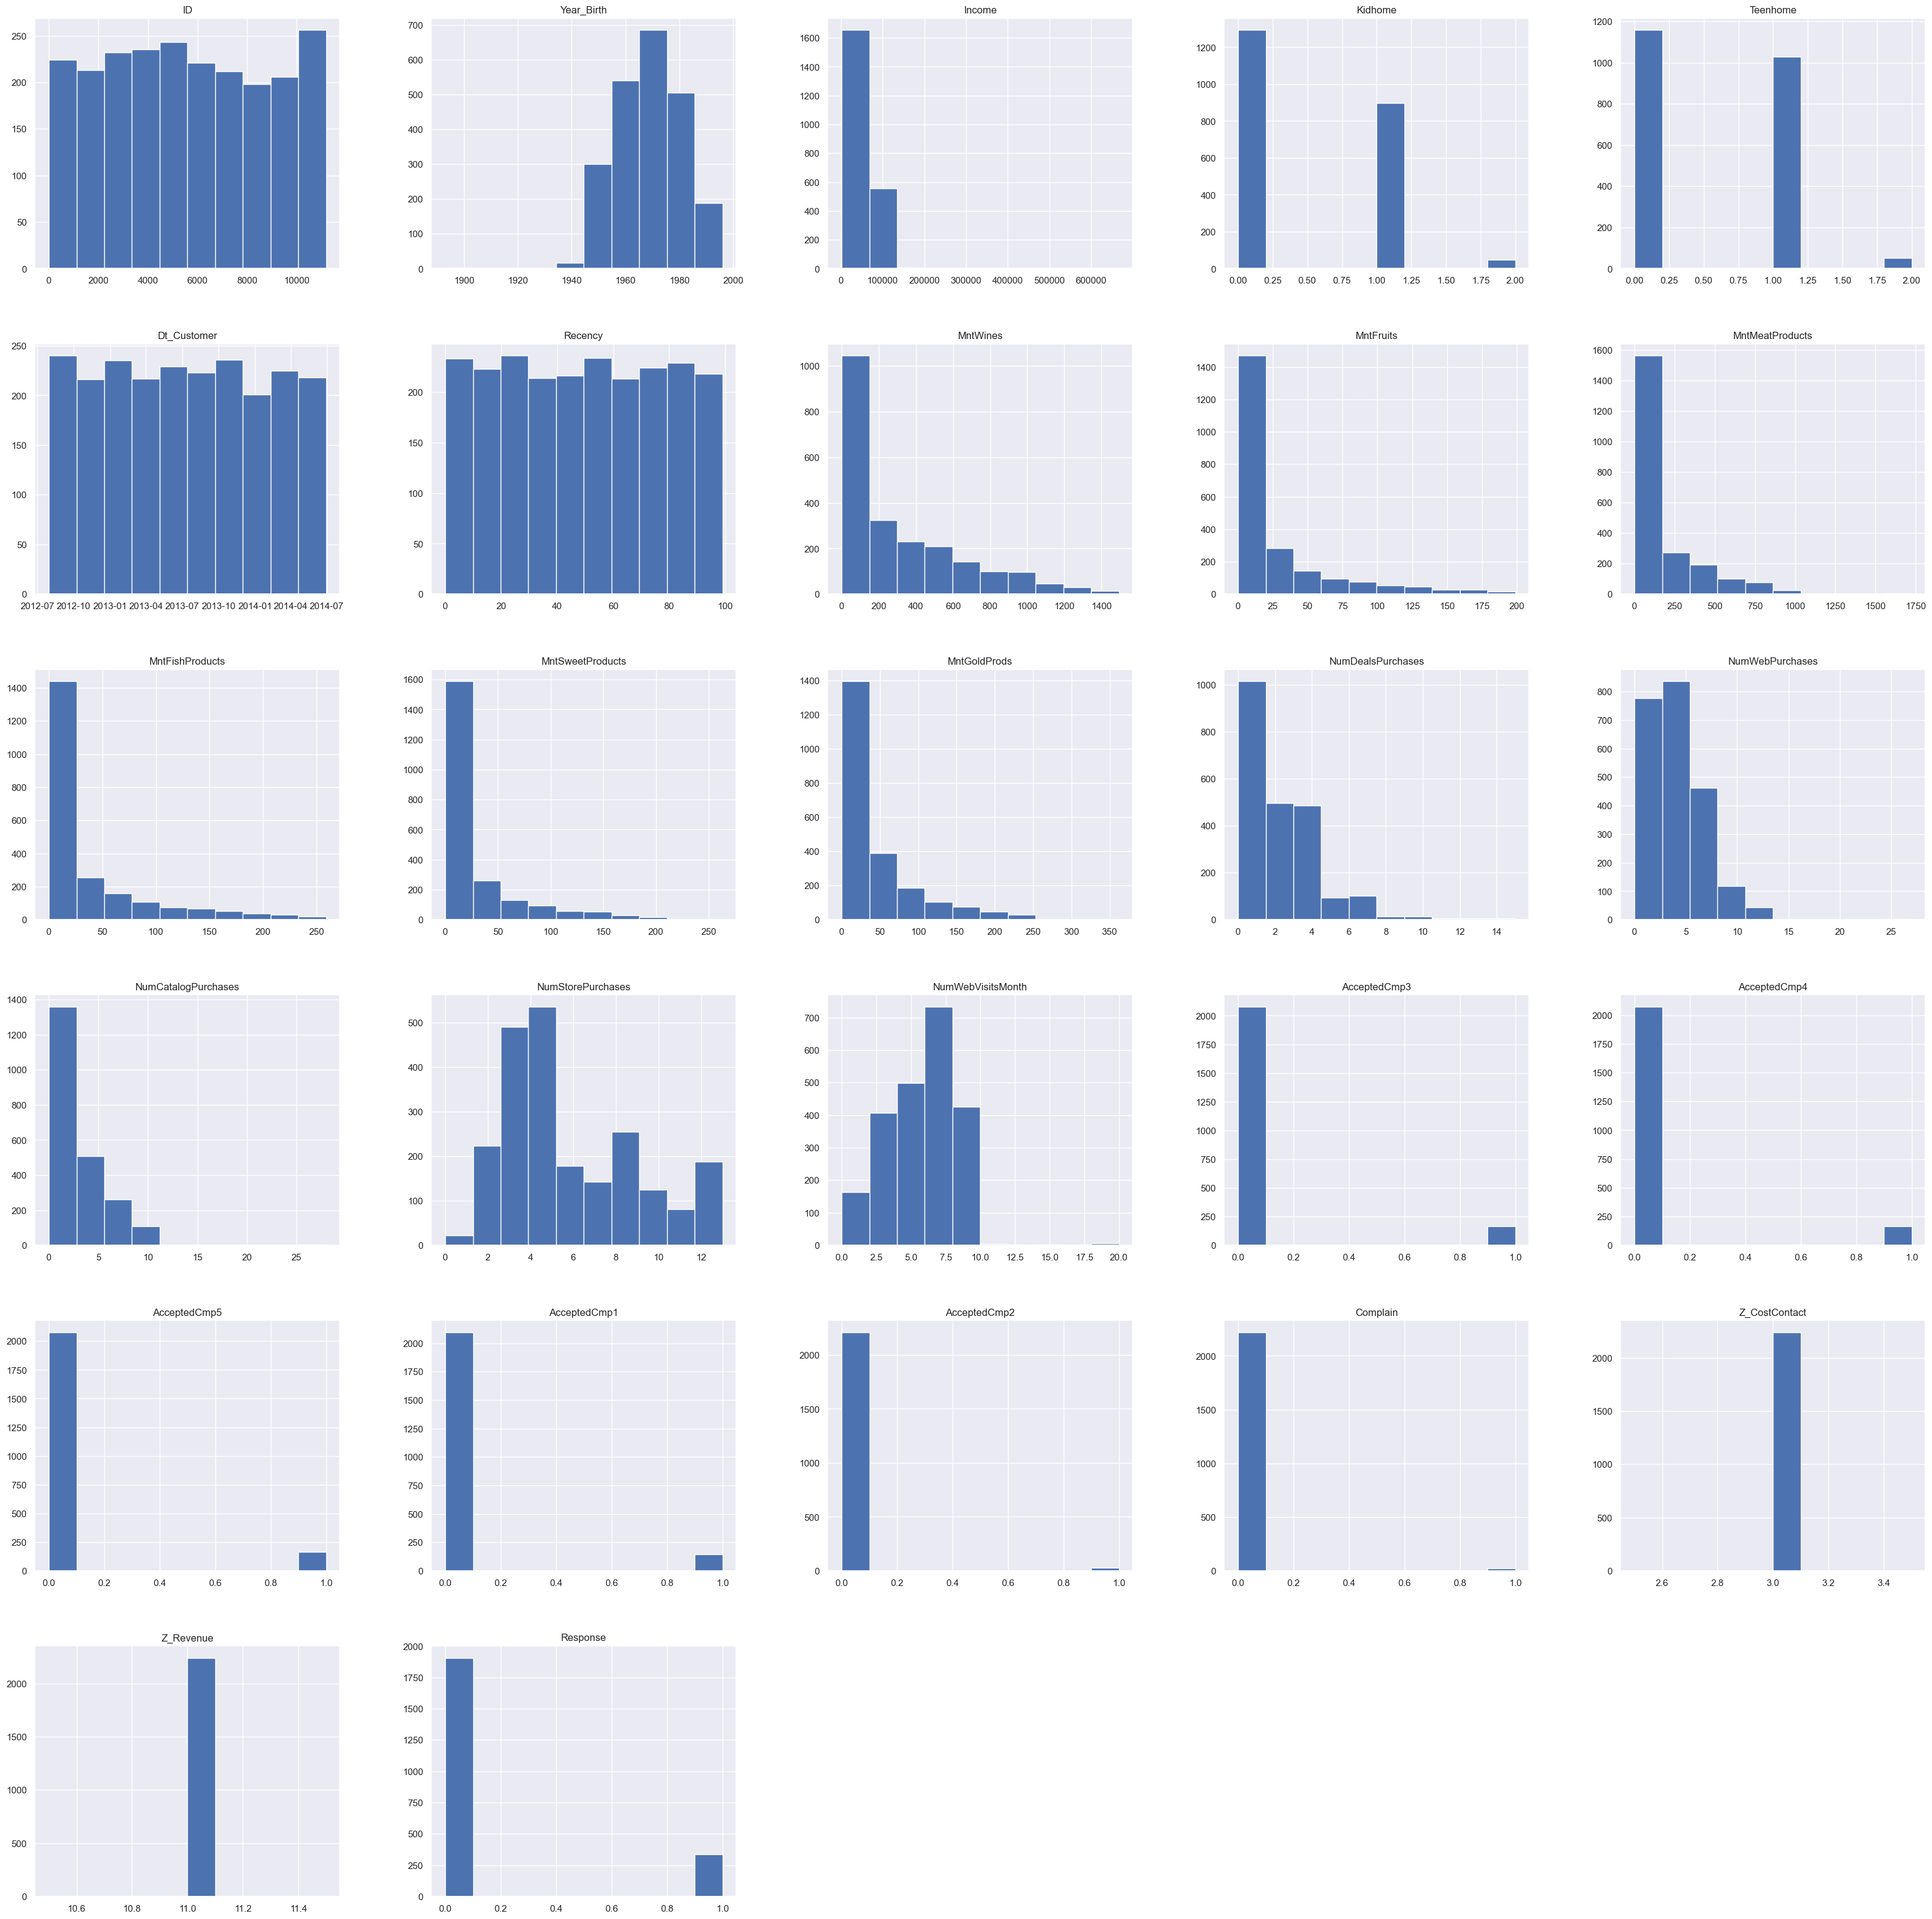

In [2418]:
#Plot histograms of columns
df.hist(figsize=(40,40))
plt.show()

Histogram Data sebelum dilakukan cleaning


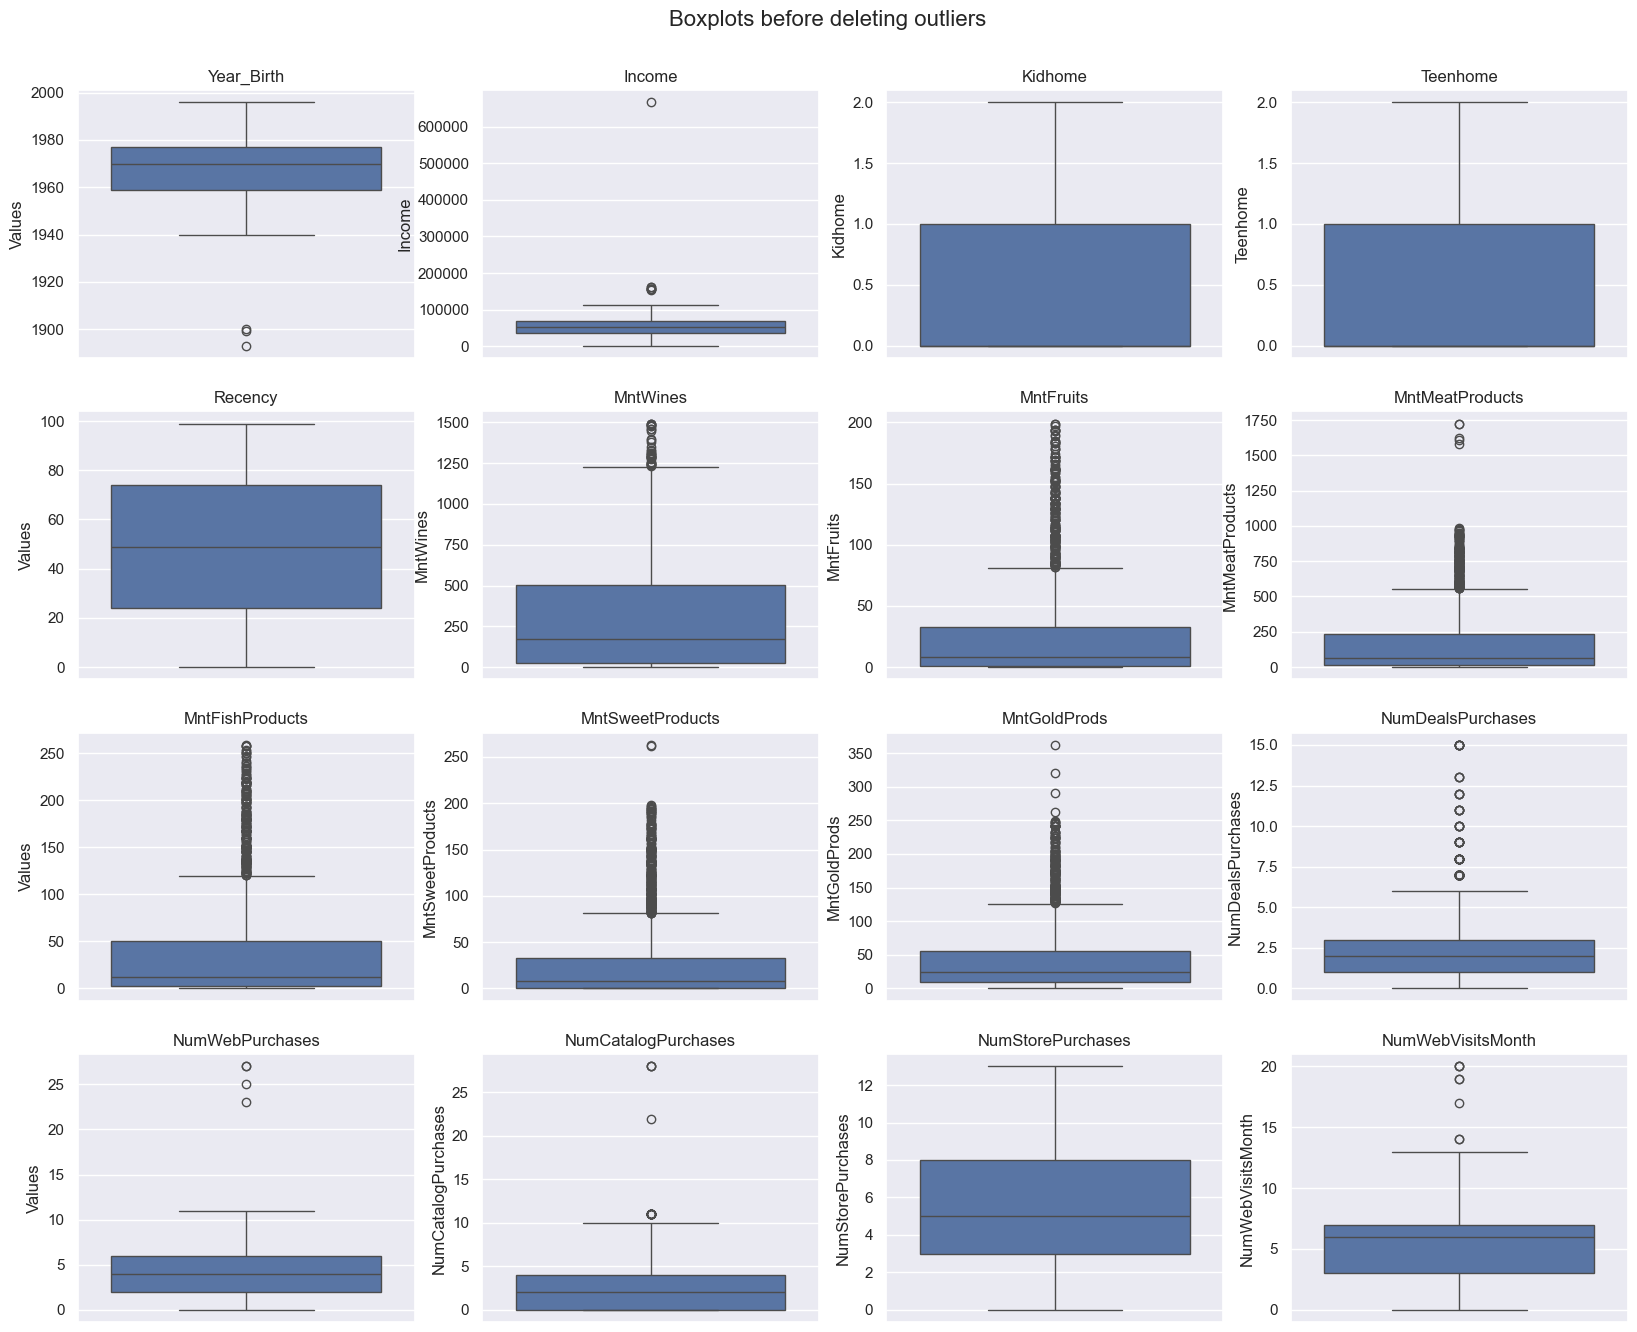

In [2419]:
#list numeric columns of the data set
numeric_columns = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

def boxplots_custom(dataset, columns_list, rows, cols, suptitle,size=(20,16)):
    fig, axs = plt.subplots(rows, cols,  figsize=size)
    fig.suptitle(suptitle,y=0.93, size=16)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        if i % cols == 0:
            axs[i].set_ylabel('Values')
        sns.boxplot( data=dataset[data], orient='v', ax=axs[i])
        axs[i].set_title(data)
        
boxplots_custom(dataset=df, columns_list=numeric_columns, rows=4, cols=4, suptitle='Boxplots before deleting outliers')

Boxplot Data sebelum mmeberikan perlakuan kepada outliers

### B.2.1 Cek Duplikat

In [2420]:
df[df.duplicated()]

Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Z_CostContact, Z_Revenue, Response]
Index: []

In [2421]:
df.duplicated().sum()

0

Pada datset ini tidak terdapat baris yang duplicated

### B.2.2 Menambahkan kolom Age


In [2422]:
df.insert(2, column='Age', value=2014-df['Year_Birth'])


In [2423]:
df.head()

ID  Year_Birth  Age   Education Marital_Status   Income  Kidhome  \
0  5524        1957   57  Graduation         Single  58138.0        0   
1  2174        1954   60  Graduation         Single  46344.0        1   
2  4141        1965   49  Graduation       Together  71613.0        0   
3  6182        1984   30  Graduation       Together  26646.0        1   
4  5324        1981   33         PhD        Married  58293.0        1   

   Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0         0  2012-09-04       58       635         88              546   
1         1  2014-03-08       38        11          1                6   
2         0  2013-08-21       26       426         49              127   
3         0  2014-02-10       26        11          4               20   
4         0  2014-01-19       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0              172                88            88                  3   
1                2                 1             6                  2   
2              111                21            42                  1   
3               10                 3             5                  2   
4               46                27            15                  5   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0                8                   10                  4                  7   
1                1                    1                  2                  5   
2                8                    2                 10                  4   
3                2                    0                  4                  6   
4                5                    3                  6                  5   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   Complain  Z_CostContact  Z_Revenue  Response  
0         0              3         11         1  
1         0              3         11         0  
2         0              3         11         0  
3         0              3         11         0  
4         0              3         11         0

### B.2.3 Menambahkan kolom Age_Category


Membuat grouping "Age_categories" berdasarkan Statistic Canada group umur terbagi menjadi 4, seperti detail di bawah ini,
Link referensi [click here](https://www.banjarsari-labuhanhaji.desa.id/artikel/2022/6/10/kelompok-umur-balita-kanak-kanak-remaja-dewasa-dan-lanjut-usia).


1. Infant = 0-1 year

	
2. Toddler = 2-4 yrs

	
3. Child = 5-12 yrs

	
4. Teen = 13-19 yrs

	
5. Adult = 20-39 yrs

	
6. Middle Age Adult = 40-59 yrs

	
7. Senior Adult = 60+

In [2424]:
# Create Grouping for Age Category based of Quantile and create the column

def age_category(x):
    if x <= 1:
        return 'Infant'
    elif x <= 4:
        return 'Toddler'
    elif x <= 12 :
        return 'Child'
    elif x <= 19 :
        return 'Teen'
    elif x <= 39 :
        return 'Adult'
    elif x <= 59 :
        return 'Middle Age Adult'
    else:
        return 'Senior Adult'
    
df.insert(3, column='Age_category', value=df['Age'].apply(age_category))

df.head ()

ID  Year_Birth  Age      Age_category   Education Marital_Status  \
0  5524        1957   57  Middle Age Adult  Graduation         Single   
1  2174        1954   60      Senior Adult  Graduation         Single   
2  4141        1965   49  Middle Age Adult  Graduation       Together   
3  6182        1984   30             Adult  Graduation       Together   
4  5324        1981   33             Adult         PhD        Married   

    Income  Kidhome  Teenhome Dt_Customer  Recency  MntWines  MntFruits  \
0  58138.0        0         0  2012-09-04       58       635         88   
1  46344.0        1         1  2014-03-08       38        11          1   
2  71613.0        0         0  2013-08-21       26       426         49   
3  26646.0        1         0  2014-02-10       26        11          4   
4  58293.0        1         0  2014-01-19       94       173         43   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0              546              172                88            88   
1                6                2                 1             6   
2              127              111                21            42   
3               20               10                 3             5   
4              118               46                27            15   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                  3                8                   10                  4   
1                  2                1                    1                  2   
2                  1                8                    2                 10   
3                  2                2                    0                  4   
4                  5                5                    3                  6   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  7             0             0             0             0   
1                  5             0             0             0             0   
2                  4             0             0             0             0   
3                  6             0             0             0             0   
4                  5             0             0             0             0   

   AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  
0             0         0              3         11         1  
1             0         0              3         11         0  
2             0         0              3         11         0  
3             0         0              3         11         0  
4             0         0              3         11         0

In [2425]:

(df['Age_category'].value_counts(normalize=True)*100).round(2)

Age_category
Middle Age Adult    51.03
Adult               34.42
Senior Adult        14.24
Teen                 0.31
Name: proportion, dtype: float64

In [2426]:
# Groupby berdasarkan Age_category dan Education, lalu hitung statistik Income
grouped = df.groupby(['Age_category', 'Education'])['Income'].agg(['median']).reset_index()
grouped

Age_category   Education   median
0              Adult    2n Cycle  36145.0
1              Adult       Basic  20425.0
2              Adult  Graduation  43776.0
3              Adult      Master  42670.0
4              Adult         PhD  54880.0
5   Middle Age Adult    2n Cycle  53230.0
6   Middle Age Adult       Basic  22390.0
7   Middle Age Adult  Graduation  54198.0
8   Middle Age Adult      Master  51390.0
9   Middle Age Adult         PhD  53804.5
10      Senior Adult    2n Cycle  63564.0
11      Senior Adult       Basic  26997.0
12      Senior Adult  Graduation  59462.0
13      Senior Adult      Master  59385.0
14      Senior Adult         PhD  60605.0
15              Teen    2n Cycle  80617.0
16              Teen       Basic  14421.0
17              Teen  Graduation  34824.0

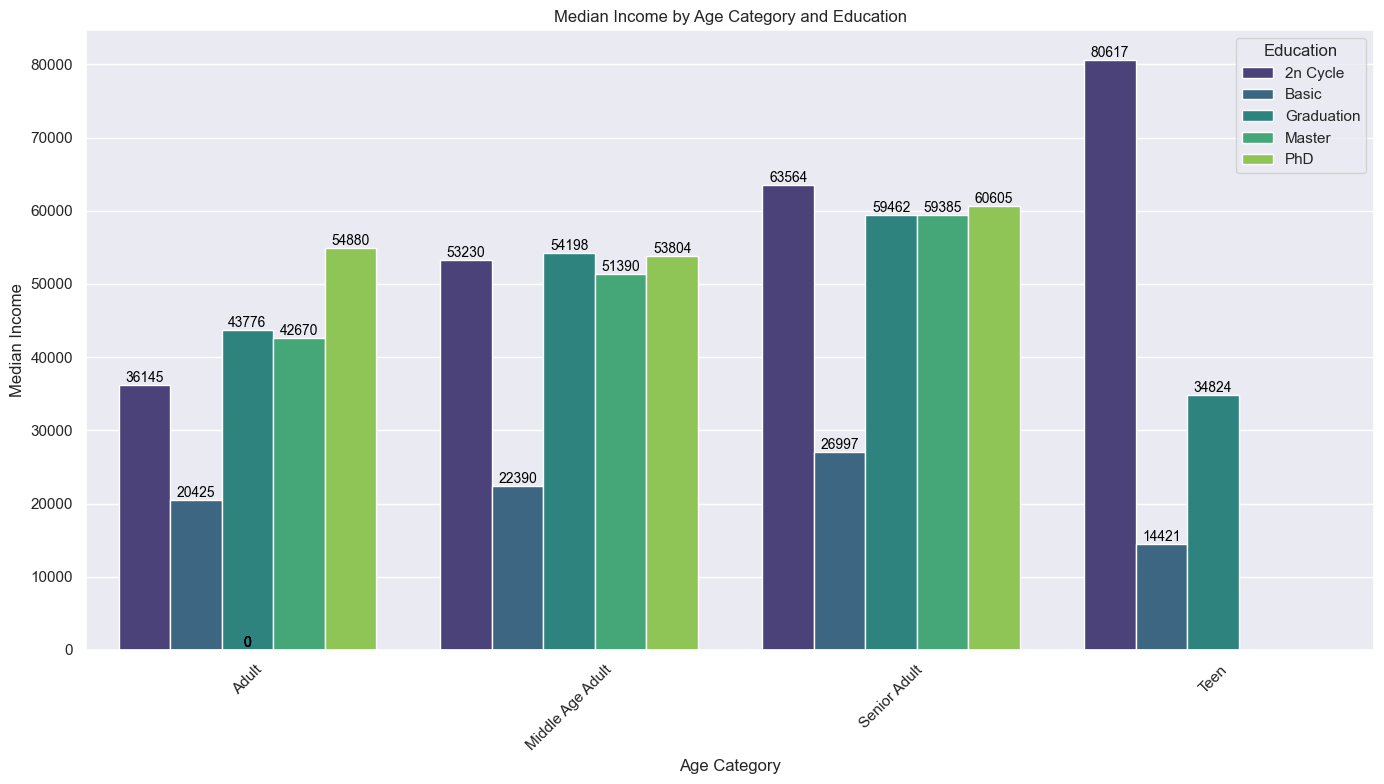

In [2427]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'grouped' DataFrame is already available with columns 'Age_category', 'median', and 'Education'

# Create the barplot
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=grouped, x='Age_category', y='median', hue='Education', palette='viridis')
plt.title('Median Income by Age Category and Education')
plt.xlabel('Age Category')
plt.ylabel('Median Income')
plt.xticks(rotation=45)
plt.legend(title='Education')

# Add annotations on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()


In [2428]:
df.groupby(['Education', 'Age_category'])['Income'].median()

Education   Age_category    
2n Cycle    Adult               36145.0
            Middle Age Adult    53230.0
            Senior Adult        63564.0
            Teen                80617.0
Basic       Adult               20425.0
            Middle Age Adult    22390.0
            Senior Adult        26997.0
            Teen                14421.0
Graduation  Adult               43776.0
            Middle Age Adult    54198.0
            Senior Adult        59462.0
            Teen                34824.0
Master      Adult               42670.0
            Middle Age Adult    51390.0
            Senior Adult        59385.0
PhD         Adult               54880.0
            Middle Age Adult    53804.5
            Senior Adult        60605.0
Name: Income, dtype: float64

In [2429]:
df[df['Income'].isnull()]

ID  Year_Birth  Age      Age_category   Education Marital_Status  \
10     1994        1983   31             Adult  Graduation        Married   
27     5255        1986   28             Adult  Graduation         Single   
43     7281        1959   55  Middle Age Adult         PhD         Single   
48     7244        1951   63      Senior Adult  Graduation         Single   
58     8557        1982   32             Adult  Graduation         Single   
71    10629        1973   41  Middle Age Adult    2n Cycle        Married   
90     8996        1957   57  Middle Age Adult         PhD        Married   
91     9235        1957   57  Middle Age Adult  Graduation         Single   
92     5798        1973   41  Middle Age Adult      Master       Together   
128    8268        1961   53  Middle Age Adult         PhD        Married   
133    1295        1963   51  Middle Age Adult  Graduation        Married   
312    2437        1989   25             Adult  Graduation        Married   
319    2863        1970   44  Middle Age Adult  Graduation         Single   
1379  10475        1970   44  Middle Age Adult      Master       Together   
1382   2902        1958   56  Middle Age Adult  Graduation       Together   
1383   4345        1964   50  Middle Age Adult    2n Cycle         Single   
1386   3769        1972   42  Middle Age Adult         PhD       Together   
2059   7187        1969   45  Middle Age Adult      Master       Together   
2061   1612        1981   33             Adult         PhD         Single   
2078   5079        1971   43  Middle Age Adult  Graduation        Married   
2079  10339        1954   60      Senior Adult      Master       Together   
2081   3117        1955   59  Middle Age Adult  Graduation         Single   
2084   5250        1943   71      Senior Adult      Master          Widow   
2228   8720        1978   36             Adult    2n Cycle       Together   

      Income  Kidhome  Teenhome Dt_Customer  Recency  MntWines  MntFruits  \
10       NaN        1         0  2013-11-15       11         5          5   
27       NaN        1         0  2013-02-20       19         5          1   
43       NaN        0         0  2013-11-05       80        81         11   
48       NaN        2         1  2014-01-01       96        48          5   
58       NaN        1         0  2013-06-17       57        11          3   
71       NaN        1         0  2012-09-14       25        25          3   
90       NaN        2         1  2012-11-19        4       230         42   
91       NaN        1         1  2014-05-27       45         7          0   
92       NaN        0         0  2013-11-23       87       445         37   
128      NaN        0         1  2013-07-11       23       352          0   
133      NaN        0         1  2013-08-11       96       231         65   
312      NaN        0         0  2013-06-03       69       861        138   
319      NaN        1         2  2013-08-23       67       738         20   
1379     NaN        0         1  2013-04-01       39       187          5   
1382     NaN        1         1  2012-09-03       87        19          4   
1383     NaN        1         1  2014-01-12       49         5          1   
1386     NaN        1         0  2014-03-02       17        25          1   
2059     NaN        1         1  2013-05-18       52       375         42   
2061     NaN        1         0  2013-05-31       82        23          0   
2078     NaN        1         1  2013-03-03       82        71          1   
2079     NaN        0         1  2013-06-23       83       161          0   
2081     NaN        0         1  2013-10-18       95       264          0   
2084     NaN        0         0  2013-10-30       75       532        126   
2228     NaN        0         0  2012-08-12       53        32          2   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
10                  6                0                 2             1   
27       

### B.2.4 Cek Outliers

In [2430]:
# Performs checks for each columns summaries

display(df.describe(), df.describe(include='object'))

ID   Year_Birth          Age         Income      Kidhome  \
count   2240.000000  2240.000000  2240.000000    2216.000000  2240.000000   
mean    5592.159821  1968.805804    45.194196   52247.251354     0.444196   
min        0.000000  1893.000000    18.000000    1730.000000     0.000000   
25%     2828.250000  1959.000000    37.000000   35303.000000     0.000000   
50%     5458.500000  1970.000000    44.000000   51381.500000     0.000000   
75%     8427.750000  1977.000000    55.000000   68522.000000     1.000000   
max    11191.000000  1996.000000   121.000000  666666.000000     2.000000   
std     3246.662198    11.984069    11.984069   25173.076661     0.538398   

          Teenhome                    Dt_Customer      Recency     MntWines  \
count  2240.000000                           2240  2240.000000  2240.000000   
mean      0.506250  2013-07-10 10:01:42.857142784    49.109375   303.935714   
min       0.000000            2012-07-30 00:00:00     0.000000     0.000000   
25%       0.000000            2013-01-16 00:00:00    24.000000    23.750000   
50%       0.000000            2013-07-08 12:00:00    49.000000   173.500000   
75%       1.000000            2013-12-30 06:00:00    74.000000   504.250000   
max       2.000000            2014-06-29 00:00:00    99.000000  1493.000000   
std       0.544538                            NaN    28.962453   336.597393   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  2240.000000      2240.000000      2240.000000       2240.000000   
mean     26.302232       166.950000        37.525446         27.062946   
min       0.000000         0.000000         0.000000          0.000000   
25%       1.000000        16.000000         3.000000          1.000000   
50%       8.000000        67.000000        12.000000          8.000000   
75%      33.000000       232.000000        50.000000         33.000000   
max     199.000000      1725.000000       259.000000        263.000000   
std      39.773434       225.715373        54.628979         41.280498   

       MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
count   2240.000000        2240.000000      2240.000000          2240.000000   
mean      44.021875           2.325000         4.084821             2.662054   
min        0.000000           0.000000         0.000000             0.000000   
25%        9.000000           1.000000         2.000000             0.000000   
50%       24.000000           2.000000         4.000000             2.000000   
75%       56.000000           3.000000         6.000000             4.000000   
max      362.000000          15.000000        27.000000            28.000000   
std       52.167439           1.932238         2.778714             2.923101   

       NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count        2240.000000        2240.000000   2240.000000   2240.000000   
mean            5.790179           5.316518      0.072768      0.074554   
min             0.000000           0.000000      0.000000      0.000000   
25%             3.000000           3.000000      0.000000      0.000000   
50%             5.000000           6.000000      0.000000      0.000000   
75%             8.000000           7.000000      0.000000      0.000000   
max            13.000000          20.000000      1.000000      1.000000   
std             3.250958           2.426645      0.259813      0.262728   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3

Age_category   Education Marital_Status
count               2240        2240           2240
unique                 4           5              8
top     Middle Age Adult  Graduation        Married
freq                1143        1127            864

#### B.2.4.1 Outliers Pada Age

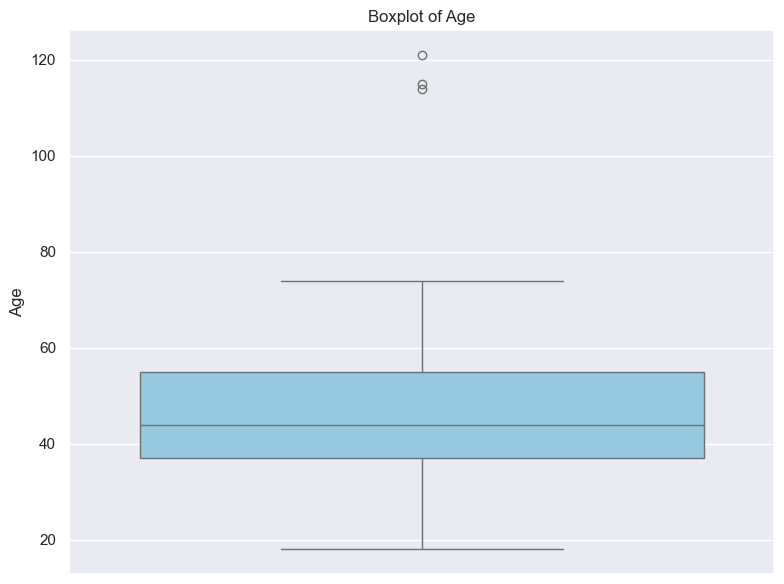

In [2431]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Age'], color='skyblue')
plt.title('Boxplot of Age')
plt.ylabel('Age')
plt.xticks([])
plt.tight_layout()
plt.show()

In [2432]:
df[df['Age']>=100]

ID  Year_Birth  Age  Age_category Education Marital_Status   Income  \
192   7829        1900  114  Senior Adult  2n Cycle       Divorced  36640.0   
239  11004        1893  121  Senior Adult  2n Cycle         Single  60182.0   
339   1150        1899  115  Senior Adult       PhD       Together  83532.0   

     Kidhome  Teenhome Dt_Customer  Recency  MntWines  MntFruits  \
192        1         0  2013-09-26       99        15          6   
239        0         1  2014-05-17       23         8          0   
339        0         0  2013-09-26       36       755        144   

     MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
192                8                7                 4            25   
239                5                7                 0             2   
339              562              104                64           224   

     NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
192                  1                2                    1   
239                  1                1                    0   
339                  1                4                    6   

     NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
192                  2                  5             0             0   
239                  2                  4             0             0   
339                  4                  1             0             0   

     AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
192             0             0             0         1              3   
239             0             0             0         0              3   
339             1             0             0         0              3   

     Z_Revenue  Response  
192         11         0  
239         11         0  
339         11         0

In [2433]:
print("Jumlah data sebelum handling outliers (Age):", df.shape[0])

df = df[~(df["Age"] >= 100)]
print("Jumlah data setelah handling outliers (Age) : {}".format(df.shape[0]))

Jumlah data sebelum handling outliers (Age): 2240
Jumlah data setelah handling outliers (Age) : 2237


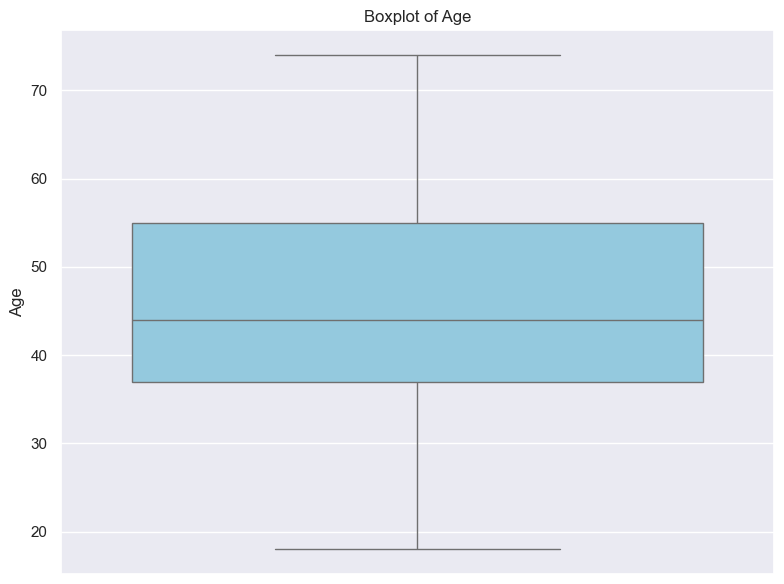

In [2434]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Age'], color='skyblue')
plt.title('Boxplot of Age')
plt.ylabel('Age')
plt.xticks([])
plt.tight_layout()
plt.show()

#### B.2.4.2 Outliers Pada Income

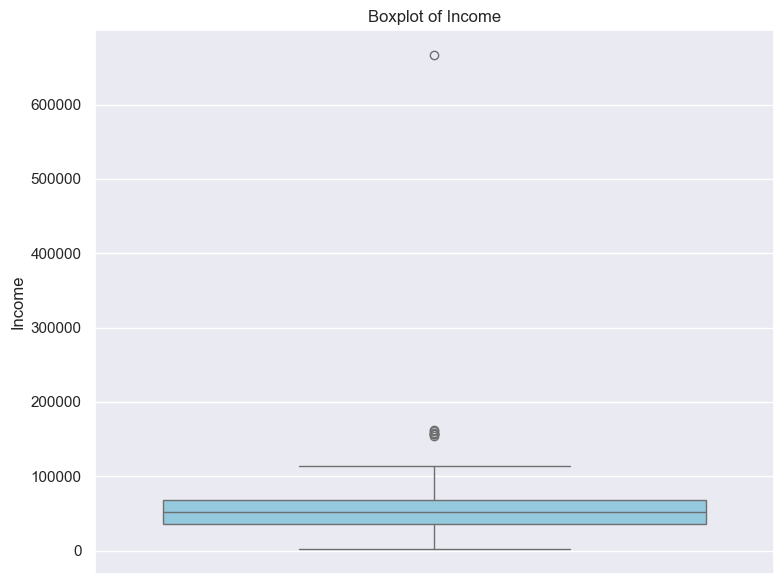

In [2435]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Income'], color='skyblue')
plt.title('Boxplot of Income')
plt.ylabel('Income')
plt.xticks([])
plt.tight_layout()
plt.show()

In [2436]:
df[df['Income'] >= 200000]

ID  Year_Birth  Age Age_category   Education Marital_Status    Income  \
2233  9432        1977   37        Adult  Graduation       Together  666666.0   

      Kidhome  Teenhome Dt_Customer  Recency  MntWines  MntFruits  \
2233        1         0  2013-06-02       23         9         14   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
2233               18                8                 1            12   

      NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
2233                  4                3                    1   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
2233                  3                  6             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
2233             0             0             0         0              3   

      Z_Revenue  Response  
2233         11         0

In [2437]:
print("Jumlah data sebelum handling outliers (Income):", df.shape[0])

df = df[~(df["Income"] >= 153924)]
print("Jumlah data setelah handling outliers (Income) : {}".format(df.shape[0]))

Jumlah data sebelum handling outliers (Income): 2237
Jumlah data setelah handling outliers (Income) : 2229


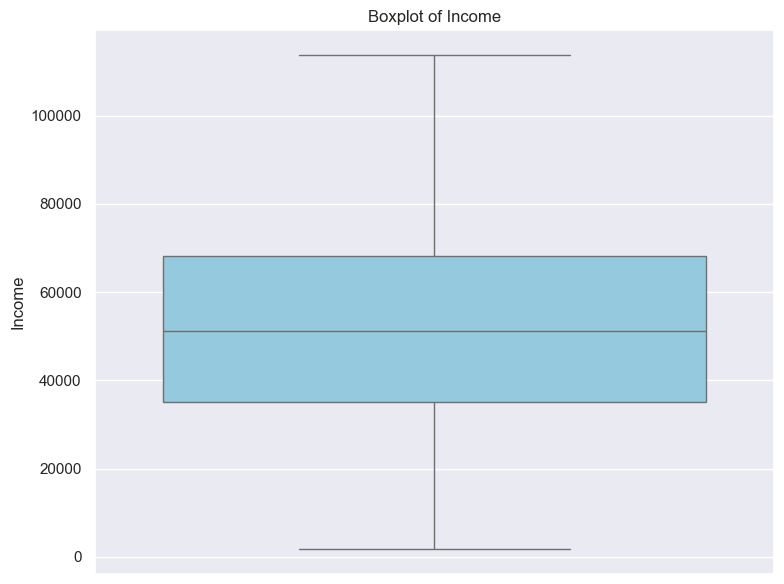

In [2438]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Income'], color='skyblue')
plt.title('Boxplot of Income')
plt.ylabel('Income')
plt.xticks([])
plt.tight_layout()
plt.show()

In [2439]:
# Performs checks for each columns summaries

display(df.describe(), df.describe(include='object'))

ID   Year_Birth          Age         Income      Kidhome  \
count   2229.000000  2229.000000  2229.000000    2205.000000  2229.000000   
mean    5589.296097  1968.888739    45.111261   51622.094785     0.444594   
min        0.000000  1940.000000    18.000000    1730.000000     0.000000   
25%     2829.000000  1959.000000    37.000000   35196.000000     0.000000   
50%     5455.000000  1970.000000    44.000000   51287.000000     0.000000   
75%     8420.000000  1977.000000    55.000000   68281.000000     1.000000   
max    11191.000000  1996.000000    74.000000  113734.000000     2.000000   
std     3244.840538    11.707430    11.707430   20713.063826     0.538636   

          Teenhome                    Dt_Customer      Recency     MntWines  \
count  2229.000000                           2229  2229.000000  2229.000000   
mean      0.507402  2013-07-10 05:20:25.841184512    49.106326   304.991476   
min       0.000000            2012-07-30 00:00:00     0.000000     0.000000   
25%       0.000000            2013-01-16 00:00:00    24.000000    24.000000   
50%       0.000000            2013-07-08 00:00:00    49.000000   176.000000   
75%       1.000000            2013-12-30 00:00:00    74.000000   505.000000   
max       2.000000            2014-06-29 00:00:00    99.000000  1493.000000   
std       0.544735                            NaN    28.946476   336.761943   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  2229.000000      2229.000000      2229.000000       2229.000000   
mean     26.348587       165.283984        37.642441         27.161507   
min       0.000000         0.000000         0.000000          0.000000   
25%       2.000000        16.000000         3.000000          1.000000   
50%       8.000000        67.000000        12.000000          8.000000   
75%      33.000000       231.000000        50.000000         34.000000   
max     199.000000      1725.000000       259.000000        263.000000   
std      39.764060       219.336589        54.700548         41.338945   

       MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
count   2229.000000        2229.000000      2229.000000          2229.000000   
mean      44.113055           2.319874         4.100045             2.636608   
min        0.000000           0.000000         0.000000             0.000000   
25%        9.000000           1.000000         2.000000             0.000000   
50%       24.000000           2.000000         4.000000             2.000000   
75%       56.000000           3.000000         6.000000             4.000000   
max      362.000000          15.000000        27.000000            28.000000   
std       52.091255           1.895252         2.775461             2.796161   

       NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count        2229.000000        2229.000000   2229.000000   2229.000000   
mean            5.812472           5.334231      0.073127      0.074921   
min             0.000000           0.000000      0.000000      0.000000   
25%             3.000000           3.000000      0.000000      0.000000   
50%             5.000000           6.000000      0.000000      0.000000   
75%             8.000000           7.000000      0.000000      0.000000   
max            13.000000          20.000000      1.000000      1.000000   
std             3.242144           2.414981      0.260403      0.263324   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2229.000000   2229.000000   2229.000000  2229.000000         2229.0   
mean       0.072678      0.064603      0.013459     0.008973            3.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3

Age_category   Education Marital_Status
count               2229        2229           2229
unique                 4           5              8
top     Middle Age Adult  Graduation        Married
freq                1141        1124            861

### B.2.5 Missing Value

In [2440]:
# Jumlah data missing value pada setiap kolom
print('Missing values status:', df.isnull().values.any())
nvc = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values']/df.shape[0])*100
nvc["Data Type"] = [df[col].dtype for col in df.columns]
nvc.sort_values(by=["Total Null Values", "Percentage"], ascending=False, inplace=True)
print(nvc)

Missing values status: True
                     Total Null Values  Percentage       Data Type
Income                              24    1.076716           int64
ID                                   0    0.000000           int64
Z_CostContact                        0    0.000000           int64
Complain                             0    0.000000           int64
AcceptedCmp2                         0    0.000000          object
AcceptedCmp1                         0    0.000000          object
AcceptedCmp5                         0    0.000000          object
AcceptedCmp4                         0    0.000000         float64
AcceptedCmp3                         0    0.000000           int64
NumWebVisitsMonth                    0    0.000000           int64
NumStorePurchases                    0    0.000000  datetime64[ns]
NumCatalogPurchases                  0    0.000000           int64
NumWebPurchases                      0    0.000000           int64
NumDealsPurchases                 

In [2441]:
print(f'Jumlah seluruh baris yang memiliki missing data adalah {len(df[df.isna().any(axis=1)])} baris')
print(f'Persentase baris missing data adalah  {len(df[df.isna().any(axis=1)])/len(df)*100} persen')

Jumlah seluruh baris yang memiliki missing data adalah 24 baris
Persentase baris missing data adalah  1.0767160161507403 persen


In [2442]:
len(df[df['Income'].isna()])

24

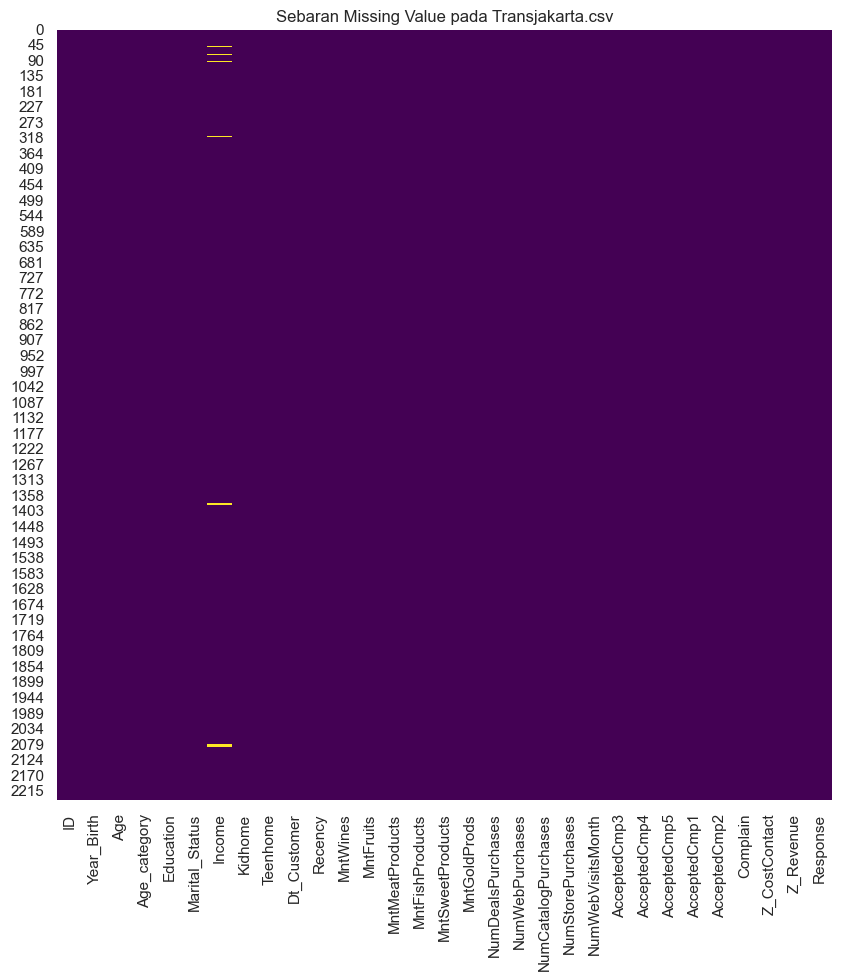

In [2443]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.isna(), cbar=False, cmap='viridis')
plt.title('Sebaran Missing Value pada Transjakarta.csv');
plt.show()

Karena jumlah data yang dimiliki tidak terlalu banyak, sehingga untuk Missing Value pada dataset ini akan dilakukan `Imputation`, sehingga tidak ada data yang akan di drop

In [2444]:
# Mengambil kolom 'Income' untuk uji normalitas
income_data = df['Income'].dropna()

# Melakukan uji normalitas menggunakan D'Agostino-Pearson test
stat, p_value = normaltest(income_data)

# Menentukan distribusi berdasarkan p-value
if p_value > 0.05:
    distribution = "Normally Distributed"
else:
    distribution = "Not Normally Distributed"

# Membuat DataFrame untuk menampilkan hasil
dist_df = pd.DataFrame({
    "Income": ["Income"],
    "Distributed": [distribution]
})

dist_df

Income               Distributed
0  Income  Not Normally Distributed

Karena kolom Income tidak terdistribusi normal, maka akan diisi menggunakan median Income

In [2445]:
df['Income']=df['Income'].fillna(df.groupby(['Education', 'Age_category'])['Income'].transform('median'))

In [2446]:
df[df['Income'].isna()]

Empty DataFrame
Columns: [ID, Year_Birth, Age, Age_category, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Z_CostContact, Z_Revenue, Response]
Index: []

### B.2.6 Handling ID Yang Nilainya 0

In [2447]:
df.describe()

ID   Year_Birth          Age         Income      Kidhome  \
count   2229.000000  2229.000000  2229.000000    2229.000000  2229.000000   
mean    5589.296097  1968.888739    45.111261   51622.504711     0.444594   
min        0.000000  1940.000000    18.000000    1730.000000     0.000000   
25%     2829.000000  1959.000000    37.000000   35416.000000     0.000000   
50%     5455.000000  1970.000000    44.000000   51373.000000     0.000000   
75%     8420.000000  1977.000000    55.000000   68118.000000     1.000000   
max    11191.000000  1996.000000    74.000000  113734.000000     2.000000   
std     3244.840538    11.707430    11.707430   20609.458570     0.538636   

          Teenhome                    Dt_Customer      Recency     MntWines  \
count  2229.000000                           2229  2229.000000  2229.000000   
mean      0.507402  2013-07-10 05:20:25.841184512    49.106326   304.991476   
min       0.000000            2012-07-30 00:00:00     0.000000     0.000000   
25%       0.000000            2013-01-16 00:00:00    24.000000    24.000000   
50%       0.000000            2013-07-08 00:00:00    49.000000   176.000000   
75%       1.000000            2013-12-30 00:00:00    74.000000   505.000000   
max       2.000000            2014-06-29 00:00:00    99.000000  1493.000000   
std       0.544735                            NaN    28.946476   336.761943   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  2229.000000      2229.000000      2229.000000       2229.000000   
mean     26.348587       165.283984        37.642441         27.161507   
min       0.000000         0.000000         0.000000          0.000000   
25%       2.000000        16.000000         3.000000          1.000000   
50%       8.000000        67.000000        12.000000          8.000000   
75%      33.000000       231.000000        50.000000         34.000000   
max     199.000000      1725.000000       259.000000        263.000000   
std      39.764060       219.336589        54.700548         41.338945   

       MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
count   2229.000000        2229.000000      2229.000000          2229.000000   
mean      44.113055           2.319874         4.100045             2.636608   
min        0.000000           0.000000         0.000000             0.000000   
25%        9.000000           1.000000         2.000000             0.000000   
50%       24.000000           2.000000         4.000000             2.000000   
75%       56.000000           3.000000         6.000000             4.000000   
max      362.000000          15.000000        27.000000            28.000000   
std       52.091255           1.895252         2.775461             2.796161   

       NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count        2229.000000        2229.000000   2229.000000   2229.000000   
mean            5.812472           5.334231      0.073127      0.074921   
min             0.000000           0.000000      0.000000      0.000000   
25%             3.000000           3.000000      0.000000      0.000000   
50%             5.000000           6.000000      0.000000      0.000000   
75%             8.000000           7.000000      0.000000      0.000000   
max            13.000000          20.000000      1.000000      1.000000   
std             3.242144           2.414981      0.260403      0.263324   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2229.000000   2229.000000   2229.000000  2229.000000         2229.0   
mean       0.072678      0.064603      0.013459     0.008973            3.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3

In [2448]:
df[df['ID']==0]

ID  Year_Birth  Age Age_category   Education Marital_Status   Income  \
214   0        1985   29        Adult  Graduation        Married  70951.0   

     Kidhome  Teenhome Dt_Customer  Recency  MntWines  MntFruits  \
214        0         0  2013-05-04       66       239         10   

     MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
214              554              254                87            54   

     NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
214                  1                3                    4   

     NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
214                  9                  1             0             0   

     AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
214             0             0             0         0              3   

     Z_Revenue  Response  
214         11         0

In [2449]:
# Check if any data with zero value ID
df.loc[df['ID'] == 0]

# generates random integer number to fill that zero value ID
id = [id for id in df['ID']]
np.random.seed(1)
id_0 = 0
while True:
    randomnumber = np.random.randint(low=1, high=10000)
    if randomnumber not in id:
        id_0 += randomnumber
        break
    else:
        continue

# replacing zero value
df['ID'] = df['ID'].replace(0,id_0)
df.loc[df['ID'] == id_0]

ID  Year_Birth  Age Age_category   Education Marital_Status   Income  \
214  5193        1985   29        Adult  Graduation        Married  70951.0   

     Kidhome  Teenhome Dt_Customer  Recency  MntWines  MntFruits  \
214        0         0  2013-05-04       66       239         10   

     MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
214              554              254                87            54   

     NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
214                  1                3                    4   

     NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
214                  9                  1             0             0   

     AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
214             0             0             0         0              3   

     Z_Revenue  Response  
214         11         0

In [2450]:
df[df['ID']== 0]

Empty DataFrame
Columns: [ID, Year_Birth, Age, Age_category, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Z_CostContact, Z_Revenue, Response]
Index: []

### B.2.7 Melakukan penyederhanaan Marital_Status

Akan dilakukan replace data / menyatukan yang memiliki arti yang sama agar mengurangi jumlah dimensi maupun redudansi pada data

- Mengganti kategori `Widow`, `Alone`, `Absurd`, `YOLO`, `Divorced` menjadi `Single`
- Mengganti kategori `Together`, `Married` menjadi `Couple`


In [2451]:
# Mengganti kategori 'Widow', 'Alone', 'Absurd', 'YOLO' menjadi 'Single'
df['Marital_Status'] = df['Marital_Status'].replace(['Widow', 'Alone', 'Absurd','YOLO'],'Single')
# Mengganti kategori 'Together' menjadi 'Couple'
df['Marital_Status'] = df['Marital_Status'].replace(['Together', 'Married'],'Couple')

In [2452]:
df['Marital_Status'].unique()

array(['Single', 'Couple', 'Divorced'], dtype=object)

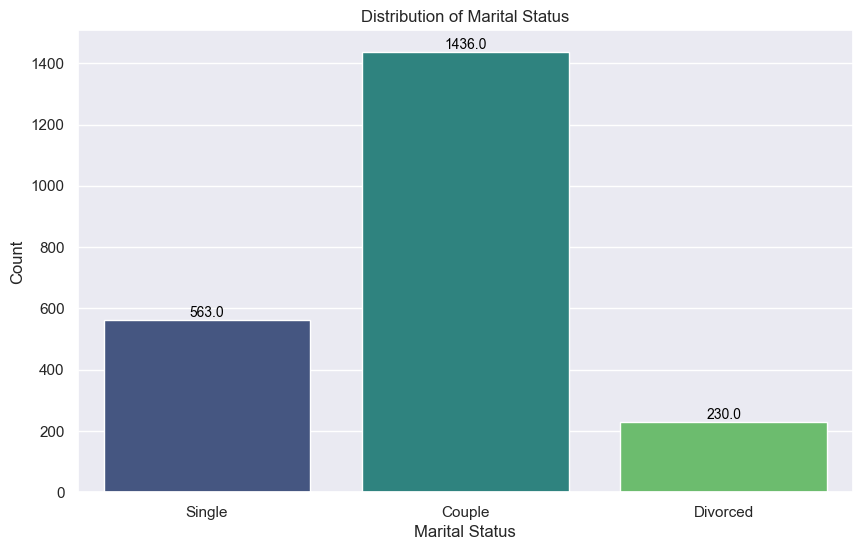

In [2453]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Marital_Status', palette='viridis')
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.grid(True, axis='y')

# Add annotations on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()

### B.2.8 Melakukan penyederhanaan Education_Simple

Untuk kategori `2n Cycle` dan `Master` juga kurang lebih sama. Maka dari itu, baris yang memiliki kategori `2n Cycle` akan dihapus dan digantikan dengan kategori `Master`.

In [2454]:
# Levels : Basic - Graduation - 2n Cycle - Master - PhD
df['Education'] = df['Education'].replace('2n Cycle','Master')

In [2455]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic'], dtype=object)

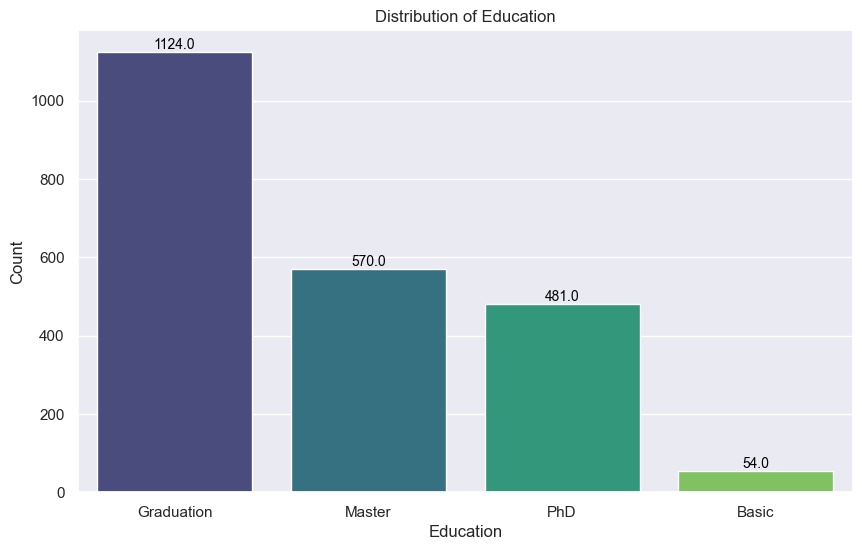

In [2456]:
# Create the countplot
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Education', palette='viridis', order=['Graduation', 'Master', 'PhD', 'Basic'])
plt.title('Distribution of Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.grid(True, axis='y')

# Add annotations on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()


In [2457]:
df

ID  Year_Birth  Age      Age_category   Education Marital_Status  \
0      5524        1957   57  Middle Age Adult  Graduation         Single   
1      2174        1954   60      Senior Adult  Graduation         Single   
2      4141        1965   49  Middle Age Adult  Graduation         Couple   
3      6182        1984   30             Adult  Graduation         Couple   
4      5324        1981   33             Adult         PhD         Couple   
...     ...         ...  ...               ...         ...            ...   
2235  10870        1967   47  Middle Age Adult  Graduation         Couple   
2236   4001        1946   68      Senior Adult         PhD         Couple   
2237   7270        1981   33             Adult  Graduation       Divorced   
2238   8235        1956   58  Middle Age Adult      Master         Couple   
2239   9405        1954   60      Senior Adult         PhD         Couple   

       Income  Kidhome  Teenhome Dt_Customer  Recency  MntWines  MntFruits  \
0     58138.0        0         0  2012-09-04       58       635         88   
1     46344.0        1         1  2014-03-08       38        11          1   
2     71613.0        0         0  2013-08-21       26       426         49   
3     26646.0        1         0  2014-02-10       26        11          4   
4     58293.0        1         0  2014-01-19       94       173         43   
...       ...      ...       ...         ...      ...       ...        ...   
2235  61223.0        0         1  2013-06-13       46       709         43   
2236  64014.0        2         1  2014-06-10       56       406          0   
2237  56981.0        0         0  2014-01-25       91       908         48   
2238  69245.0        0         1  2014-01-24        8       428         30   
2239  52869.0        1         1  2012-10-15       40        84          3   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0                 546              172                88            88   
1                   6                2                 1             6   
2                 127              111                21            42   
3                  20               10                 3             5   
4                 118               46                27            15   
...               ...              ...               ...           ...   
2235              182               42               118           247   
2236               30                0                 0             8   
2237              217               32                12            24   
2238              214               80                30            61   
2239               61                2                 1            21   

      NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0                     3                8                   10   
1                     2                1                    1   
2                     1                8                    2   
3                     2                2                    0   
4                     5                5                    3   
...                 ...              ...                  ...   
2235                  2                9                    3   
2236                  7                8                    2   
2237                  1                2                    3   
2238                  2                6                    5   
2239                  3                3                    1   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                     4                  7             0             0   
1                     2                  5             0             0   
2                    10                  4             0             0   
3                     4                  6             0             0   
4                     6                  5             0             0   
...                 ...          

#### B.2.9 Drop Kolom `Z_CostContact`,`Z_Revenue`, dan `ID`

Dikarenakan kolom `Z_CostContact` dan `Z_Revenue` sulit untuk diidentifikasi, serta isinya hanya satu bilangan yang sulit diartikan, maka kolom tersebut akan di drop

In [2458]:
# drop kolom 
df.drop(columns=['Z_CostContact','Z_Revenue'], inplace=True)

In [2459]:
df

ID  Year_Birth  Age      Age_category   Education Marital_Status  \
0      5524        1957   57  Middle Age Adult  Graduation         Single   
1      2174        1954   60      Senior Adult  Graduation         Single   
2      4141        1965   49  Middle Age Adult  Graduation         Couple   
3      6182        1984   30             Adult  Graduation         Couple   
4      5324        1981   33             Adult         PhD         Couple   
...     ...         ...  ...               ...         ...            ...   
2235  10870        1967   47  Middle Age Adult  Graduation         Couple   
2236   4001        1946   68      Senior Adult         PhD         Couple   
2237   7270        1981   33             Adult  Graduation       Divorced   
2238   8235        1956   58  Middle Age Adult      Master         Couple   
2239   9405        1954   60      Senior Adult         PhD         Couple   

       Income  Kidhome  Teenhome Dt_Customer  Recency  MntWines  MntFruits  \
0     58138.0        0         0  2012-09-04       58       635         88   
1     46344.0        1         1  2014-03-08       38        11          1   
2     71613.0        0         0  2013-08-21       26       426         49   
3     26646.0        1         0  2014-02-10       26        11          4   
4     58293.0        1         0  2014-01-19       94       173         43   
...       ...      ...       ...         ...      ...       ...        ...   
2235  61223.0        0         1  2013-06-13       46       709         43   
2236  64014.0        2         1  2014-06-10       56       406          0   
2237  56981.0        0         0  2014-01-25       91       908         48   
2238  69245.0        0         1  2014-01-24        8       428         30   
2239  52869.0        1         1  2012-10-15       40        84          3   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0                 546              172                88            88   
1                   6                2                 1             6   
2                 127              111                21            42   
3                  20               10                 3             5   
4                 118               46                27            15   
...               ...              ...               ...           ...   
2235              182               42               118           247   
2236               30                0                 0             8   
2237              217               32                12            24   
2238              214               80                30            61   
2239               61                2                 1            21   

      NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0                     3                8                   10   
1                     2                1                    1   
2                     1                8                    2   
3                     2                2                    0   
4                     5                5                    3   
...                 ...              ...                  ...   
2235                  2                9                    3   
2236                  7                8                    2   
2237                  1                2                    3   
2238                  2                6                    5   
2239                  3                3                    1   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                     4                  7             0             0   
1                     2                  5             0             0   
2                    10                  4             0             0   
3                     4                  6             0             0   
4                     6                  5             0             0   
...                 ...          

#### B.2.10 Menyesuaikan nama kolom

In [2460]:
# Memperbaiki nama kolom agar lebih mudah dimengerti 
df.rename(columns={
    'MntMeatProducts':'MntMeat', 
    'MntFishProducts':"MntFish", 
    'MntSweetProducts':'MntSweet',
    'MntGoldProds':'MntGold',
    'MntWines':'MntWine', 
    'MntFruits':'MntFruit',
    'AcceptedCmp6': 'Cmp6'},inplace=True)

#### B.2.11 Menambahkan Kolom Kategori Income

In [2461]:
q1 = df['Income'].quantile(0.25)
q2 = df['Income'].quantile(0.50)
q3 = df['Income'].quantile(0.75)


def labelincome(x):
    if x <= q1:
        return '1. Lower'
    elif x <= q2:
        return '2. Lower-Middle'
    elif x <= q3:
        return '3. Upper-Middle'
    else:
        return '4. Upper'


df['Income_category'] = df['Income'].apply(labelincome)


columns = df.columns.tolist()
income_index = columns.index('Income')
columns.insert(income_index + 1, columns.pop(columns.index('Income_category')))
df = df[columns]



#### B.2.12 Menambahkan Kolom Total amount dari seluruh Produk 

In [2462]:
# Create the TotalMnt Column 

df.insert(18, column="TotalMnt", value=df['MntWine']+df['MntFruit']+df['MntMeat']+df['MntFish']+df['MntSweet']+df['MntGold'])
df.head()

ID  Year_Birth  Age      Age_category   Education Marital_Status  \
0  5524        1957   57  Middle Age Adult  Graduation         Single   
1  2174        1954   60      Senior Adult  Graduation         Single   
2  4141        1965   49  Middle Age Adult  Graduation         Couple   
3  6182        1984   30             Adult  Graduation         Couple   
4  5324        1981   33             Adult         PhD         Couple   

    Income  Income_category  Kidhome  Teenhome Dt_Customer  Recency  MntWine  \
0  58138.0  3. Upper-Middle        0         0  2012-09-04       58      635   
1  46344.0  2. Lower-Middle        1         1  2014-03-08       38       11   
2  71613.0         4. Upper        0         0  2013-08-21       26      426   
3  26646.0         1. Lower        1         0  2014-02-10       26       11   
4  58293.0  3. Upper-Middle        1         0  2014-01-19       94      173   

   MntFruit  MntMeat  MntFish  MntSweet  MntGold  TotalMnt  NumDealsPurchases  \
0        88      546      172        88       88      1617                  3   
1         1        6        2         1        6        27                  2   
2        49      127      111        21       42       776                  1   
3         4       20       10         3        5        53                  2   
4        43      118       46        27       15       422                  5   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0                8                   10                  4                  7   
1                1                    1                  2                  5   
2                8                    2                 10                  4   
3                2                    0                  4                  6   
4                5                    3                  6                  5   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   Complain  Response  
0         0         1  
1         0         0  
2         0         0  
3         0         0  
4         0         0

#### B.2.13 Menambahkan Kolom Total Spend Amount Category

In [2463]:
df['TotalMnt'].describe()

count    2229.000000
mean      605.541050
std       601.032228
min         5.000000
25%        69.000000
50%       397.000000
75%      1044.000000
max      2525.000000
Name: TotalMnt, dtype: float64

In [2464]:
def totalAmount(x):
    if x <= 9.00:
        return 'Low Number of Total Amount'
    elif x <= 397.00:
        return 'Medium to Low Number of Total Amount'
    elif x <= 1044.0:
        return 'Medium to High Number of Total Amount'
    else:
        return 'High Number of Total Amount'
    
df['TotalMnt_Cat'] = df['TotalMnt'].apply(totalAmount)

df.head()

ID  Year_Birth  Age      Age_category   Education Marital_Status  \
0  5524        1957   57  Middle Age Adult  Graduation         Single   
1  2174        1954   60      Senior Adult  Graduation         Single   
2  4141        1965   49  Middle Age Adult  Graduation         Couple   
3  6182        1984   30             Adult  Graduation         Couple   
4  5324        1981   33             Adult         PhD         Couple   

    Income  Income_category  Kidhome  Teenhome Dt_Customer  Recency  MntWine  \
0  58138.0  3. Upper-Middle        0         0  2012-09-04       58      635   
1  46344.0  2. Lower-Middle        1         1  2014-03-08       38       11   
2  71613.0         4. Upper        0         0  2013-08-21       26      426   
3  26646.0         1. Lower        1         0  2014-02-10       26       11   
4  58293.0  3. Upper-Middle        1         0  2014-01-19       94      173   

   MntFruit  MntMeat  MntFish  MntSweet  MntGold  TotalMnt  NumDealsPurchases  \
0        88      546      172        88       88      1617                  3   
1         1        6        2         1        6        27                  2   
2        49      127      111        21       42       776                  1   
3         4       20       10         3        5        53                  2   
4        43      118       46        27       15       422                  5   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0                8                   10                  4                  7   
1                1                    1                  2                  5   
2                8                    2                 10                  4   
3                2                    0                  4                  6   
4                5                    3                  6                  5   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   Complain  Response                           TotalMnt_Cat  
0         0         1            High Number of Total Amount  
1         0         0   Medium to Low Number of Total Amount  
2         0         0  Medium to High Number of Total Amount  
3         0         0   Medium to Low Number of Total Amount  
4         0         0  Medium to High Number of Total Amount

#### B.2.13 Menambahkan kolom TotalAcceptedCmp

In [2482]:
# Create the TotalAcceptedCmp Column 

df.insert(29, column="TotalAcceptedCmp", value=df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']+df['Response'])
df.head()

ID  Year_Birth  Age      Age_category   Education Marital_Status  \
0  5524        1957   57  Middle Age Adult  Graduation         Single   
1  2174        1954   60      Senior Adult  Graduation         Single   
2  4141        1965   49  Middle Age Adult  Graduation         Couple   
3  6182        1984   30             Adult  Graduation         Couple   
4  5324        1981   33             Adult         PhD         Couple   

    Income  Income_category  Kidhome  Teenhome Dt_Customer  Recency  MntWine  \
0  58138.0  3. Upper-Middle        0         0  2012-09-04       58      635   
1  46344.0  2. Lower-Middle        1         1  2014-03-08       38       11   
2  71613.0         4. Upper        0         0  2013-08-21       26      426   
3  26646.0         1. Lower        1         0  2014-02-10       26       11   
4  58293.0  3. Upper-Middle        1         0  2014-01-19       94      173   

   MntFruit  MntMeat  MntFish  MntSweet  MntGold  TotalMnt  NumDealsPurchases  \
0        88      546      172        88       88      1617                  3   
1         1        6        2         1        6        27                  2   
2        49      127      111        21       42       776                  1   
3         4       20       10         3        5        53                  2   
4        43      118       46        27       15       422                  5   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0                8                   10                  4                  7   
1                1                    1                  2                  5   
2                8                    2                 10                  4   
3                2                    0                  4                  6   
4                5                    3                  6                  5   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   TotalAcceptedCmp  Complain  Response                           TotalMnt_Cat  
0                 1         0         1            High Number of Total Amount  
1                 0         0         0   Medium to Low Number of Total Amount  
2                 0         0         0  Medium to High Number of Total Amount  
3                 0         0         0   Medium to Low Number of Total Amount  
4                 0         0         0  Medium to High Number of Total Amount

In [2465]:
df.to_csv('Clear_Supermarket_Customer.csv')

<hr>

# **C. Data Analysis**

---

In [2466]:
df

ID  Year_Birth  Age      Age_category   Education Marital_Status  \
0      5524        1957   57  Middle Age Adult  Graduation         Single   
1      2174        1954   60      Senior Adult  Graduation         Single   
2      4141        1965   49  Middle Age Adult  Graduation         Couple   
3      6182        1984   30             Adult  Graduation         Couple   
4      5324        1981   33             Adult         PhD         Couple   
...     ...         ...  ...               ...         ...            ...   
2235  10870        1967   47  Middle Age Adult  Graduation         Couple   
2236   4001        1946   68      Senior Adult         PhD         Couple   
2237   7270        1981   33             Adult  Graduation       Divorced   
2238   8235        1956   58  Middle Age Adult      Master         Couple   
2239   9405        1954   60      Senior Adult         PhD         Couple   

       Income  Income_category  Kidhome  Teenhome Dt_Customer  Recency  \
0     58138.0  3. Upper-Middle        0         0  2012-09-04       58   
1     46344.0  2. Lower-Middle        1         1  2014-03-08       38   
2     71613.0         4. Upper        0         0  2013-08-21       26   
3     26646.0         1. Lower        1         0  2014-02-10       26   
4     58293.0  3. Upper-Middle        1         0  2014-01-19       94   
...       ...              ...      ...       ...         ...      ...   
2235  61223.0  3. Upper-Middle        0         1  2013-06-13       46   
2236  64014.0  3. Upper-Middle        2         1  2014-06-10       56   
2237  56981.0  3. Upper-Middle        0         0  2014-01-25       91   
2238  69245.0         4. Upper        0         1  2014-01-24        8   
2239  52869.0  3. Upper-Middle        1         1  2012-10-15       40   

      MntWine  MntFruit  MntMeat  MntFish  MntSweet  MntGold  TotalMnt  \
0         635        88      546      172        88       88      1617   
1          11         1        6        2         1        6        27   
2         426        49      127      111        21       42       776   
3          11         4       20       10         3        5        53   
4         173        43      118       46        27       15       422   
...       ...       ...      ...      ...       ...      ...       ...   
2235      709        43      182       42       118      247      1341   
2236      406         0       30        0         0        8       444   
2237      908        48      217       32        12       24      1241   
2238      428        30      214       80        30       61       843   
2239       84         3       61        2         1       21       172   

      NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0                     3                8                   10   
1                     2                1                    1   
2                     1                8                    2   
3                     2                2                    0   
4                     5                5                    3   
...                 ...              ...                  ...   
2235                  2                9                    3   
2236                  7                8                    2   
2237                  1                2                    3   
2238                  2                6                    5   
2239                  3                3                    1   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                     4                  7             0             0   
1                     2                  5             0             0   
2                    10                  4             0             0   
3                     4                  6             0             0   
4                     6                  5             0             0   
...                 ...                ...           ...           ...   
2235   

Korelasi antar kolom numerikal:

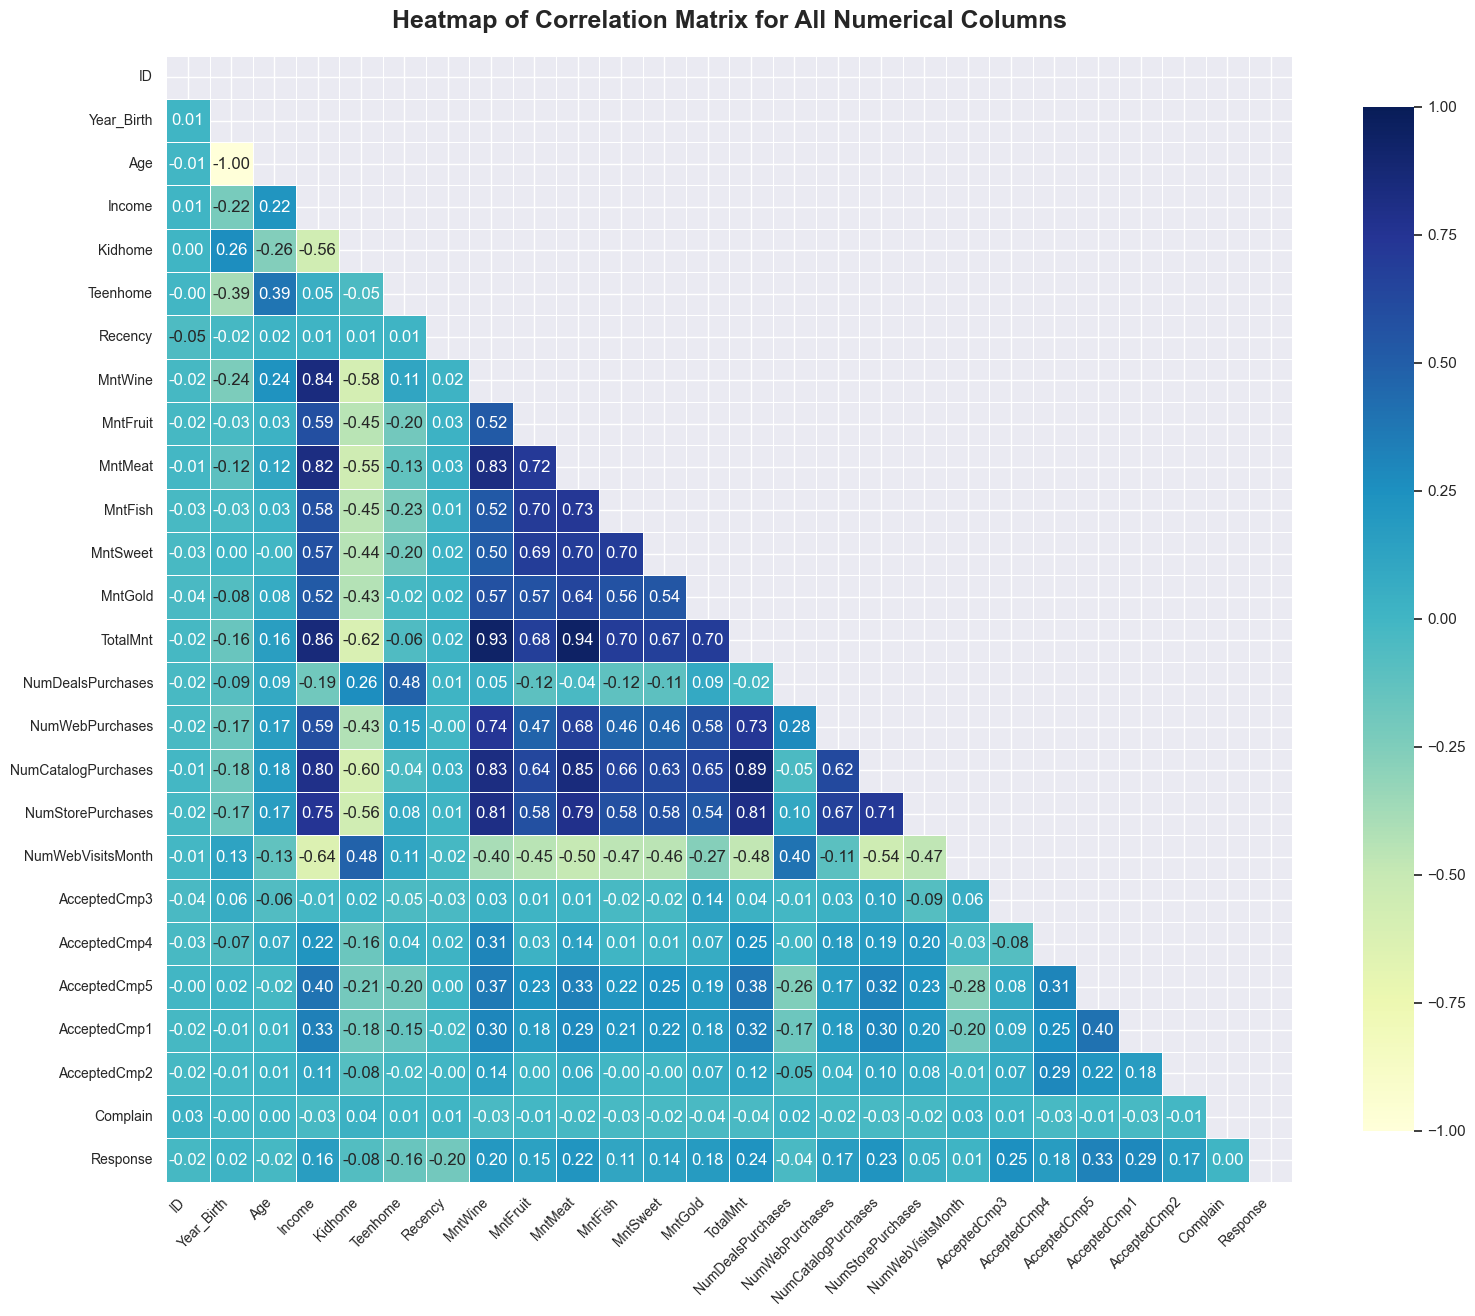

In [2467]:
# Calculate the correlation matrix for all numerical columns
numeric_columns = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr(method='spearman')

# Set up the matplotlib figure
plt.figure(figsize=(16, 14))

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(data=correlation_matrix, mask=mask, cmap='YlGnBu', annot=True, fmt=".2f",
            square=True, linewidths=0.5, cbar_kws={"shrink": .8}, center=0, vmin=-1, vmax=1)

# Add title and format
plt.title('Heatmap of Correlation Matrix for All Numerical Columns', size=18, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

Heatmap di atas menggambarkan matriks korelasi untuk semua kolom numerik dalam dataset Supermarket Customers. Setiap sel dalam heatmap menunjukkan koefisien korelasi antara dua variabel, yang berkisar antara -1 hingga 1.

Nilai Positif (0 hingga 1): Menunjukkan hubungan positif antara dua variabel, dimana jika satu variabel meningkat, variabel lainnya juga cenderung meningkat.
Nilai Negatif (-1 hingga 0): Menunjukkan hubungan negatif, dimana jika satu variabel meningkat, variabel lainnya cenderung menurun.
Nilai 0: Menunjukkan tidak ada korelasi antara dua variabel.
Interpretasi Korelasi Utama
Year_Birth vs Age:

Korelasi -1: Ini adalah hubungan linear negatif yang diharapkan, karena Age dihitung sebagai (tahun saat ini - Year_Birth).
Income:

Korelasi dengan MntWine dan MntGold: Memiliki korelasi yang moderat dengan nilai belanja pada anggur dan emas, menunjukkan bahwa pendapatan berpengaruh terhadap pembelian barang mewah.
Korelasi negatif dengan Kidhome: Pengeluaran berkurang ketika ada lebih banyak anak di rumah.
MntWine, MntMeat, MntGold:

Korelasi positif yang kuat antara item belanja ini mengindikasikan bahwa pelanggan yang menghabiskan lebih banyak pada salah satu barang ini cenderung menghabiskan lebih banyak pada yang lain.
NumWebPurchases, NumCatalogPurchases, NumStorePurchases:

Korelasi tinggi antara NumCatalogPurchases dan NumWebPurchases, menunjukkan bahwa pelanggan yang sering membeli melalui katalog juga cenderung menggunakan web untuk membeli.
AcceptedCmp:

Korelasi di antara kampanye (AcceptedCmp1 hingga AcceptedCmp5) menunjukkan bahwa pelanggan yang menerima satu kampanye sering kali menerima kampanye lainnya, menunjukkan segmen pelanggan yang responsif terhadap promosi.

<hr>

## **C.1 Analisis distribusi demografis pelanggan seperti usia, status pernikahan, dan tingkat pendidikan.**

### C.1.1 Uji Normalitas

Uji Normalitas terhadap kolom-kolom numerikal golongan People ini akan menggunakan Saphiro-Wilk karena jumlah data < 5000

In [2468]:
from scipy.stats import shapiro
list_uji_normalitas=['Year_Birth','Age', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWine', 'MntFruit',
       'MntMeat', 'MntFish', 'MntSweet',
       'MntGold', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

result=[]
for i in list_uji_normalitas:
    stat, pvalue = shapiro(df[i])
    alpha = 0.05
    if pvalue > alpha:
        hasil='Distribusi Normal'
    else:
        hasil='Distribusi Tidak Normal'
    result.append({'Kolom': i, "P-Value": f'{pvalue:.5f}', 'Normalitas':hasil})
df_result=pd.DataFrame(result)
df_result

Kolom  P-Value               Normalitas
0            Year_Birth  0.00000  Distribusi Tidak Normal
1                   Age  0.00000  Distribusi Tidak Normal
2                Income  0.00000  Distribusi Tidak Normal
3               Kidhome  0.00000  Distribusi Tidak Normal
4              Teenhome  0.00000  Distribusi Tidak Normal
5               Recency  0.00000  Distribusi Tidak Normal
6               MntWine  0.00000  Distribusi Tidak Normal
7              MntFruit  0.00000  Distribusi Tidak Normal
8               MntMeat  0.00000  Distribusi Tidak Normal
9               MntFish  0.00000  Distribusi Tidak Normal
10             MntSweet  0.00000  Distribusi Tidak Normal
11              MntGold  0.00000  Distribusi Tidak Normal
12    NumDealsPurchases  0.00000  Distribusi Tidak Normal
13      NumWebPurchases  0.00000  Distribusi Tidak Normal
14  NumCatalogPurchases  0.00000  Distribusi Tidak Normal
15    NumStorePurchases  0.00000  Distribusi Tidak Normal
16    NumWebVisitsMonth  0.00000  Distribusi Tidak Normal

               Variabel  P-Value               Normalitas
0            Year_Birth  0.00000  Distribusi Tidak Normal
1                   Age  0.00000  Distribusi Tidak Normal
2                Income  0.00000  Distribusi Tidak Normal
3               Kidhome  0.00000  Distribusi Tidak Normal
4              Teenhome  0.00000  Distribusi Tidak Normal
5               Recency  0.00000  Distribusi Tidak Normal
6               MntWine  0.00000  Distribusi Tidak Normal
7              MntFruit  0.00000  Distribusi Tidak Normal
8               MntMeat  0.00000  Distribusi Tidak Normal
9               MntFish  0.00000  Distribusi Tidak Normal
10             MntSweet  0.00000  Distribusi Tidak Normal
11              MntGold  0.00000  Distribusi Tidak Normal
12    NumDealsPurchases  0.00000  Distribusi Tidak Normal
13      NumWebPurchases  0.00000  Distribusi Tidak Normal
14  NumCatalogPurchases  0.00000  Distribusi Tidak Normal
15    NumStorePurchases  0.00000  Distribusi Tidak Normal
16    NumWebVi

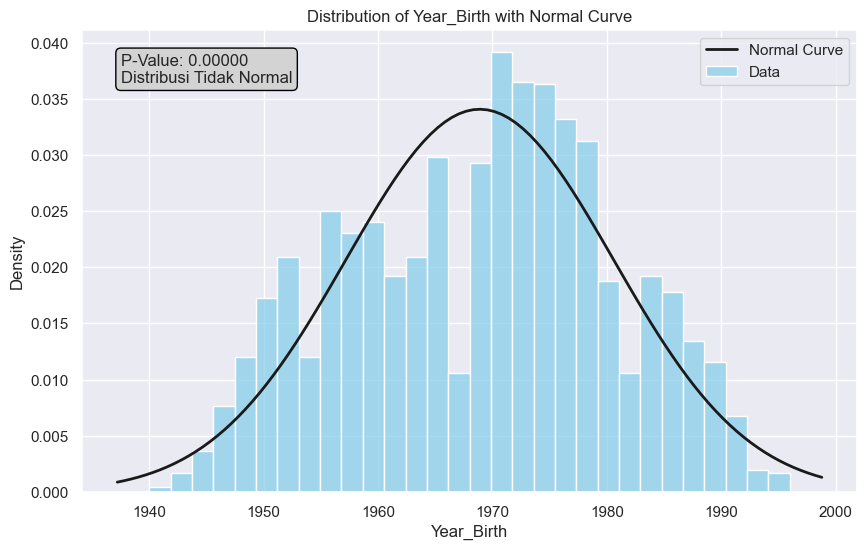

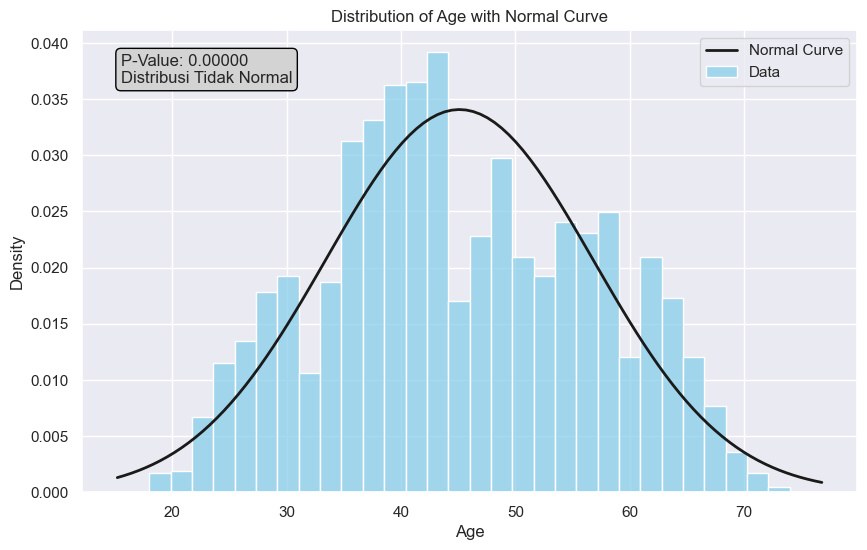

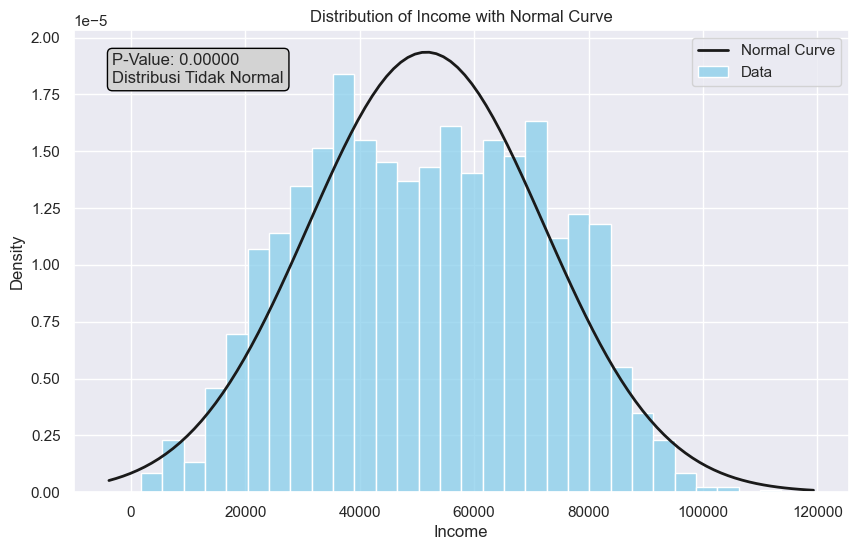

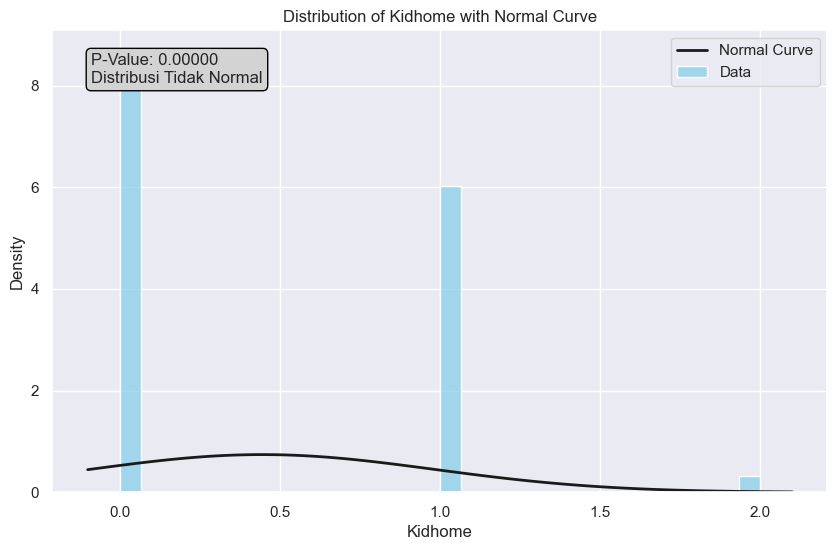

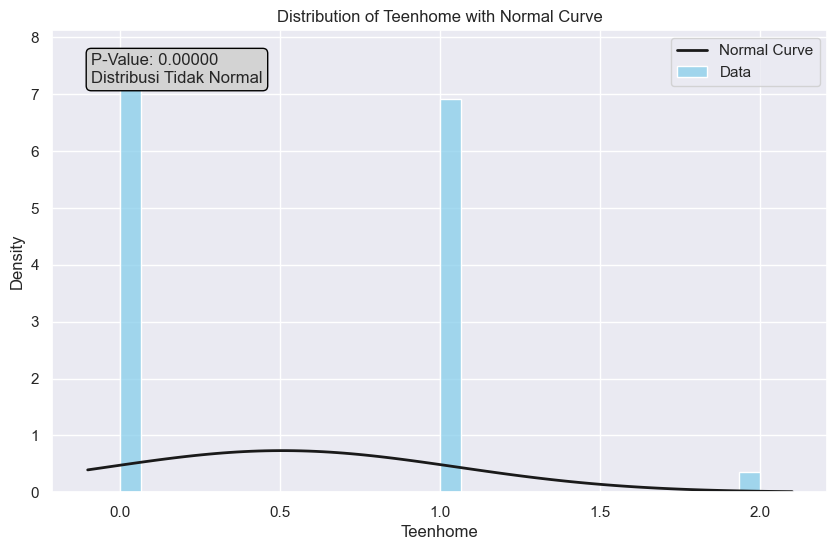

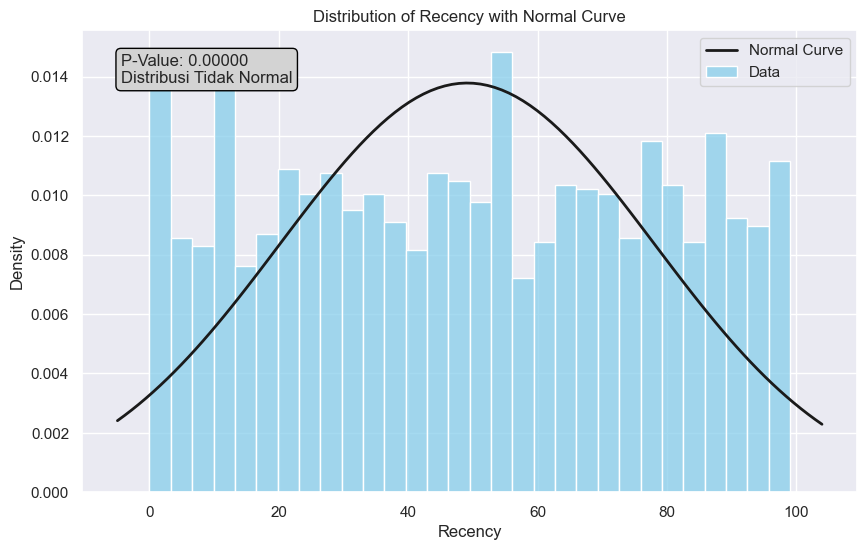

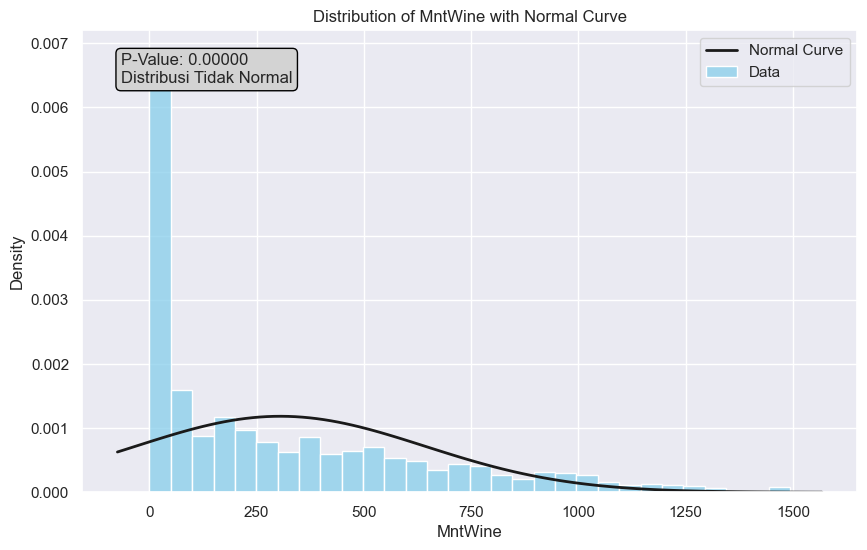

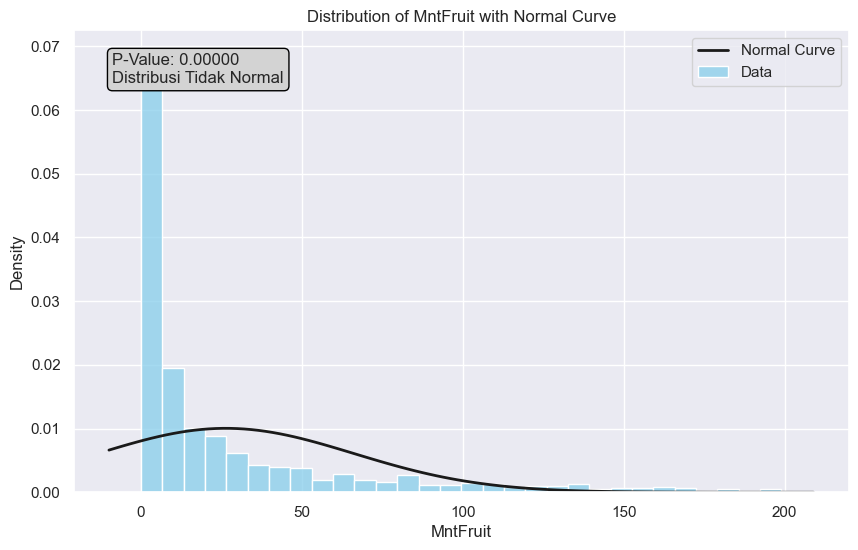

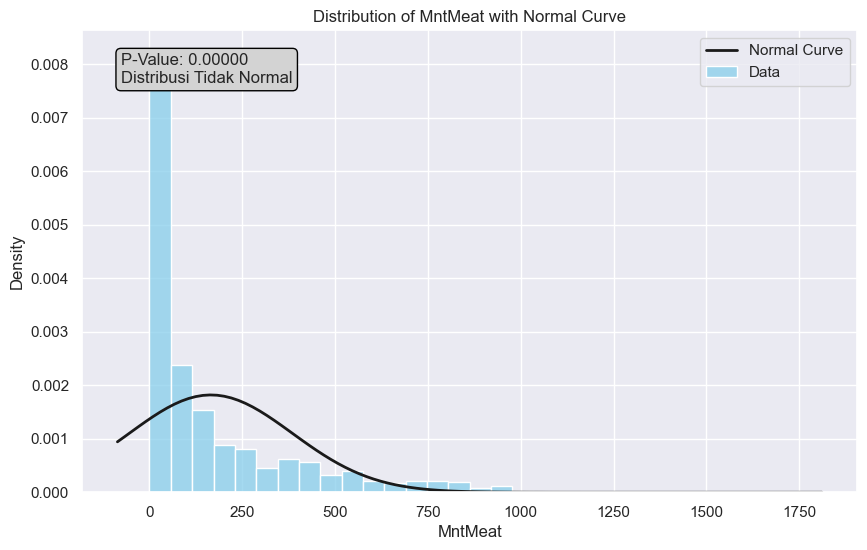

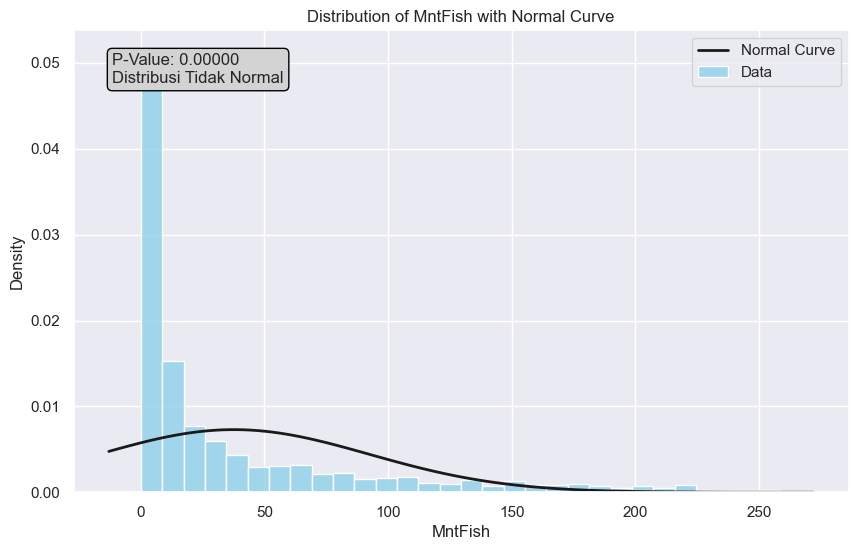

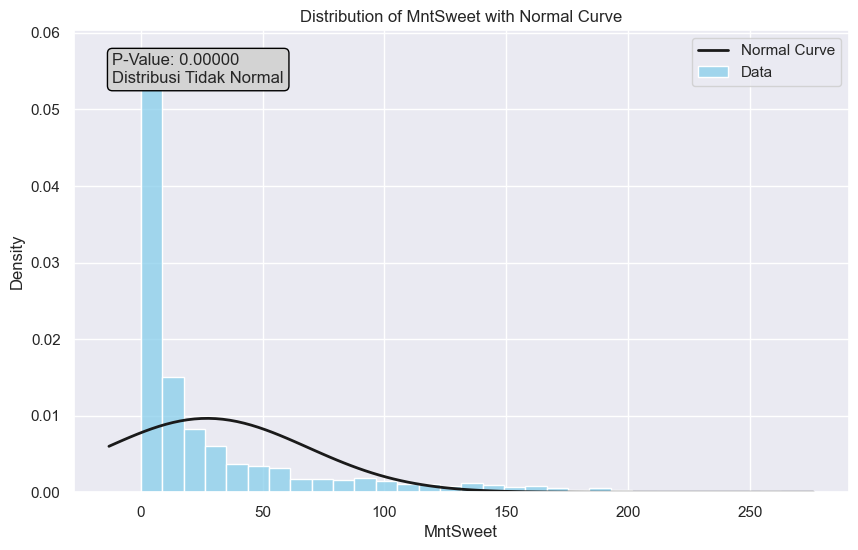

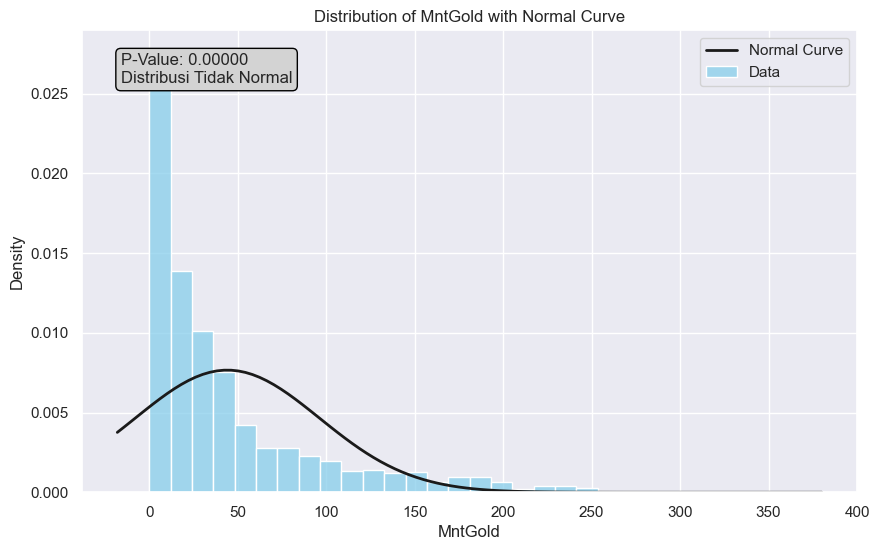

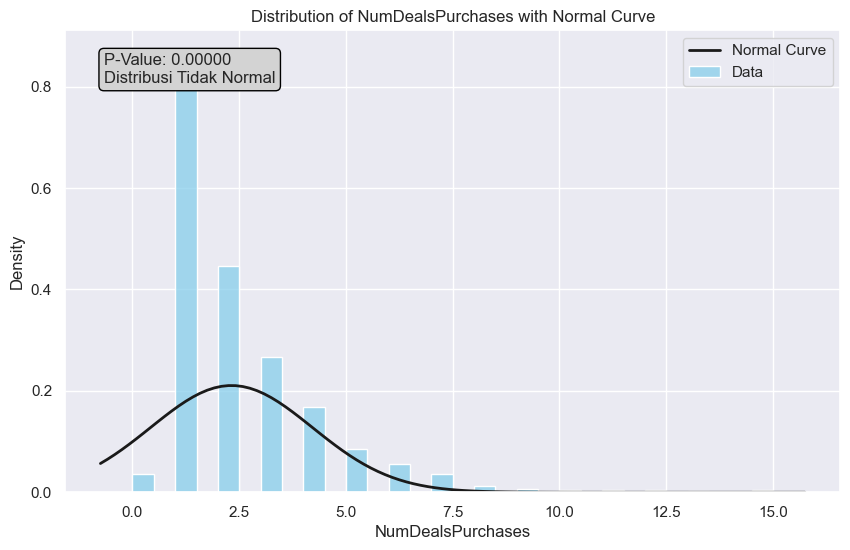

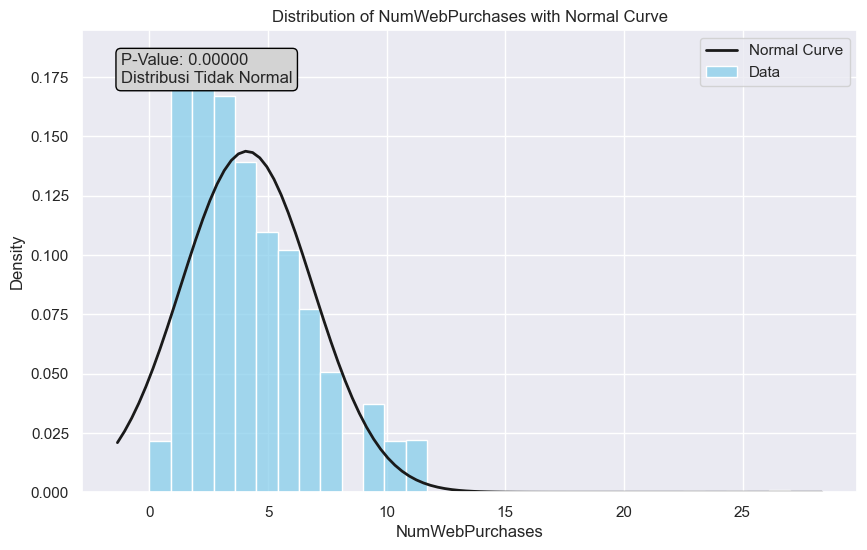

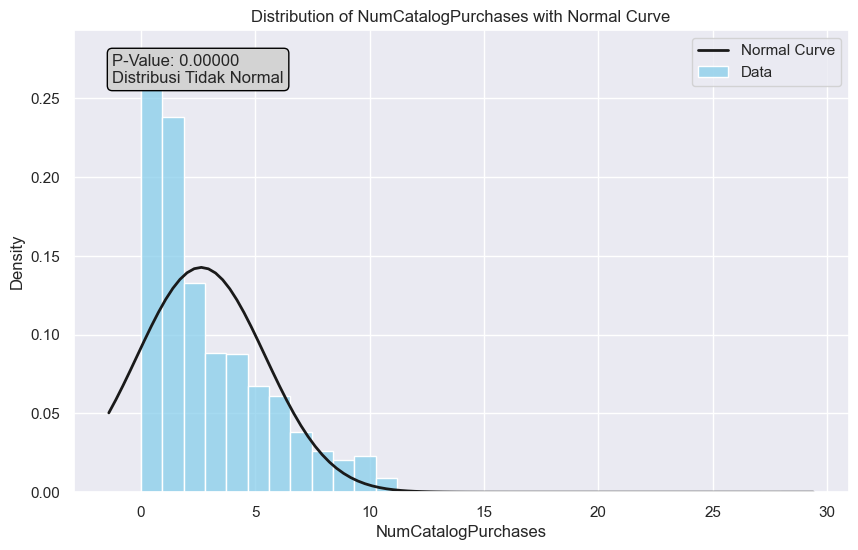

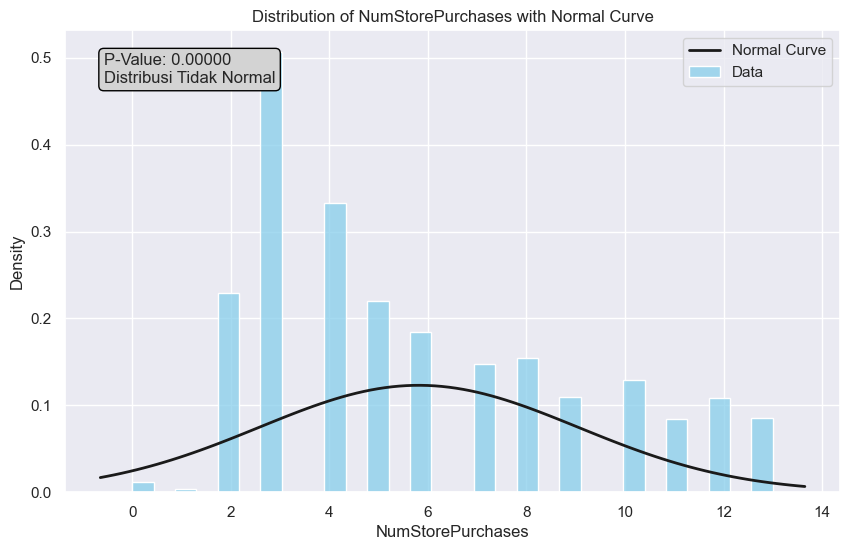

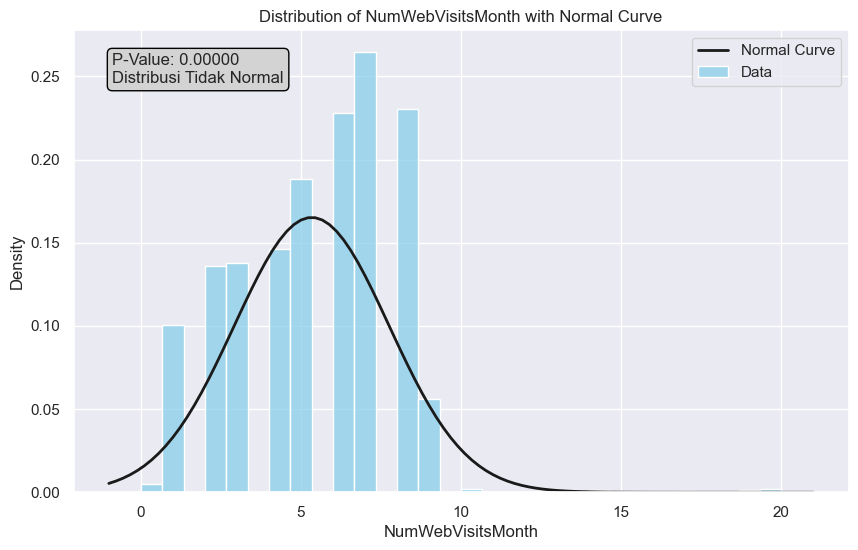

In [2469]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, norm

# List of numerical columns to test
list_uji_normalitas = ['Year_Birth','Age', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWine', 'MntFruit',
       'MntMeat', 'MntFish', 'MntSweet',
       'MntGold', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

# Perform Shapiro-Wilk test and store results
result = []
for i in list_uji_normalitas:
    stat, pvalue = shapiro(df[i].dropna())  # Drop NaN values for the test
    alpha = 0.05
    if pvalue > alpha:
        hasil = 'Distribusi Normal'
    else:
        hasil = 'Distribusi Tidak Normal'
    result.append({'Variabel': i, "P-Value": f'{pvalue:.5f}', 'Normalitas': hasil})

df_result = pd.DataFrame(result)

# Display normality test results
print(df_result)

# Visualize the distribution of each variable with a histogram and normal distribution overlay
for i in list_uji_normalitas:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[i], bins=30, kde=False, color='skyblue', stat='density', label='Data')
    # Overlay a normal distribution curve
    mean, std = df[i].mean(), df[i].std()
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mean, std)
    plt.plot(x, p, 'k', linewidth=2, label='Normal Curve')
    plt.title(f'Distribution of {i} with Normal Curve')
    plt.xlabel(i)
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)

    # Add annotation with the p-value and normality result
    plt.annotate(f'P-Value: {pvalue:.5f}\n{hasil}', xy=(0.05, 0.95), xycoords='axes fraction', 
                 fontsize=12, ha='left', va='top', bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='lightgrey'))

    plt.show()


Pada kolom-kolom kategori people ini setelah diuji normalitas menggunakan Saphiro-Wilk, ternyata seluruhnya tidak terdistribusi normal

### C.1.2 Analisis Distribusi kolom Age_category

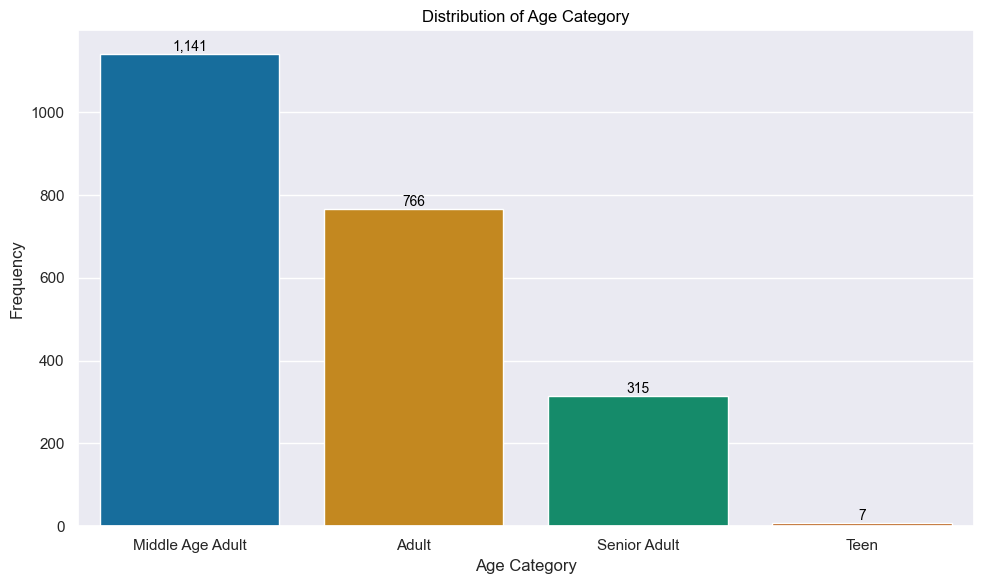

In [2470]:
# Hitung frekuensi dan mode dari 'Age_category'
frequency_counts = df['Age_category'].value_counts()
mode_value = df['Age_category'].mode()[0]

# Fungsi untuk menambahkan anotasi pada setiap bar
def annotate_bars(ax):
    for bar in ax.patches:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2, height + 0.5, f'{int(height):,d}',
            va='bottom', ha='center', color='black', fontsize=10
        )
    return ax

# Plot distribusi kategori usia
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Distribution of Age Category', color='black')
sns.barplot(x=frequency_counts.index, y=frequency_counts.values, ax=ax, palette='colorblind')
ax.set_xticklabels(ax.get_xticklabels(), ha='center')
ax.set_xlabel('Age Category')  # Perbaikan label
ax.set_ylabel('Frequency')
annotate_bars(ax)
plt.tight_layout()
plt.show()


Insight:

Kelompok usia "Middle Age Adult" merupakan segmen pasar utama yang paling banyak menggunakan layanan atau produk yang ditawarkan, dengan jumlah pelanggan sebanyak 1.143 orang. Hal ini menunjukkan bahwa produk atau layanan tersebut sangat relevan dengan kebutuhan dan preferensi kelompok usia ini. Di samping itu, kelompok usia Adult juga merupakan segmen yang sangat penting, dengan jumlah pelanggan sebanyak 770 orang. Segmen ini memiliki potensi besar untuk ditargetkan dalam strategi pemasaran, karena mereka memiliki kemampuan belanja yang cukup besar dan cenderung loyal terhadap produk atau layanan yang mereka sukai. Meskipun jumlah pelanggan Senior Adult relatif lebih kecil, yaitu sebanyak 316 orang, namun kelompok usia ini tetap merupakan segmen yang cukup signifikan untuk dipertimbangkan dalam strategi promosi. Mereka memiliki pengalaman dan pengetahuan yang luas, sehingga dapat menjadi sumber inspirasi bagi pengembangan produk atau layanan yang lebih baik. Sementara itu, kelompok usia "Teen" merupakan segmen yang paling kecil, dengan jumlah pelanggan hanya sebanyak 7 orang. Hal ini mengindikasikan bahwa produk atau layanan tersebut mungkin tidak banyak menarik perhatian kelompok usia ini. Namun, hal ini juga dapat menjadi peluang untuk inovasi atau pengembangan produk yang lebih menarik bagi kaum muda, sehingga dapat meningkatkan kesadaran dan minat mereka terhadap produk atau layanan tersebut.

### C.1.3 Analisis Distribusi kolom Education

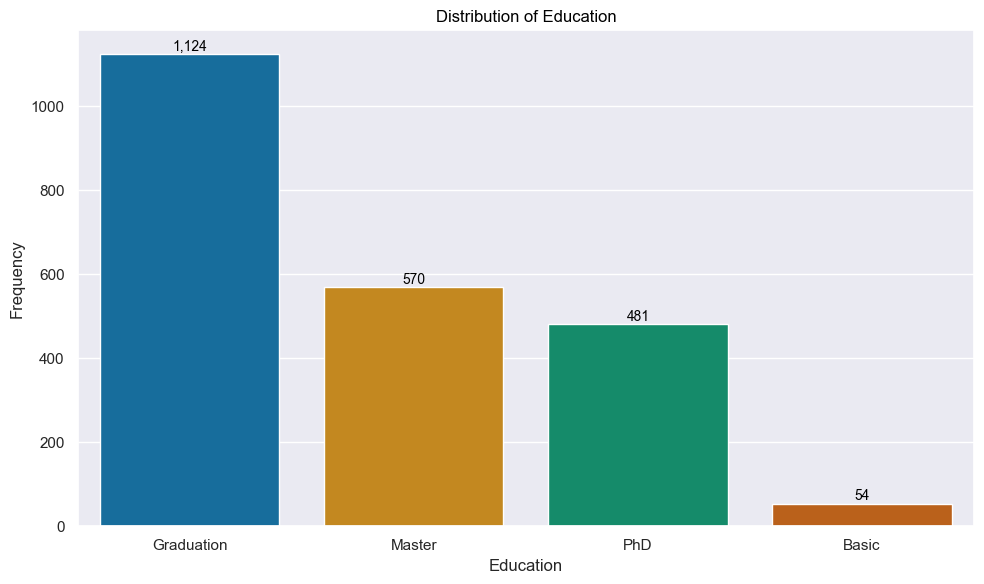

In [2471]:
# Hitung frekuensi dan mode dari 'Age_category'
frequency_counts = df['Education'].value_counts()
mode_value = df['Education'].mode()[0]

# Fungsi untuk menambahkan anotasi pada setiap bar
def annotate_bars(ax):
    for bar in ax.patches:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2, height + 0.5, f'{int(height):,d}',
            va='bottom', ha='center', color='black', fontsize=10
        )
    return ax

# Plot distribusi kategori usia
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Distribution of Education', color='black')
sns.barplot(x=frequency_counts.index, y=frequency_counts.values, ax=ax, palette='colorblind')
ax.set_xticklabels(ax.get_xticklabels(), ha='center')
ax.set_xlabel('Education')  # Perbaikan label
ax.set_ylabel('Frequency')
annotate_bars(ax)
plt.tight_layout()
plt.show()


In [2480]:
df

ID  Year_Birth  Age      Age_category   Education Marital_Status  \
0      5524        1957   57  Middle Age Adult  Graduation         Single   
1      2174        1954   60      Senior Adult  Graduation         Single   
2      4141        1965   49  Middle Age Adult  Graduation         Couple   
3      6182        1984   30             Adult  Graduation         Couple   
4      5324        1981   33             Adult         PhD         Couple   
...     ...         ...  ...               ...         ...            ...   
2235  10870        1967   47  Middle Age Adult  Graduation         Couple   
2236   4001        1946   68      Senior Adult         PhD         Couple   
2237   7270        1981   33             Adult  Graduation       Divorced   
2238   8235        1956   58  Middle Age Adult      Master         Couple   
2239   9405        1954   60      Senior Adult         PhD         Couple   

       Income  Income_category  Kidhome  Teenhome Dt_Customer  Recency  \
0     58138.0  3. Upper-Middle        0         0  2012-09-04       58   
1     46344.0  2. Lower-Middle        1         1  2014-03-08       38   
2     71613.0         4. Upper        0         0  2013-08-21       26   
3     26646.0         1. Lower        1         0  2014-02-10       26   
4     58293.0  3. Upper-Middle        1         0  2014-01-19       94   
...       ...              ...      ...       ...         ...      ...   
2235  61223.0  3. Upper-Middle        0         1  2013-06-13       46   
2236  64014.0  3. Upper-Middle        2         1  2014-06-10       56   
2237  56981.0  3. Upper-Middle        0         0  2014-01-25       91   
2238  69245.0         4. Upper        0         1  2014-01-24        8   
2239  52869.0  3. Upper-Middle        1         1  2012-10-15       40   

      MntWine  MntFruit  MntMeat  MntFish  MntSweet  MntGold  TotalMnt  \
0         635        88      546      172        88       88      1617   
1          11         1        6        2         1        6        27   
2         426        49      127      111        21       42       776   
3          11         4       20       10         3        5        53   
4         173        43      118       46        27       15       422   
...       ...       ...      ...      ...       ...      ...       ...   
2235      709        43      182       42       118      247      1341   
2236      406         0       30        0         0        8       444   
2237      908        48      217       32        12       24      1241   
2238      428        30      214       80        30       61       843   
2239       84         3       61        2         1       21       172   

      NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0                     3                8                   10   
1                     2                1                    1   
2                     1                8                    2   
3                     2                2                    0   
4                     5                5                    3   
...                 ...              ...                  ...   
2235                  2                9                    3   
2236                  7                8                    2   
2237                  1                2                    3   
2238                  2                6                    5   
2239                  3                3                    1   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                     4                  7             0             0   
1                     2                  5             0             0   
2                    10                  4             0             0   
3                     4                  6             0             0   
4                     6                  5             0             0   
...                 ...                ...           ...           ...   
2235   

Insight:

Distribusi tingkat pendidikan pelanggan menunjukkan bahwa sebagian besar pelanggan memiliki latar belakang pendidikan yang tinggi. Kategori "Graduation" merupakan yang paling dominan dengan 1.126 pelanggan, yang menunjukkan bahwa mayoritas pelanggan memiliki gelar sarjana. Hal ini mungkin mencerminkan preferensi atau kebutuhan produk yang lebih berorientasi pada konsumen berpendidikan tinggi. Selain itu, terdapat 571 pelanggan dengan tingkat pendidikan "Master", yang menunjukkan bahwa banyak pelanggan yang telah melanjutkan studi pascasarjana. Ini menunjukkan potensi pasar yang kuat di antara konsumen berpendidikan tinggi. Kategori "PhD" juga memiliki jumlah yang signifikan dengan 485 pelanggan, yang menunjukkan bahwa ada sejumlah pelanggan dengan pendidikan sangat tinggi. Di sisi lain, kategori "Basic" memiliki jumlah terendah dengan hanya 54 pelanggan. Hal ini mungkin menunjukkan bahwa segmen pasar dengan pendidikan dasar tidak terlalu signifikan dalam konteks produk atau layanan yang ditawarkan saat ini. Namun, ini juga dapat menjadi peluang untuk perluasan produk yang lebih inklusif atau beragam, sehingga dapat menjangkau konsumen dengan latar belakang pendidikan yang lebih beragam.






### C.1.4 Analisis Distribusi kolom Marital Status

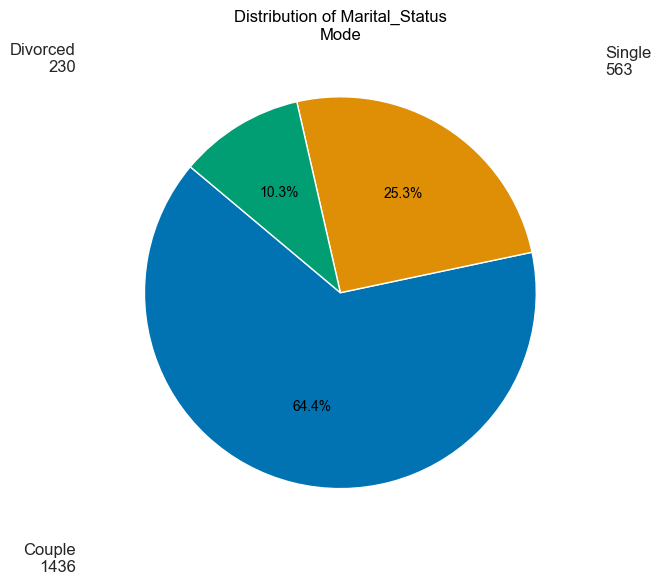

In [2472]:
frequency_counts_travel_frequency = df['Marital_Status'].value_counts()
mode_value_travel_frequency = df['Marital_Status'].mode()[0]

ordered_categories = ['Couple', 'Single', 'Divorced']
frequency_counts_travel_frequency = frequency_counts_travel_frequency.reindex(ordered_categories)

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title(f"Distribution of Marital_Status\nMode", color="black")

colors = sns.color_palette('colorblind', len(frequency_counts_travel_frequency))

wedges, texts, autotexts = ax.pie(
    frequency_counts_travel_frequency.values,
    labels=None, 
    autopct='%1.1f%%', 
    startangle=140,
    colors=colors
)

for i, pie_wedge in enumerate(wedges):
    ang = (pie_wedge.theta2 - pie_wedge.theta1)/2. + pie_wedge.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    
    if x > 0:
        horizontalalignment = 'left'
    else:
        horizontalalignment = 'right'
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    ax.annotate(f'{frequency_counts_travel_frequency.index[i]}\n{frequency_counts_travel_frequency.values[i]}', xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, verticalalignment='center',
                arrowprops=dict(arrowstyle="-", connectionstyle=connectionstyle))

for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(10)

plt.tight_layout()
plt.show()

In [2481]:
df

ID  Year_Birth  Age      Age_category   Education Marital_Status  \
0      5524        1957   57  Middle Age Adult  Graduation         Single   
1      2174        1954   60      Senior Adult  Graduation         Single   
2      4141        1965   49  Middle Age Adult  Graduation         Couple   
3      6182        1984   30             Adult  Graduation         Couple   
4      5324        1981   33             Adult         PhD         Couple   
...     ...         ...  ...               ...         ...            ...   
2235  10870        1967   47  Middle Age Adult  Graduation         Couple   
2236   4001        1946   68      Senior Adult         PhD         Couple   
2237   7270        1981   33             Adult  Graduation       Divorced   
2238   8235        1956   58  Middle Age Adult      Master         Couple   
2239   9405        1954   60      Senior Adult         PhD         Couple   

       Income  Income_category  Kidhome  Teenhome Dt_Customer  Recency  \
0     58138.0  3. Upper-Middle        0         0  2012-09-04       58   
1     46344.0  2. Lower-Middle        1         1  2014-03-08       38   
2     71613.0         4. Upper        0         0  2013-08-21       26   
3     26646.0         1. Lower        1         0  2014-02-10       26   
4     58293.0  3. Upper-Middle        1         0  2014-01-19       94   
...       ...              ...      ...       ...         ...      ...   
2235  61223.0  3. Upper-Middle        0         1  2013-06-13       46   
2236  64014.0  3. Upper-Middle        2         1  2014-06-10       56   
2237  56981.0  3. Upper-Middle        0         0  2014-01-25       91   
2238  69245.0         4. Upper        0         1  2014-01-24        8   
2239  52869.0  3. Upper-Middle        1         1  2012-10-15       40   

      MntWine  MntFruit  MntMeat  MntFish  MntSweet  MntGold  TotalMnt  \
0         635        88      546      172        88       88      1617   
1          11         1        6        2         1        6        27   
2         426        49      127      111        21       42       776   
3          11         4       20       10         3        5        53   
4         173        43      118       46        27       15       422   
...       ...       ...      ...      ...       ...      ...       ...   
2235      709        43      182       42       118      247      1341   
2236      406         0       30        0         0        8       444   
2237      908        48      217       32        12       24      1241   
2238      428        30      214       80        30       61       843   
2239       84         3       61        2         1       21       172   

      NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0                     3                8                   10   
1                     2                1                    1   
2                     1                8                    2   
3                     2                2                    0   
4                     5                5                    3   
...                 ...              ...                  ...   
2235                  2                9                    3   
2236                  7                8                    2   
2237                  1                2                    3   
2238                  2                6                    5   
2239                  3                3                    1   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                     4                  7             0             0   
1                     2                  5             0             0   
2                    10                  4             0             0   
3                     4                  6             0             0   
4                     6                  5             0             0   
...                 ...                ...           ...           ...   
2235   

Insight:

Distribusi marital status pelanggan menunjukkan bahwa pasangan (baik yang menikah maupun yang tinggal bersama) merupakan segmen pasar terbesar, dengan 1.442 pelanggan. Ini menunjukkan bahwa produk atau layanan yang ditawarkan sangat relevan dengan kebutuhan dan preferensi pasangan.Selain itu, terdapat 563 pelanggan yang belum menikah, dan 231 pelanggan yang telah bercerai. Meskipun jumlahnya lebih kecil, kedua segmen ini tetap relevan untuk dipertimbangkan dalam strategi pemasaran. Fokus pemasaran dapat diarahkan untuk memaksimalkan keterlibatan dan kepuasan pelanggan dari kelompok pasangan, serta menawarkan produk atau layanan yang sesuai dengan kebutuhan dan preferensi pelanggan single dan divorced.






<hr>

## **C.2 Segmentasi produk berdasarkan pembelian produk.**

In [2473]:
import pandas as pd
import plotly.express as px

# Calculate median spending on product categories
avg = df[['MntWine', 'MntFruit', 'MntMeat', 'MntFish',
          'MntSweet', 'MntGold']].median(axis=0)

# Define a custom color sequence
custom_colors = ['#4CAF50', '#FFC107', '#2196F3', '#FF5722', '#9C27B0', '#E91E63']

# Create a pie chart using plotly
fig = px.pie(values=avg.values, names=avg.index, 
             color_discrete_sequence=custom_colors)

# Update layout for larger size and improved aesthetics
fig.update_layout(
    title_text='Median Amount Spent on Product Categories', 
    title_x=0.5,
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="right",
        x=0.99
    ),
    width=800,  # Set the width of the figure
    height=600  # Set the height of the figure
)

# Display the chart
fig.show()


Pembelian paling banyak diminati adalah anggur (59,7%) dan daging (22,7%). Kemudian diikuti oleh emas (8,14%), ikan (4,07%), permen (2,71%), dan buah (2,71%).

Grafik diatas menunjukkan bahwa produk anggur dan daging sangat populer dan diminati oleh masyarakat. Sementara itu, produk lain seperti emas, ikan, permen, dan buah kurang diminati karena beberapa faktor, seperti produk tidak sesuai dengan kebutuhan, harga yang tidak kompetitif, atau kurangnya promosi yang efektif.

Selanjutnya akan dilakukan group by antara Age_category, Marital_Status, Income_category, Education, Kidhome, Teenhome, terhadap kolom ['MntWine', 'MntFruit', 'MntMeat', 'MntFish', 'MntSweet', 'MntGold'], dan melakukan uji statistik menggunakan Kruskal Wallis, karena pengujian ini dilakukan antara kolom kategori dan numerikal

In [2474]:
import pandas as pd
from scipy.stats import kruskal

# Define the product columns
cols = ['MntWine', 'MntFruit', 'MntMeat', 'MntFish', 'MntSweet', 'MntGold']

# Display grouped median values
display(
    df.groupby('Age_category')[cols].agg('median'),
    df.groupby('Marital_Status')[cols].agg('median'),
    df.groupby('Income_category')[cols].agg('median'),
    df.groupby('Education')[cols].agg('median'),
    df.groupby('Kidhome')[cols].agg('median'),
    df.groupby('Teenhome')[cols].agg('median')
)

# Function to perform Kruskal-Wallis test for each product category
def kruskal_test(column_name, group_column, group_labels):
    groups = [df[df[group_column] == label][column_name] for label in group_labels]
    stat, pvalue = kruskal(*groups)
    alpha = 0.05

    if pvalue > alpha:
        print(f"pvalue = {pvalue:.5f}. pvalue > {alpha}. Gagal menolak Ho.")
        print(f"Kita tidak punya cukup bukti untuk mengatakan bahwa dari kelompok {group_column} tersebut terdapat satu kelompok yang memiliki rata-rata yang berbeda.\n")
    else:
        print(f"pvalue = {pvalue:.5f}. pvalue < {alpha}. Menolak Ho.")
        print(f"Kita punya cukup bukti untuk mengatakan bahwa dari kelompok {group_column} tersebut terdapat satu kelompok yang memiliki rata-rata yang berbeda.\n")

# Example of applying Kruskal-Wallis test
for col in cols:
    print(f"Kruskal-Wallis Test for {col} by Age_category:")
    kruskal_test(col, 'Age_category', df['Age_category'].unique())

    print(f"Kruskal-Wallis Test for {col} by Marital_Status:")
    kruskal_test(col, 'Marital_Status', df['Marital_Status'].unique())

    print(f"Kruskal-Wallis Test for {col} by Income_category:")
    kruskal_test(col, 'Income_category', df['Income_category'].unique())

    print(f"Kruskal-Wallis Test for {col} by Education:")
    kruskal_test(col, 'Education', df['Education'].unique())

    print(f"Kruskal-Wallis Test for {col} by Kidhome:")
    kruskal_test(col, 'Kidhome', df['Kidhome'].unique())

    print(f"Kruskal-Wallis Test for {col} by Teenhome:")
    kruskal_test(col, 'Teenhome', df['Teenhome'].unique())


MntWine  MntFruit  MntMeat  MntFish  MntSweet  MntGold
Age_category                                                            
Adult                69.0       7.0     49.0     12.0       9.0     22.0
Middle Age Adult    203.0       8.0     68.0     11.0       7.0     25.0
Senior Adult        332.0      13.0    108.0     19.0      13.0     33.0
Teen                  4.0      17.0     14.0     15.0      22.0     32.0

MntWine  MntFruit  MntMeat  MntFish  MntSweet  MntGold
Marital_Status                                                        
Couple            178.5       8.0     66.0     12.0       8.0     23.0
Divorced          184.0       8.0     72.5     10.5       7.0     25.5
Single            162.0       9.0     68.0     13.0       9.0     27.0

MntWine  MntFruit  MntMeat  MntFish  MntSweet  MntGold
Income_category                                                        
1. Lower            10.0       3.0     12.0      4.0       3.0     10.0
2. Lower-Middle     68.0       3.0     29.0      4.0       3.0     15.0
3. Upper-Middle    378.5      14.0    114.5     16.5      12.0     38.5
4. Upper           595.5      46.5    405.0     73.0      50.0     53.0

MntWine  MntFruit  MntMeat  MntFish  MntSweet  MntGold
Education                                                         
Basic           2.0       7.0      7.0      9.0       7.0     15.0
Graduation    184.0      10.0     78.5     15.0      12.0     29.0
Master        145.5       8.0     59.0     12.0       7.5     23.5
PhD           284.0       4.0     69.0      6.0       3.0     16.0

MntWine  MntFruit  MntMeat  MntFish  MntSweet  MntGold
Kidhome                                                        
0          398.0      22.0    161.0     32.0      22.0     39.0
1           25.0       3.0     18.0      4.0       3.0     12.0
2           26.0       1.0     13.0      3.0       1.0      8.5

MntWine  MntFruit  MntMeat  MntFish  MntSweet  MntGold
Teenhome                                                        
0           135.0      12.0     88.5     19.0      13.0     25.0
1           202.0       5.0     57.0      7.0       6.0     24.0
2           322.0       9.0     88.0     11.0       4.0     20.5

Kruskal-Wallis Test for MntWine by Age_category:
pvalue = 0.00000. pvalue < 0.05. Menolak Ho.
Kita punya cukup bukti untuk mengatakan bahwa dari kelompok Age_category tersebut terdapat satu kelompok yang memiliki rata-rata yang berbeda.

Kruskal-Wallis Test for MntWine by Marital_Status:
pvalue = 0.61925. pvalue > 0.05. Gagal menolak Ho.
Kita tidak punya cukup bukti untuk mengatakan bahwa dari kelompok Marital_Status tersebut terdapat satu kelompok yang memiliki rata-rata yang berbeda.

Kruskal-Wallis Test for MntWine by Income_category:
pvalue = 0.00000. pvalue < 0.05. Menolak Ho.
Kita punya cukup bukti untuk mengatakan bahwa dari kelompok Income_category tersebut terdapat satu kelompok yang memiliki rata-rata yang berbeda.

Kruskal-Wallis Test for MntWine by Education:
pvalue = 0.00000. pvalue < 0.05. Menolak Ho.
Kita punya cukup bukti untuk mengatakan bahwa dari kelompok Education tersebut terdapat satu kelompok yang memiliki rata-rata yang berbeda.

Kruskal-Wallis Test for MntWine 

In [2475]:
cols = ['MntWine', 'MntFruit', 'MntMeat', 'MntFish', 'MntSweet','MntGold']
display(df.groupby('Age_category')[cols].agg('median'),
        df.groupby('Marital_Status')[cols].agg('median'),
        df.groupby('Income_category')[cols].agg('median'),
        df.groupby('Education')[cols].agg('median'),
        df.groupby('Kidhome')[cols].agg('median'),
        df.groupby('Teenhome')[cols].agg('median')
)

MntWine  MntFruit  MntMeat  MntFish  MntSweet  MntGold
Age_category                                                            
Adult                69.0       7.0     49.0     12.0       9.0     22.0
Middle Age Adult    203.0       8.0     68.0     11.0       7.0     25.0
Senior Adult        332.0      13.0    108.0     19.0      13.0     33.0
Teen                  4.0      17.0     14.0     15.0      22.0     32.0

MntWine  MntFruit  MntMeat  MntFish  MntSweet  MntGold
Marital_Status                                                        
Couple            178.5       8.0     66.0     12.0       8.0     23.0
Divorced          184.0       8.0     72.5     10.5       7.0     25.5
Single            162.0       9.0     68.0     13.0       9.0     27.0

MntWine  MntFruit  MntMeat  MntFish  MntSweet  MntGold
Income_category                                                        
1. Lower            10.0       3.0     12.0      4.0       3.0     10.0
2. Lower-Middle     68.0       3.0     29.0      4.0       3.0     15.0
3. Upper-Middle    378.5      14.0    114.5     16.5      12.0     38.5
4. Upper           595.5      46.5    405.0     73.0      50.0     53.0

MntWine  MntFruit  MntMeat  MntFish  MntSweet  MntGold
Education                                                         
Basic           2.0       7.0      7.0      9.0       7.0     15.0
Graduation    184.0      10.0     78.5     15.0      12.0     29.0
Master        145.5       8.0     59.0     12.0       7.5     23.5
PhD           284.0       4.0     69.0      6.0       3.0     16.0

MntWine  MntFruit  MntMeat  MntFish  MntSweet  MntGold
Kidhome                                                        
0          398.0      22.0    161.0     32.0      22.0     39.0
1           25.0       3.0     18.0      4.0       3.0     12.0
2           26.0       1.0     13.0      3.0       1.0      8.5

MntWine  MntFruit  MntMeat  MntFish  MntSweet  MntGold
Teenhome                                                        
0           135.0      12.0     88.5     19.0      13.0     25.0
1           202.0       5.0     57.0      7.0       6.0     24.0
2           322.0       9.0     88.0     11.0       4.0     20.5

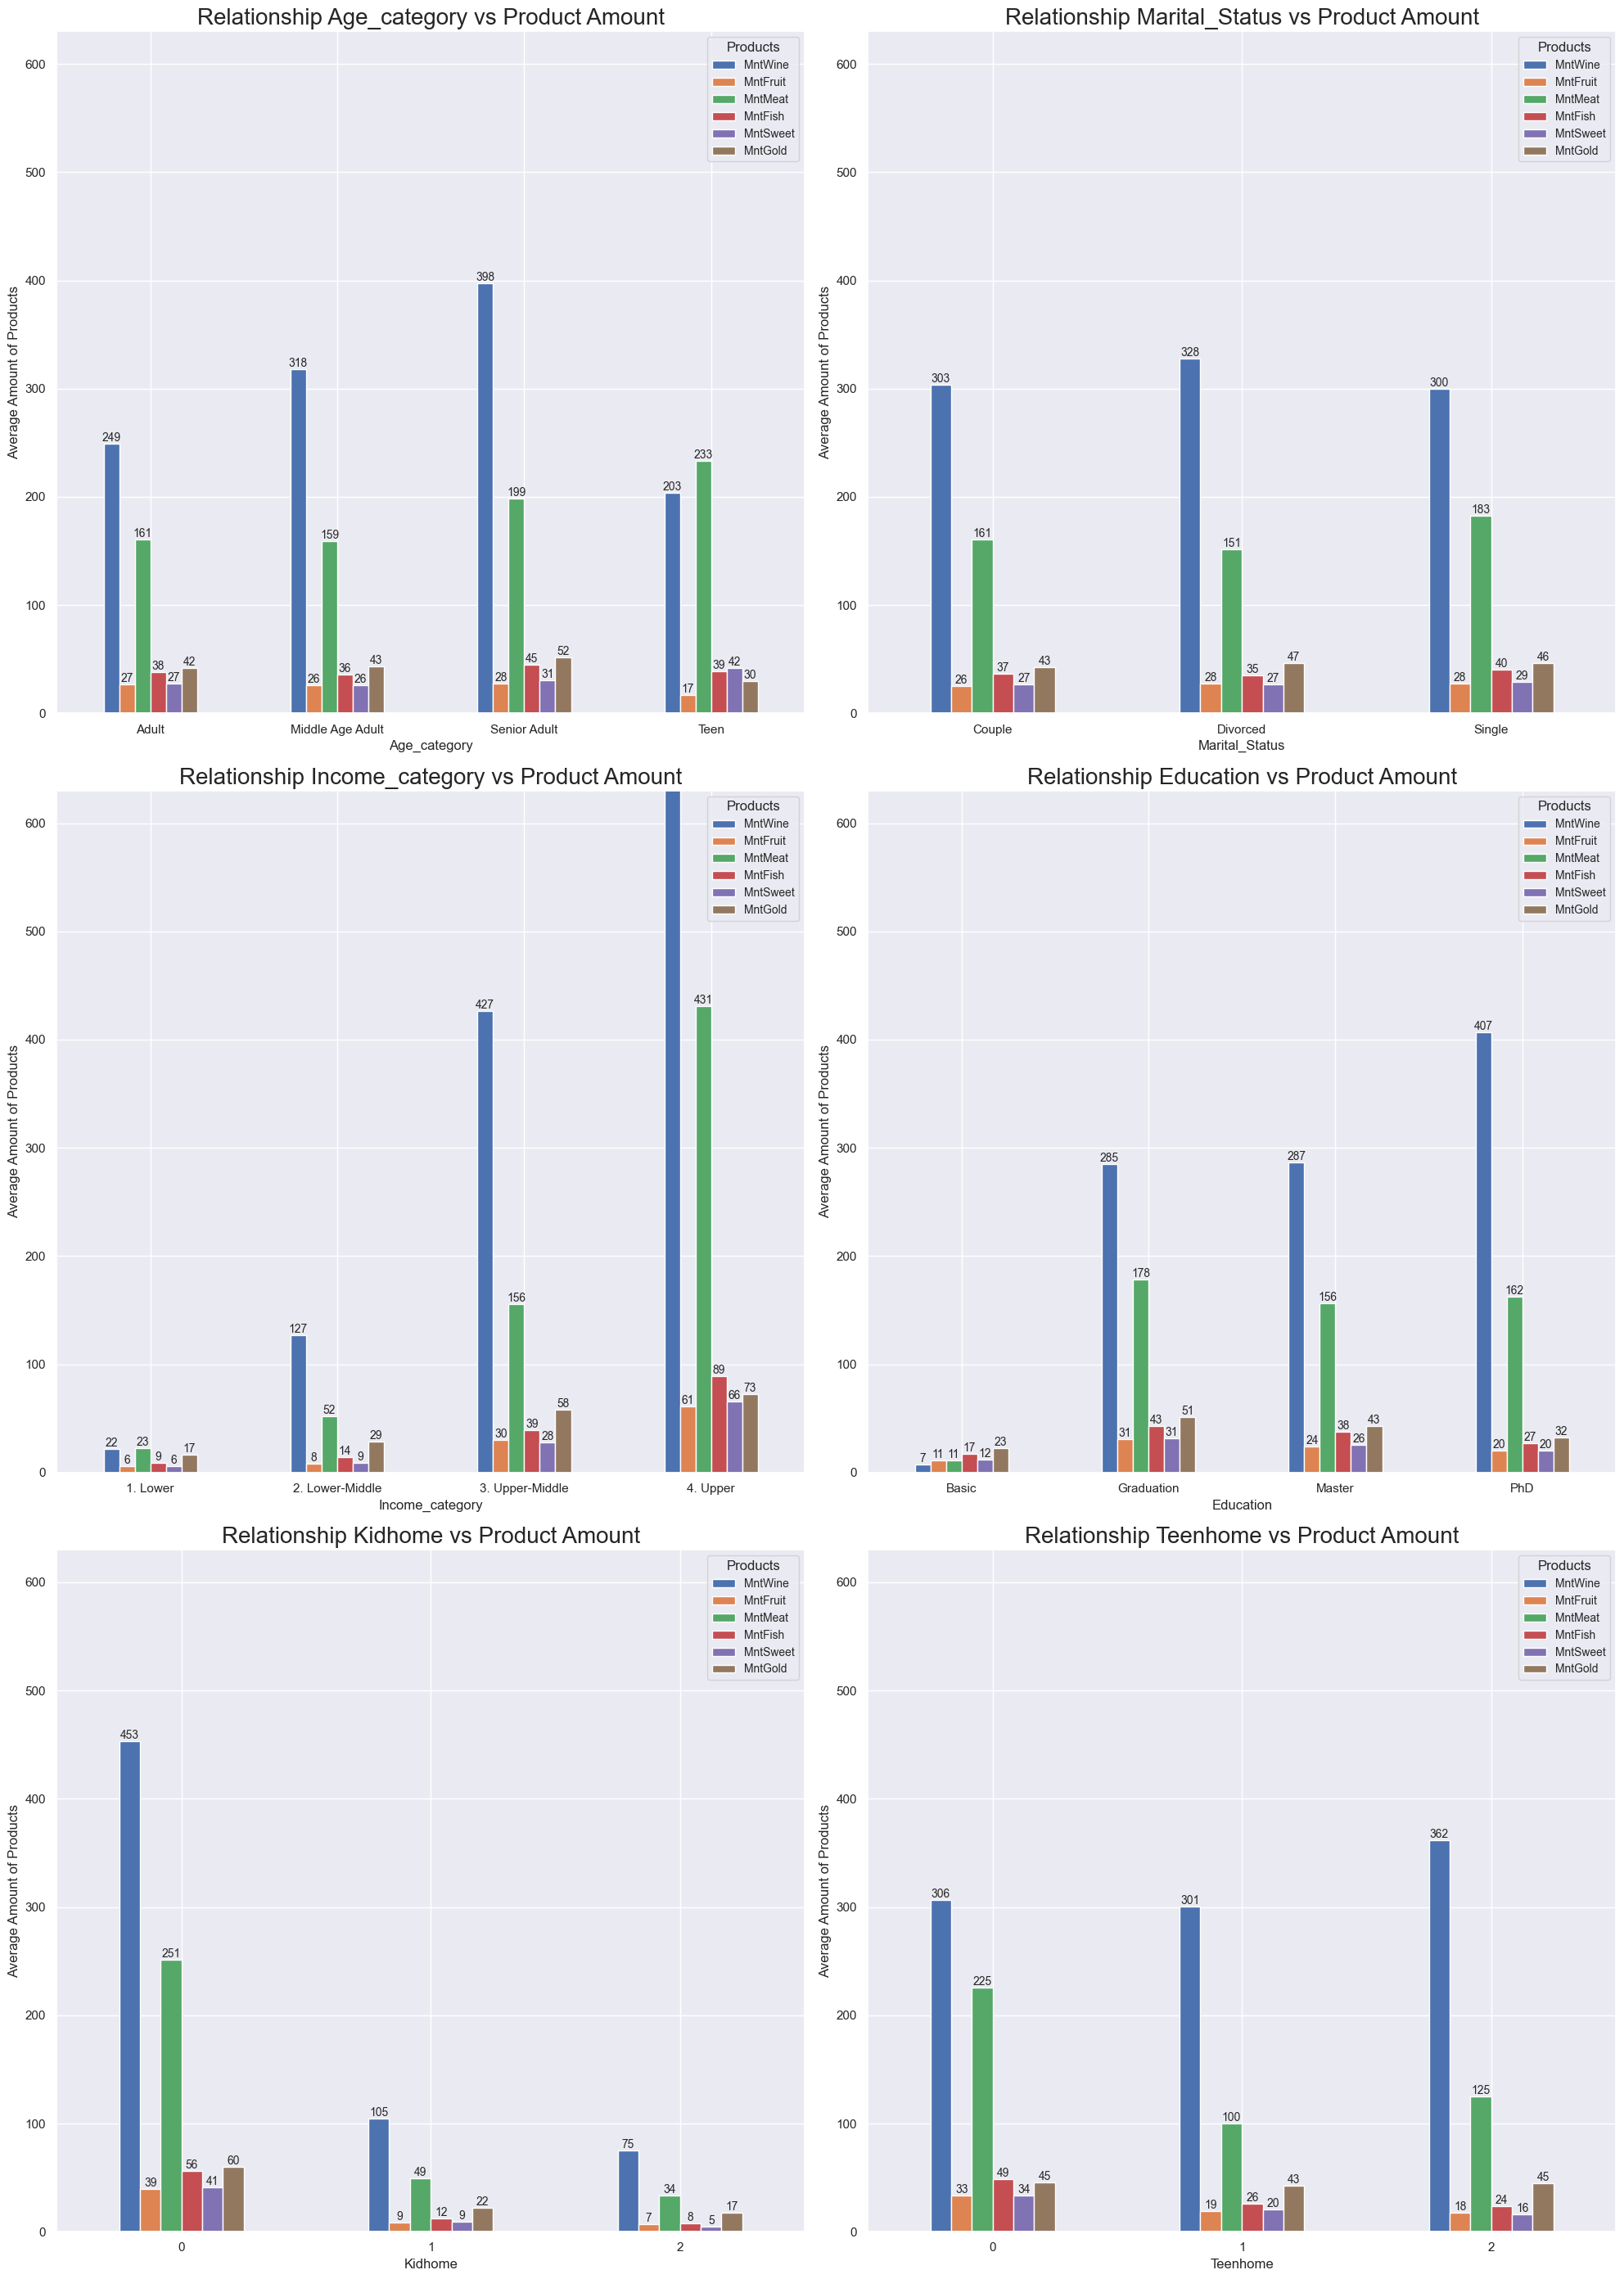

In [2504]:
import matplotlib.pyplot as plt

cols = ['MntWine', 'MntFruit', 'MntMeat', 'MntFish', 'MntSweet', 'MntGold']

# Set up a 3x2 grid for subplots
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(20, 28))

# Lists to iterate over for plots
axEach = [ax1, ax2, ax3]
axEach2 = [ax4, ax5, ax6]
colList = ['Age_category', 'Marital_Status', 'Income_category']
colList2 = ['Education', 'Kidhome', 'Teenhome']
titleEach = ['Relationship Age_category vs Product Amount', 'Relationship Marital_Status vs Product Amount', 'Relationship Income_category vs Product Amount']
titleEach2 = ['Relationship Education vs Product Amount', 'Relationship Kidhome vs Product Amount', 'Relationship Teenhome vs Product Amount']

# Loop through and create each plot
for ax, ax2, col, col2, title, title2 in zip(axEach, axEach2, colList, colList2, titleEach, titleEach2):
    # Group and plot for the first set
    group1 = df.groupby(col)[cols].agg('mean')
    plot1 = group1.plot(kind='bar', ax=ax, legend=False)
    # Set title, labels, and limits
    ax.set_title(title, fontsize=20)
    ax.set_ylabel('Average Amount of Products')
    ax.set_ylim(bottom=0, top=630)
    ax.tick_params(axis='x', labelrotation=0)
    
    # Annotate the bars with their heights
    for p in plot1.patches:
        height = p.get_height()
        ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=10)

    # Add legend for the first set
    ax.legend(title='Products', loc='upper right', fontsize=10)

    # Group and plot for the second set
    group2 = df.groupby(col2)[cols].agg('mean')
    plot2 = group2.plot(kind='bar', ax=ax2, legend=False)

    ax2.set_title(title2, fontsize=20)
    ax2.set_ylabel('Average Amount of Products')
    ax2.set_ylim(bottom=0, top=630)
    ax2.tick_params(axis='x', labelrotation=0)

    for p in plot2.patches:
        height = p.get_height()
        ax2.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=10)

    # Add legend for the second set
    ax2.legend(title='Products', loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()


1. Hubungan Kategori Usia vs Jumlah Produk
Grafik menunjukkan pola pengeluaran di antara kategori usia seperti Remaja, Dewasa, Lansia, dan Orang Tua. Kelompok Dewasa dan Lansia cenderung menghabiskan lebih banyak pada produk anggur, daging, dan ikan dibandingkan dengan kelompok Remaja dan Orang Tua. Remaja memiliki pengeluaran paling sedikit, yang mungkin mencerminkan daya beli yang lebih rendah atau preferensi konsumsi yang berbeda. Orang Tua mungkin lebih sedikit mengonsumsi produk anggur dan daging, mungkin karena gaya hidup atau pembatasan diet.

2. Hubungan Status Pernikahan vs Jumlah Produk
Kebiasaan pengeluaran dibandingkan antara berbagai status pernikahan seperti Maried, single, devorce, dan Janda/Duda. Individu yang menikah umumnya menghabiskan lebih banyak pada anggur dan produk daging, yang menunjukkan konsumsi yang berorientasi pada rumah tangga atau keluarga. Individu Lajang dan Bercerai menunjukkan pengeluaran signifikan pada anggur, yang mungkin dipengaruhi oleh pilihan gaya hidup atau aktivitas sosial. Janda/Duda memiliki pengeluaran yang relatif lebih rendah di semua kategori produk.

3. Hubungan Kategori Pendapatan vs Jumlah Produk
Grafik membagi pendapatan menjadi empat kategori: Rendah, Menengah-Rendah, Menengah-Atas, dan Atas. Kelompok pendapatan atas memiliki pengeluaran tertinggi, terutama pada produk anggur dan daging, yang diharapkan karena pendapatan yang lebih besar. Kelompok pendapatan rendah memiliki pengeluaran terbatas di semua kategori, mungkin lebih fokus pada kebutuhan pokok dibandingkan barang mewah. Kategori pendapatan menunjukkan bahwa pendapatan yang lebih tinggi berhubungan dengan pengeluaran yang lebih besar pada produk anggur dan daging.

4. Hubungan Pendidikan vs Jumlah Produk
Grafik ini mengeksplorasi pengeluaran berdasarkan tingkat pendidikan: Dasar, Sarjana, Magister, dan Doktor. Tingkat pendidikan yang lebih tinggi (Magister dan Doktor) berkorelasi dengan pengeluaran yang lebih tinggi, terutama pada produk anggur dan daging. Konsumen dengan pendidikan dasar menunjukkan pengeluaran yang lebih rendah, yang mungkin terkait dengan tingkat pendapatan yang berbeda dari latar belakang pendidikan. Pendidikan mempengaruhi pola pembelian, kemungkinan terkait dengan potensi pendapatan dan preferensi gaya hidup.

5. Hubungan Kidhome vs Jumlah Produk
Grafik melihat bagaimana jumlah anak di rumah mempengaruhi pengeluaran. Rumah tangga tanpa anak menghabiskan lebih banyak pada anggur, daging, dan ikan, menunjukkan kapasitas pengeluaran diskresioner. Rumah dengan anak menunjukkan pengeluaran yang berkurang pada anggur, kemungkinan karena anggaran berpusat pada keluarga dan memprioritaskan kebutuhan pokok daripada barang mewah. Kehadiran anak secara signifikan mempengaruhi bagaimana rumah tangga mengalokasikan anggarannya di berbagai kategori produk.

6. Hubungan Teenhome vs Jumlah Produk
Grafik menunjukkan bagaimana memiliki remaja di rumah mempengaruhi pengeluaran.Rumah tanpa remaja cenderung menghabiskan lebih banyak pada anggur, daging, dan produk lainnya, mirip dengan pola yang terlihat pada kidhome. Kehadiran remaja mungkin menyebabkan perubahan dalam preferensi pembelian, seperti peningkatan pengeluaran pada permen dan barang lain yang disukai remaja.
Remaja mungkin mempengaruhi pergeseran menuju kategori produk tertentu, mencerminkan perilaku konsumsi adaptif rumah tangga.


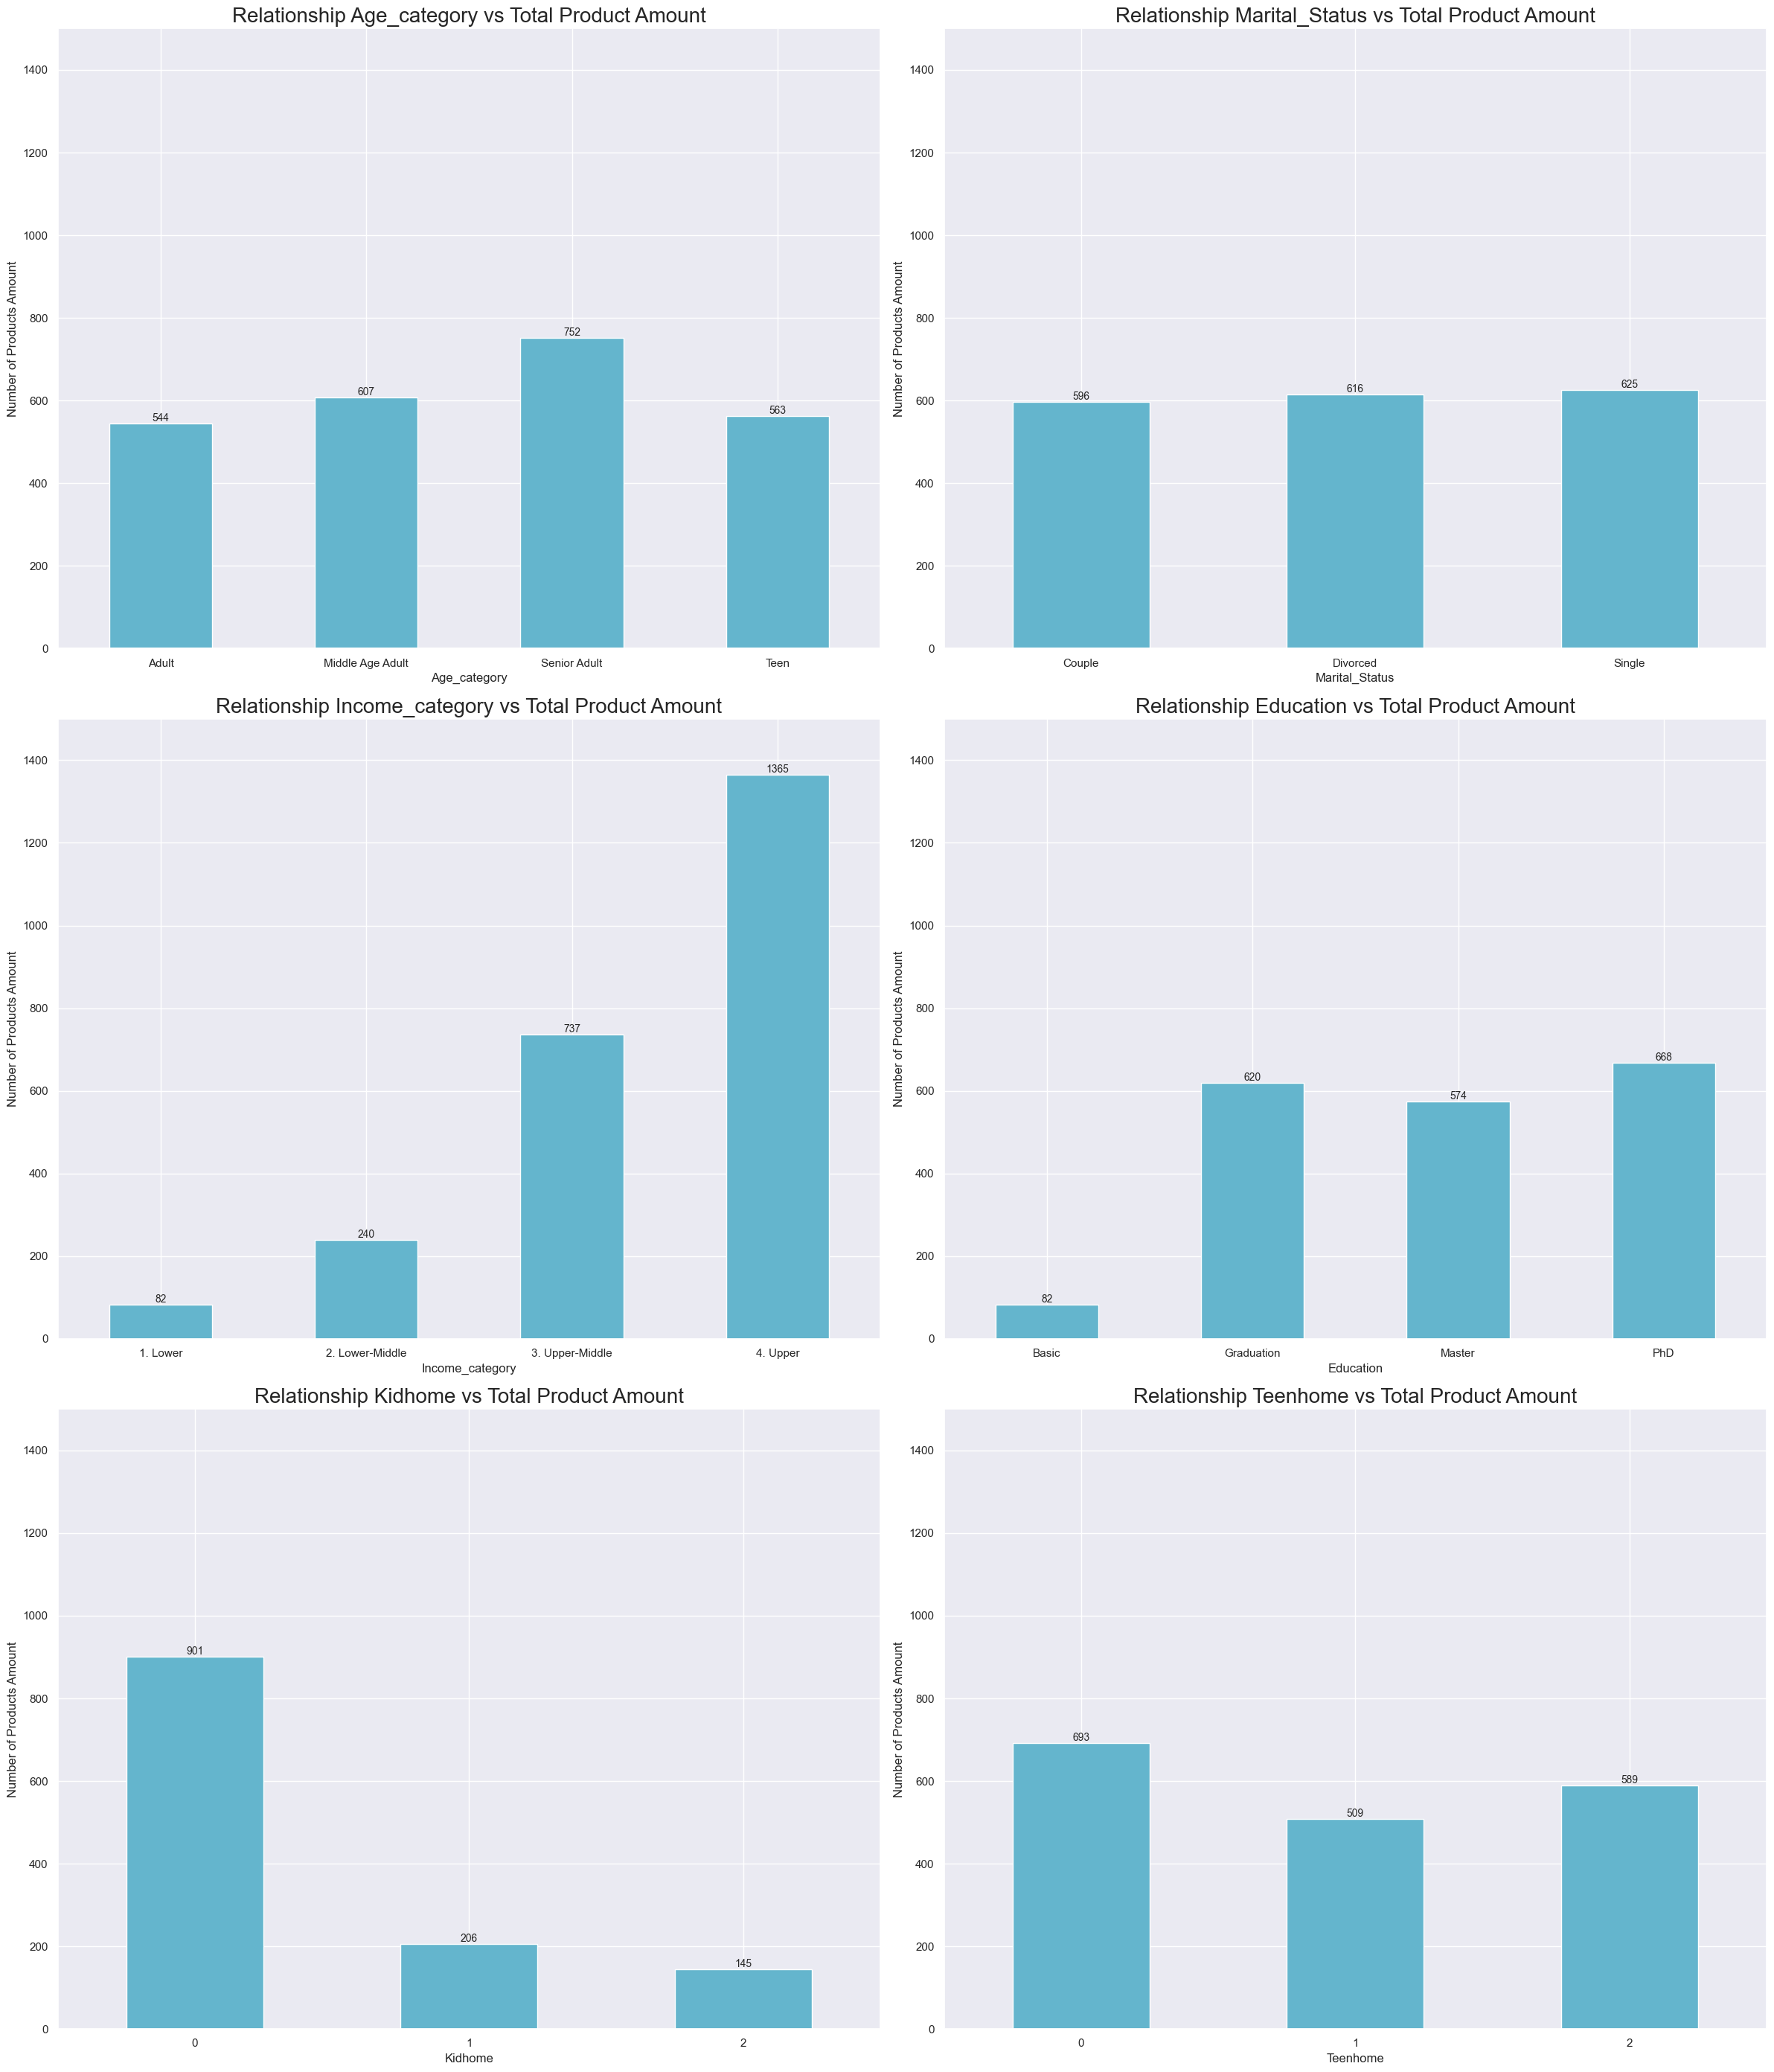

In [2498]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(24, 28))


axEach = [ax1, ax2, ax3]
axEach2 = [ax4, ax5, ax6]
colList = ['Age_category', 'Marital_Status', 'Income_category']
colList2 = ['Education', 'Kidhome', 'Teenhome']
titleEach = ['Relationship Age_category vs Total Product Amount', 
             'Relationship Marital_Status vs Total Product Amount', 
             'Relationship Income_category vs Total Product Amount']
titleEach2 = ['Relationship Education vs Total Product Amount', 
              'Relationship Kidhome vs Total Product Amount', 
              'Relationship Teenhome vs Total Product Amount']


for ax, ax2, col, col2, title, title2 in zip(axEach, axEach2, colList, colList2, titleEach, titleEach2):
    # Group and plot for the first set
    group1 = df.groupby(col)['TotalMnt'].agg('mean')
    plot1 = group1.plot(kind='bar', ax=ax, color='c')
    # Set title, labels, and limits
    ax.set_title(title, fontsize=20)
    ax.set_ylabel('Number of Products Amount')
    ax.set_ylim(bottom=0, top=1500)
    ax.tick_params(axis='x', labelrotation=0)
    
    # Annotate the bars with their heights
    for p in plot1.patches:
        height = p.get_height()
        ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=10)

    # Group and plot for the second set
    group2 = df.groupby(col2)['TotalMnt'].agg('mean')
    plot2 = group2.plot(kind='bar', ax=ax2, color='c')
    # Set title, labels, and limits
    ax2.set_title(title2, fontsize=20)
    ax2.set_ylabel('Number of Products Amount')
    ax2.set_ylim(bottom=0, top=1500)
    ax2.tick_params(axis='x', labelrotation=0)

    # Annotate the bars with their heights
    for p in plot2.patches:
        height = p.get_height()
        ax2.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=10)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


1. Hubungan Kategori Usia vs Jumlah Produk: Berdasarkan pemeriksaan dengan tabel, barplot, korelasi, dan signifikansi, hubungan antara kategori usia dan jumlah produk memiliki hubungan yang signifikan. Senior Adult memiliki pengeluaran tertinggi, menunjukkan bahwa mereka mungkin memiliki lebih banyak pendapatan diskresioner untuk dihabiskan dibandingkan dengan kategori usia lainnya. Pengeluaran untuk Teen adalah yang terendah, mungkin karena keterbatasan finansial atau preferensi belanja yang berbeda.

2. Hubungan Status Pernikahan vs Jumlah Produk: Hubungan antara status pernikahan dan jumlah produk menunjukkan bahwa Couple memiliki pengeluaran tertinggi. Hal ini bisa disebabkan oleh berbagi penghasilan atau pembelian bersama untuk kebutuhan rumah tangga. Single dan Divorced menunjukkan pengeluaran yang hampir sama, yang mengindikasikan pembelian lebih untuk kebutuhan pribadi.

3. Hubungan Kategori Pendapatan vs Jumlah Produk: Hubungan antara kategori pendapatan dan jumlah produk sangat kuat. Pelanggan dalam kategori pendapatan Upper menghabiskan paling banyak, menunjukkan bahwa pendapatan yang lebih tinggi memungkinkan pelanggan untuk lebih konsumtif. Ini konsisten dengan peningkatan pengeluaran seiring dengan peningkatan kategori pendapatan.

4. Hubungan Pendidikan vs Jumlah Produk: Hubungan antara pendidikan dan jumlah produk menunjukkan bahwa PhD dan Graduation memiliki pengeluaran tertinggi. Ini bisa mengindikasikan bahwa tingkat pendidikan yang lebih tinggi berkorelasi dengan pendapatan yang lebih tinggi, sehingga memungkinkan belanja yang lebih besar pada produk.

5. Hubungan Jumlah Anak di Rumah vs Jumlah Produk: Hubungan antara jumlah anak di rumah dan jumlah produk menunjukkan bahwa rumah tangga tanpa anak memiliki pengeluaran tertinggi, dan pengeluaran menurun dengan adanya lebih banyak anak. Hal ini mungkin karena prioritas pengeluaran untuk kebutuhan anak, yang mengurangi anggaran untuk barang lain.

6. Hubungan Jumlah Remaja di Rumah vs Jumlah Produk: Tidak ada hubungan yang signifikan antara jumlah remaja di rumah dan jumlah pengeluaran produk. Rumah tangga tanpa remaja memiliki pengeluaran lebih tinggi, yang mungkin disebabkan oleh pengalihan dana untuk kebutuhan pendidikan atau masa depan remaja.

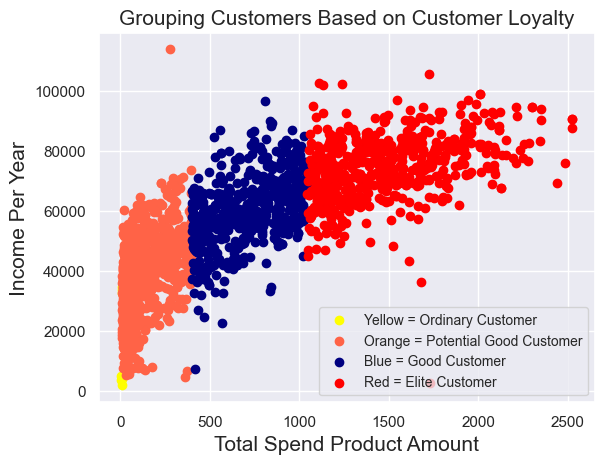

In [2478]:
df1 = df[df['TotalMnt_Cat']=='Low Number of Total Amount']
df2 = df[df['TotalMnt_Cat']=='Medium to Low Number of Total Amount']
df3 = df[df['TotalMnt_Cat']=='Medium to High Number of Total Amount']
df4 = df[df['TotalMnt_Cat']=='High Number of Total Amount']
plt.scatter(df1['TotalMnt'],df1['Income'],color='yellow')      # Ordinary Customer
plt.scatter(df2['TotalMnt'],df2['Income'],color='tomato')      # Potential Good Customer
plt.scatter(df3['TotalMnt'],df3['Income'],color='navy')        # Good Customer
plt.scatter(df4['TotalMnt'],df4['Income'],color='red')         # Elite Customer
plt.title('Grouping Customers Based on Customer Loyalty', fontsize=15)
plt.legend(['Yellow = Ordinary Customer','Orange = Potential Good Customer','Blue = Good Customer','Red = Elite Customer'], fontsize=10)
plt.xlabel('Total Spend Product Amount', fontsize=15)
plt.ylabel('Income Per Year', fontsize=15)

plt.show()

Terdapat empat kategori yang merepresentasikan loyalitas pelanggan dalam berbelanja. Kategori ini dibagi berdasarkan jumlah pelanggan yang berbelanja dalam 2 tahun terakhir. Setelah diplot dengan data pendapatan, terlihat bahwa korelasi antara kedua parameter ini sangat kuat dan membentuk kurva linier.

1. Pelanggan Biasa: Pelanggan yang menghabiskan jumlah Total Produk yang rendah.
2. Pelanggan Potensial Baik: Pelanggan yang menghabiskan jumlah Total Produk dari rendah ke menengah.
3. Pelanggan Baik: Pelanggan yang menghabiskan jumlah Total Produk dari menengah ke tinggi.
4. Pelanggan Elite: Pelanggan yang menghabiskan jumlah Total Produk yang tinggi.
- Dapat dilihat bahwa ada beberapa pelanggan (dalam jumlah kecil) yang menjadi outlier. Pelanggan dengan pendapatan rendah tetapi memiliki pengeluaran produk yang tinggi, dan pelanggan dengan pendapatan tinggi tetapi memiliki pengeluaran produk yang rendah.
- Dengan mengetahui tingkat loyalitas pelanggan melalui kategori ini, hal ini dapat membantu menyusun strategi untuk target pasar yang berbeda dengan kampanye pemasaran yang spesifik.

<hr>

## C.3 Analisis supermarket campagin yang efektif

In [2492]:
CmpReceive = df.TotalAcceptedCmp.value_counts()
CmpReceive

TotalAcceptedCmp
0    1621
1     369
2     142
3      51
4      36
5      10
Name: count, dtype: int64

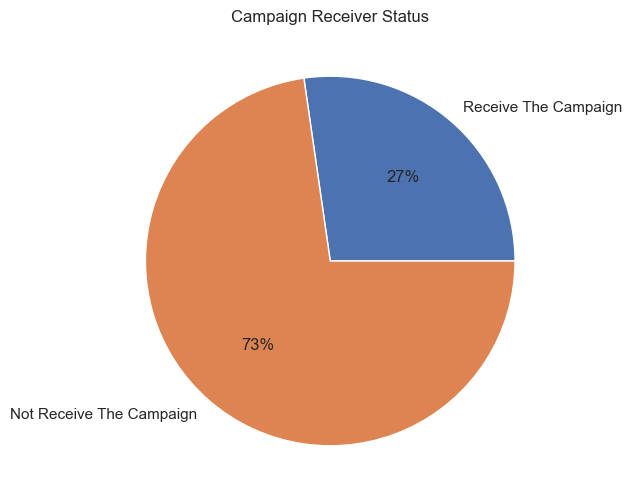

The number of customers that received and accepted the campaign is 608
The number of customers that did not receive or accept any campaign is 1621


In [2494]:
Accept = CmpReceive[[1, 2, 3, 4, 5]].sum()

NotAccept = CmpReceive[0]

plt.figure(figsize=(6, 6))
plt.pie([Accept, NotAccept], labels=['Receive The Campaign', 'Not Receive The Campaign'], autopct='%.0f%%')
plt.title("Campaign Receiver Status")
plt.show()

print(f'The number of customers that received and accepted the campaign is {Accept}')
print(f'The number of customers that did not receive or accept any campaign is {NotAccept}')

Berdasarkan piechart tersebut, terdapat 73% anggota (total 1.631 orang) yang tidak menerima kampanye, sementara 27% anggota (total 609 orang) menerima kampanye. Diperlukan uji normalitas untuk membuktikan apakah kampanye mempengaruhi penjualan produk.

In [2496]:
import plotly.express as px

# Data for the pie chart
aCmp = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
           'AcceptedCmp5', 'Response']].sum(axis=0)
names = ['Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5', 'Last Campaign']

# Create the pie chart with a custom color sequence
fig = px.pie(values=aCmp.values, names=names, hole=0.6,
             color_discrete_sequence=px.colors.sequential.Viridis)  # Example of a different color sequence

# Update layout
fig.update_layout(title_text='Percentage of Accepted Offers Per Campaign', title_x=0.5)

# Show the plot
fig.show()


Last Campign merupakan campign yang paling banyak diterima oleh pelanggan dengan persentase 33,4%. Dengan ini menjadikan campign tersebut sebagai campign paling sukses. Secara keseluruhan, setiap campign berhasil meningkatkan nilai distribusi yang diterima oleh pelanggan: campign 1 sebesar 14,4%, campign 3 sebesar 16,3%, campign 4 sebesar 16,7%, dan campign 5 sebesar 16,3%. Hanya campign 2 yang jumlah penerimaannya sangat kecil.

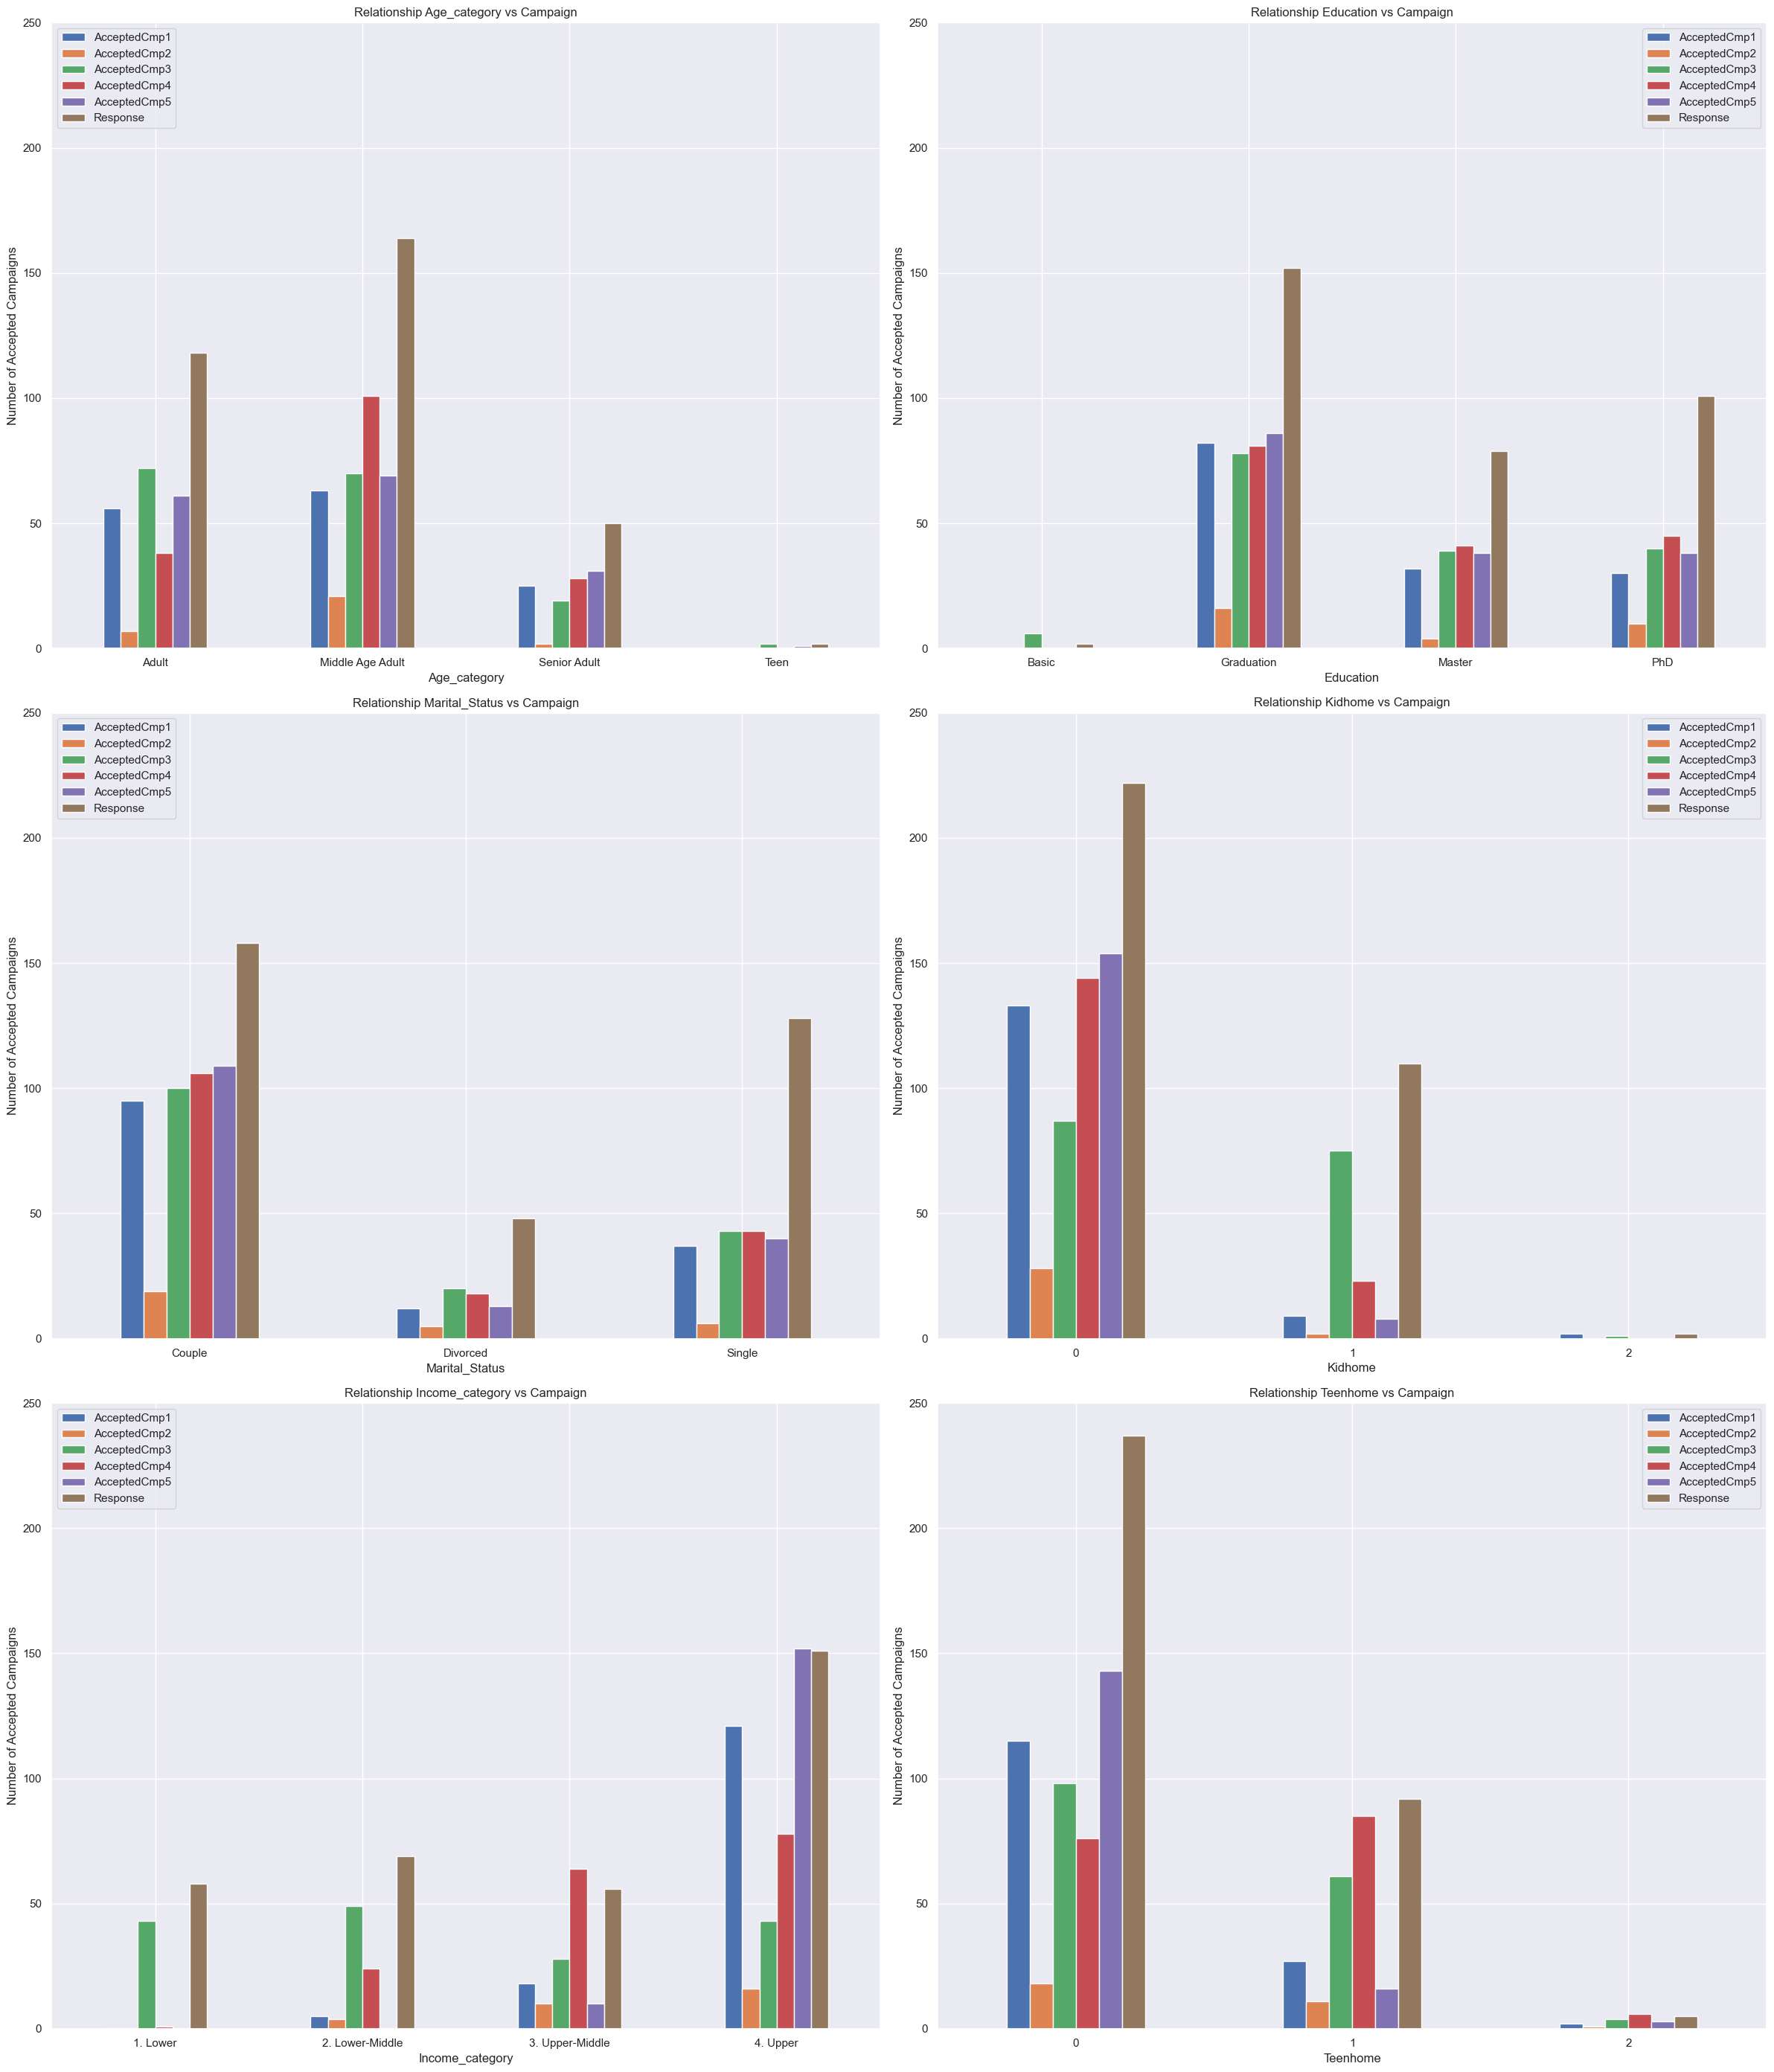

In [2499]:
import matplotlib.pyplot as plt

# Set up a 3x2 grid for subplots
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(24, 28))

ColCust = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

# Lists for iteration
axEach = [ax1, ax3, ax5]
axEach2 = [ax2, ax4, ax6]
colList = ['Age_category', 'Marital_Status', 'Income_category']
colList2 = ['Education', 'Kidhome', 'Teenhome']
titleEach = ['Relationship Age_category vs Campaign', 'Relationship Marital_Status vs Campaign', 'Relationship Income_category vs Campaign']
titleEach2 = ['Relationship Education vs Campaign', 'Relationship Kidhome vs Campaign', 'Relationship Teenhome vs Campaign']

# Loop through and create each plot
for ax, ax2, col, col2, title, title2 in zip(axEach, axEach2, colList, colList2, titleEach, titleEach2):
    # Group and plot for the first set
    df.groupby(col)[ColCust].agg('sum').plot(kind='bar', ax=ax)
    # Set title, labels, and limits
    ax.set_title(title)
    ax.set_ylabel('Number of Accepted Campaigns')
    ax.set_ylim(bottom=0, top=250)
    ax.tick_params(axis='x', labelrotation=0)
    ax.legend(loc='upper left')

    # Group and plot for the second set
    df.groupby(col2)[ColCust].agg('sum').plot(kind='bar', ax=ax2)
    # Set title, labels, and limits
    ax2.set_title(title2)
    ax2.set_ylabel('Number of Accepted Campaigns')
    ax2.set_ylim(bottom=0, top=250)
    ax2.tick_params(axis='x', labelrotation=0)
    ax2.legend(loc='upper right')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


- Dalam kategori Age_category, kelompok Adult menerima jumlah campign tertinggi, sementara yang paling sedikit adalah kategori Old.
- Dalam kategori Marital_Status, kelompok Married menerima jumlah campign tertinggi, sementara yang paling sedikit adalah kategori Widow.
- Dalam kategori Income_category, kelompok Upper Income menerima jumlah campign tertinggi, sementara yang paling sedikit adalah kategori Lower Income.
- Dalam kategori Education, kelompok Graduation menerima jumlah campign tertinggi, sementara yang paling sedikit adalah kategori Basic.
- Dalam kategori Kidhome,kelompok dengan 0 anak menerima jumlah campign tertinggi, sementara yang paling sedikit adalah kategori dengan 2 anak.
- Dalam kategori Teenhome, kelompok dengan 0 remaja menerima jumlah campign tertinggi, sementara yang paling sedikit adalah kategori dengan 2 remaja.


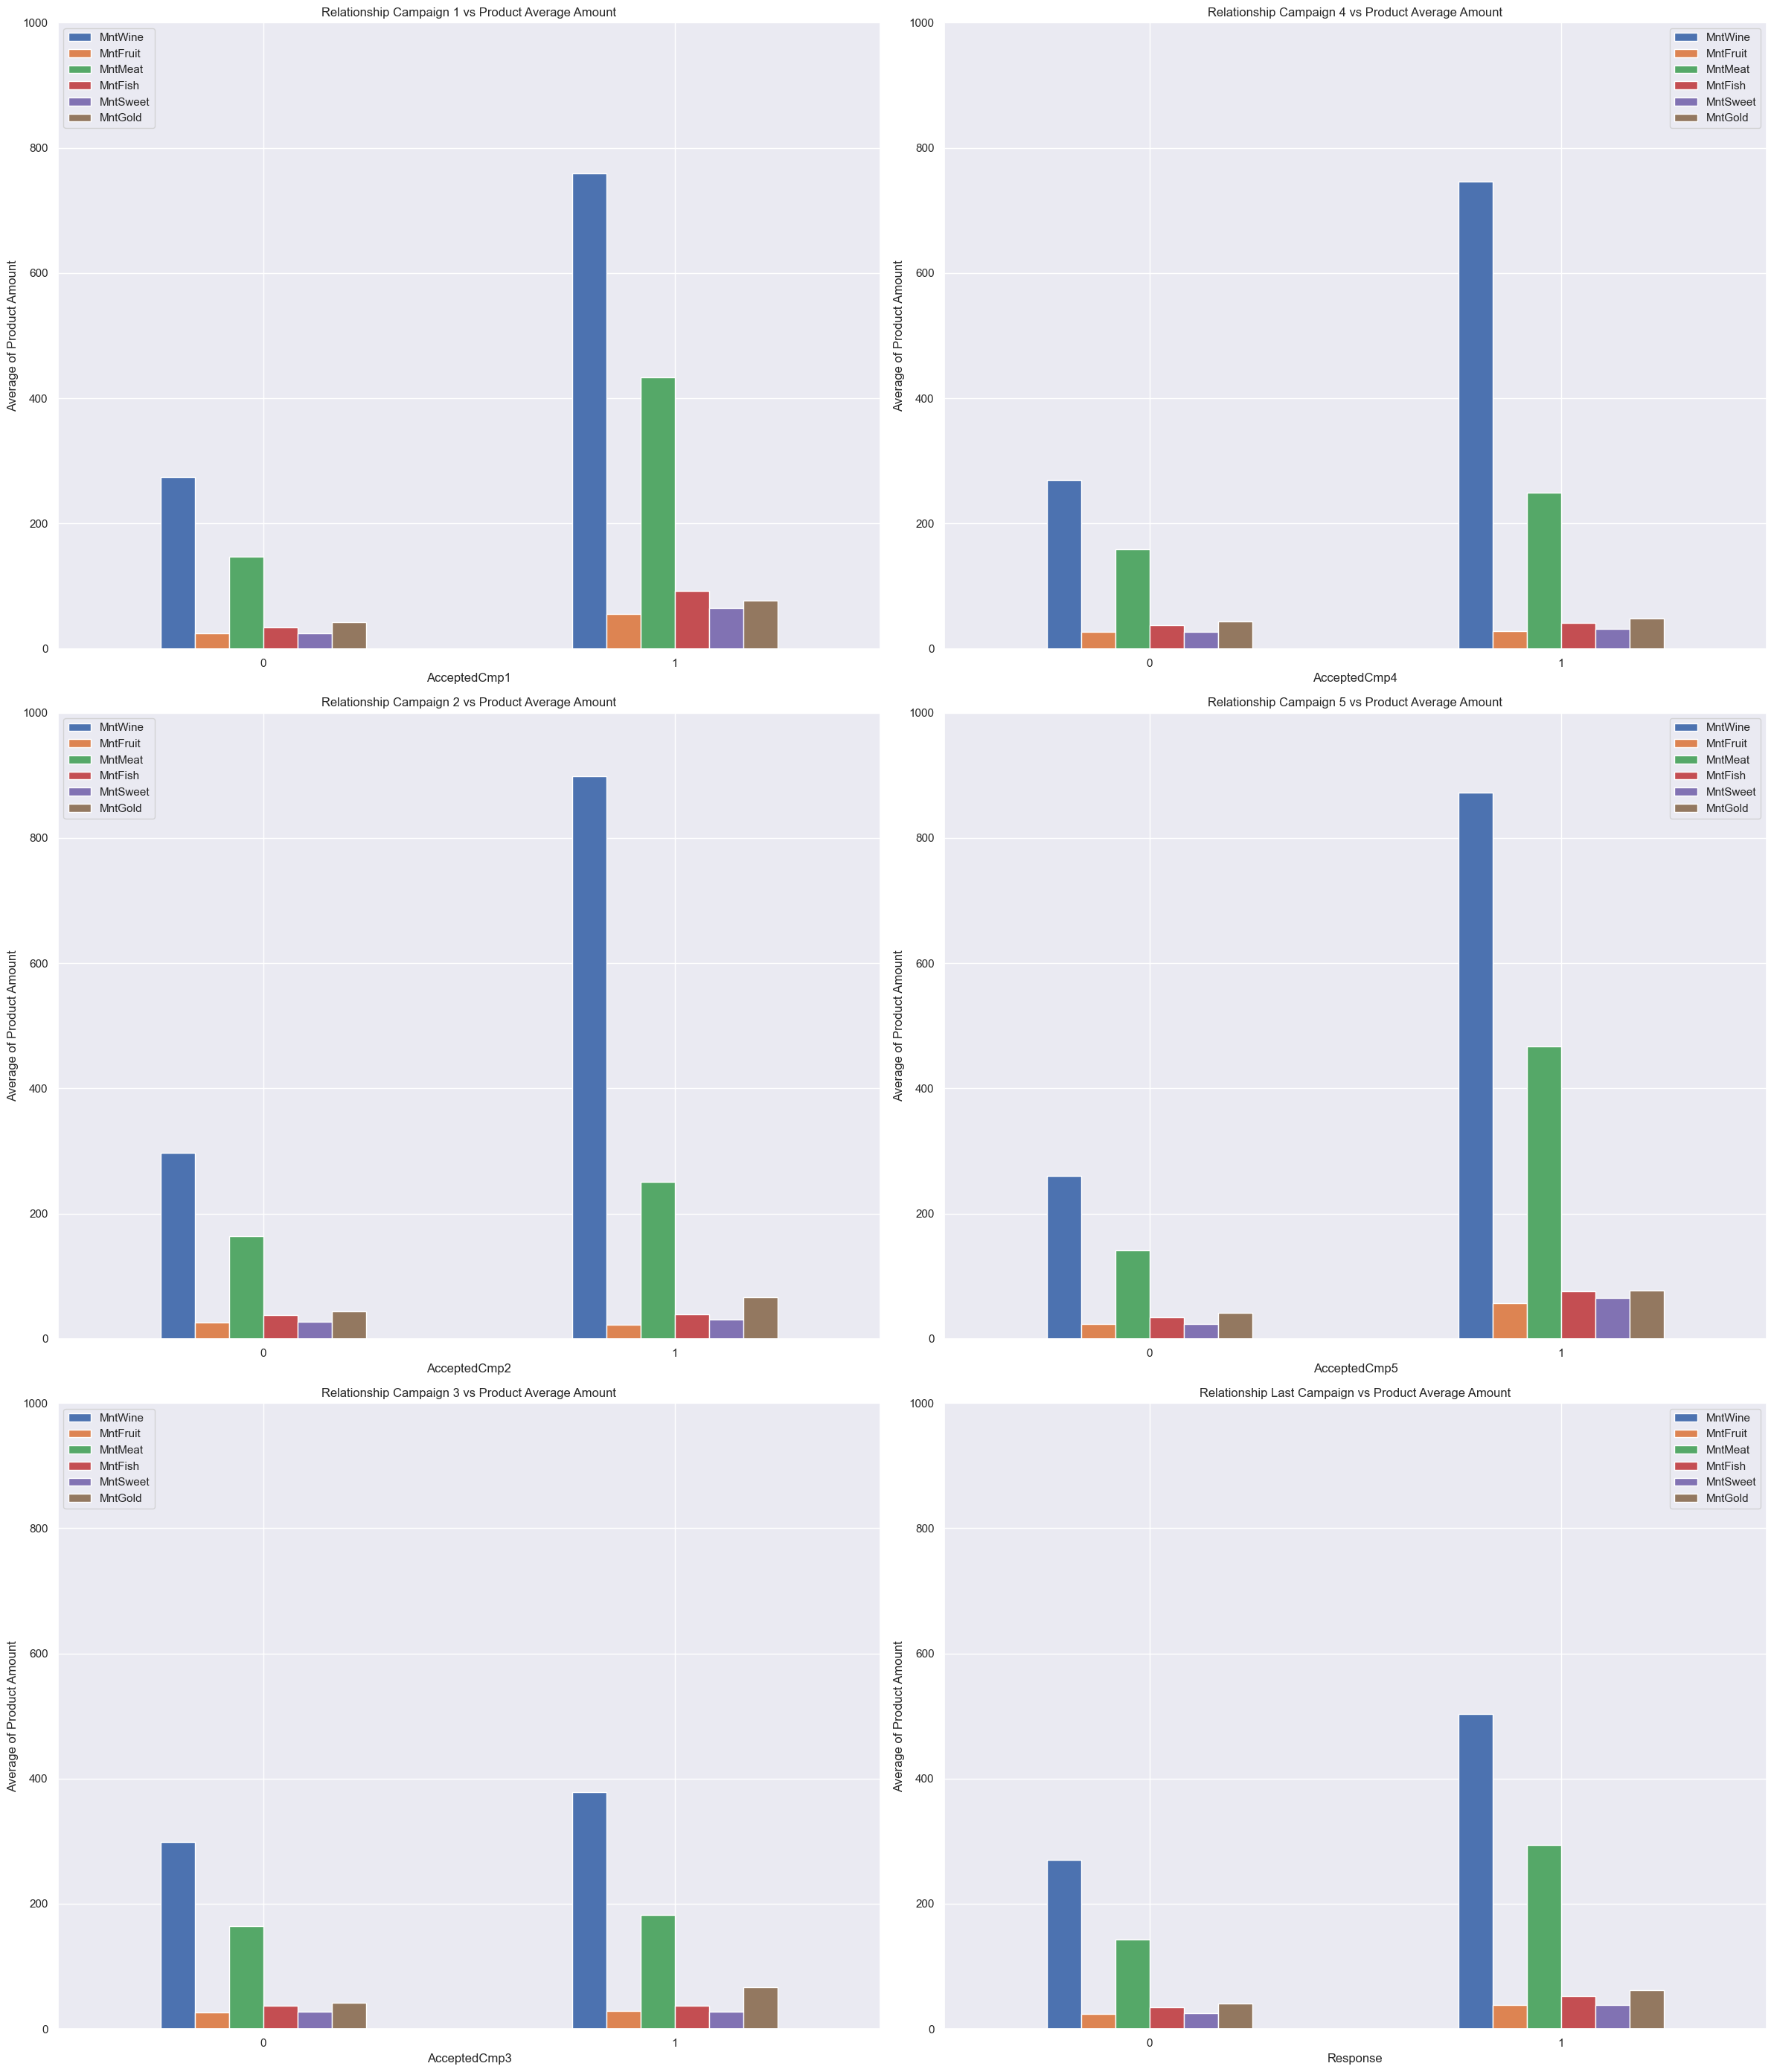

In [2503]:
# Set up a 3x2 grid for subplots
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(24, 28))

ColProds = ['MntWine', 'MntFruit', 'MntMeat', 'MntFish', 'MntSweet', 'MntGold']

# Lists for iteration
axEach = [ax1, ax3, ax5]
axEach2 = [ax2, ax4, ax6]
colList = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3']
colList2 = ['AcceptedCmp4', 'AcceptedCmp5', 'Response']
titleEach = ['Relationship Campaign 1 vs Product Average Amount', 
             'Relationship Campaign 2 vs Product Average Amount', 
             'Relationship Campaign 3 vs Product Average Amount']
titleEach2 = ['Relationship Campaign 4 vs Product Average Amount', 
              'Relationship Campaign 5 vs Product Average Amount', 
              'Relationship Last Campaign vs Product Average Amount']

# Loop through and create each plot
for ax, ax2, col, col2, title, title2 in zip(axEach, axEach2, colList, colList2, titleEach, titleEach2):
    # Group and plot for the first set
    df.groupby(col)[ColProds].agg('mean').plot(kind='bar', ax=ax)
    # Set title, labels, and limits
    ax.set_title(title)
    ax.set_ylabel('Average of Product Amount')
    ax.set_ylim(bottom=0, top=1000)
    ax.tick_params(axis='x', labelrotation=0)
    ax.legend(loc='upper left')

    # Group and plot for the second set
    df.groupby(col2)[ColProds].agg('mean').plot(kind='bar', ax=ax2)
    # Set title, labels, and limits
    ax2.set_title(title2)
    ax2.set_ylabel('Average of Product Amount')
    ax2.set_ylim(bottom=0, top=1000)
    ax2.tick_params(axis='x', labelrotation=0)
    ax2.legend(loc='upper right')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


- Dari setiap campign berhasil meningkatkan jumlah pengeluaran produk.
- Pada semua batch campign, terdapat peningkatan jumlah pengeluaran produk.
- Peningkatan terbesar terjadi pada produk wine dan Meat.

<hr>

## C.4 Lokasi Penjualan Terbaik

In [2505]:
columns = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
columns_new = ['Web Purchases', 'Catalog Purchases', 'Store Purchases']

total = df[columns].sum()
total.index = columns_new
total = total.reset_index(name='total')

fig = px.treemap(total, path=['index'],values='total',
                 color_discrete_sequence=px.colors.qualitative.Pastel)

fig.data[0].textinfo = 'label+text+value'
fig.update_layout(margin = dict(t=25, l=25, r=25, b=25),
                  title_text='The Number of Purchases for Each Market Place',
                  title_x = 0.5,
                  title_y = 0.96)
fig.update_traces(textposition='middle center')
fig.layout.hovermode = False

fig.show()

Berdasarkan Treemap diatas, dapat kita lihat bahwa lokasi penjulan yang paling banyak menjual produk adalah pada Store, kemudian WEB, lalu melalui Catalog

In [2506]:
counts = df.Complain.map({0:"No", 1:"Yes"}).value_counts()

fig = px.pie(values=counts.values, names=counts.index, hole=0.6,
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(title_text='Percentage of Customers Complained', title_x=0.5)

Berdasarkan Pie CHart di atas, persentase customers yang complain kurang dari 1%

# Kesimpulan 

- Pengeluaran terbesar pelanggan adalah pada wine yang mencapai, diikuti oleh meat di posisi kedua pengeluaran. Hal ini mungkin terjadi karena kualitas produk wine dan meat di Supermarket ini memiliki kualitas yang sangat baik. dan sisanya memiliki penjualan yang kurang baik.

# Rekomendasi

Berdasarkan hasil analisis, beberapa hal yang dapat direkomendasikan adalah:

- Mempertahankan penjualan produk yang sudah memiliki jumlah pengeluaran yang baik seperti anggur dan daging, dengan memberikan diskon promosi, program beli dua gratis satu.
- Perlu mengevaluasi produk dengan jumlah pembelian rendah seperti emas, ikan, manis, dan buah-buahan yang perlu dievaluasi dan ditingkatkan, seperti memperbaiki kualitas barang yang buruk, produk seperti emas, ikan, manis, dan buah-buahan bukanlah komoditas utama di negara ini, serta kurangnya promosi atau pemasaran yang efektif.
- Mengetahui target pasar dengan jelas siapa yang menjadi target pasar. dengan database penjualan untuk memahami tren, pola pembelian, dan preferensi pelanggan. Dengan pemahaman ini, strategi penjualan dapat dioptimalkan dan peluang baru dapat diidentifikasi.